# Importing Basic Libraries

In [1]:
# Importing imporatnat libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


from collections import Counter

# Problem Statement

Aim to analyze these financial attributes and build a predictive model that can classify companies as either financially healthy or at risk of bankruptcy.

# Goal and Objectives

By leveraging historical financial data and company performance metrics, to build model that will help investors, 
financial analysts, and stakeholders identify early warning signs of financial distress and make informed decisions to mitigate risks of bankruptcy.


In [2]:
# read data from csv file

In [3]:
data = pd.read_csv('BANKRUPTCY PREDICTION .csv')
bank = data.copy()

In [4]:
# removing spaces in columns
bank.columns = bank.columns.str.replace(' ','_')

In [5]:
bank.head()

_ROA(C)_before_interest_and_depreciation_before_interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

   _ROA(A)_before_interest_and_%_after_tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

   _ROA(B)_before_interest_and_depreciation_after_tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

   _Operating_Gross_Margin  _Realized_Sales_Gross_Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

   _Operating_Profit_Rate  _Pre-tax_net_Interest_Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

   _After-tax_net_Interest_Rate  _Non-industry_income_and_expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   _Continuous_interest_rate_(after_tax)  _Operating_Expense_Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

   _Interest-bearing_debt_interest_rate  _Tax_rate_(A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

   _Net_Value_Per_Share_(B)  _Net_Value_Per_Share_(A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

   _Net_Value_Per_Share_(C)  _Persistent_EPS_in_the_Last_Four_Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187              

In [6]:
# Checking null values present in data set
bank.isna().sum()
# There is no missing value and special charecters in data set.

_ROA(C)_before_interest_and_depreciation_before_interest    0
_ROA(A)_before_interest_and_%_after_tax                     0
_ROA(B)_before_interest_and_depreciation_after_tax          0
_Operating_Gross_Margin                                     0
_Realized_Sales_Gross_Margin                                0
_Operating_Profit_Rate                                      0
_Pre-tax_net_Interest_Rate                                  0
_After-tax_net_Interest_Rate                                0
_Non-industry_income_and_expenditure/revenue                0
_Continuous_interest_rate_(after_tax)                       0
_Operating_Expense_Rate                                     0
_Research_and_development_expense_rate                      0
_Cash_flow_rate                                             0
_Interest-bearing_debt_interest_rate                        0
_Tax_rate_(A)                                               0
_Net_Value_Per_Share_(B)                                    0
_Net_Val

In [7]:
# checking the shape of data set
print(f'There is a {bank.shape[0]} rows in the data set.')
print(f'There is a { bank.shape[1]} columns in the data set.')

There is a 6819 rows in the data set.
There is a 95 columns in the data set.


In [8]:
# Information about each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 1   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 2   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 3   _Operating_Gross_Margin                                   6819 non-null   float64
 4   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 5   _Operating_Profit_Rate                                    6819 non-null   float64
 6   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 7   _After-tax_net_Interest_Rate                              6819 non-null   float64
 8   _Non-industry_inco

In [9]:
# Five point summary of dataset
bank.describe()

_ROA(C)_before_interest_and_depreciation_before_interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

       _ROA(A)_before_interest_and_%_after_tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

       _ROA(B)_before_interest_and_depreciation_after_tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

       _Operating_Gross_Margin  _Realized_Sales_Gross_Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

       _Operating_Profit_Rate  _Pre-tax_net_Interest_Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

       _After-tax_net_Interest_Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

       _Non-industry_income_and_expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

       _Continuous_interest_rate_(after_tax)  _Operating_Expense_Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.566

### Analysing correlations

In [10]:
# Checking the correlation between label and independent variables
# I found that there is some correlation between lable and independent variables i.e showed in heat map
correlation = pd.DataFrame(bank.corr()).iloc[:,-1]
correlation

_ROA(C)_before_interest_and_depreciation_before_interest   -0.260807
_ROA(A)_before_interest_and_%_after_tax                    -0.282941
_ROA(B)_before_interest_and_depreciation_after_tax         -0.273051
_Operating_Gross_Margin                                    -0.100043
_Realized_Sales_Gross_Margin                               -0.099445
_Operating_Profit_Rate                                     -0.000230
_Pre-tax_net_Interest_Rate                                 -0.008517
_After-tax_net_Interest_Rate                               -0.008857
_Non-industry_income_and_expenditure/revenue               -0.016593
_Continuous_interest_rate_(after_tax)                      -0.008395
_Operating_Expense_Rate                                    -0.006083
_Research_and_development_expense_rate                     -0.024232
_Cash_flow_rate                                            -0.072356
_Interest-bearing_debt_interest_rate                       -0.023063
_Tax_rate_(A)                     

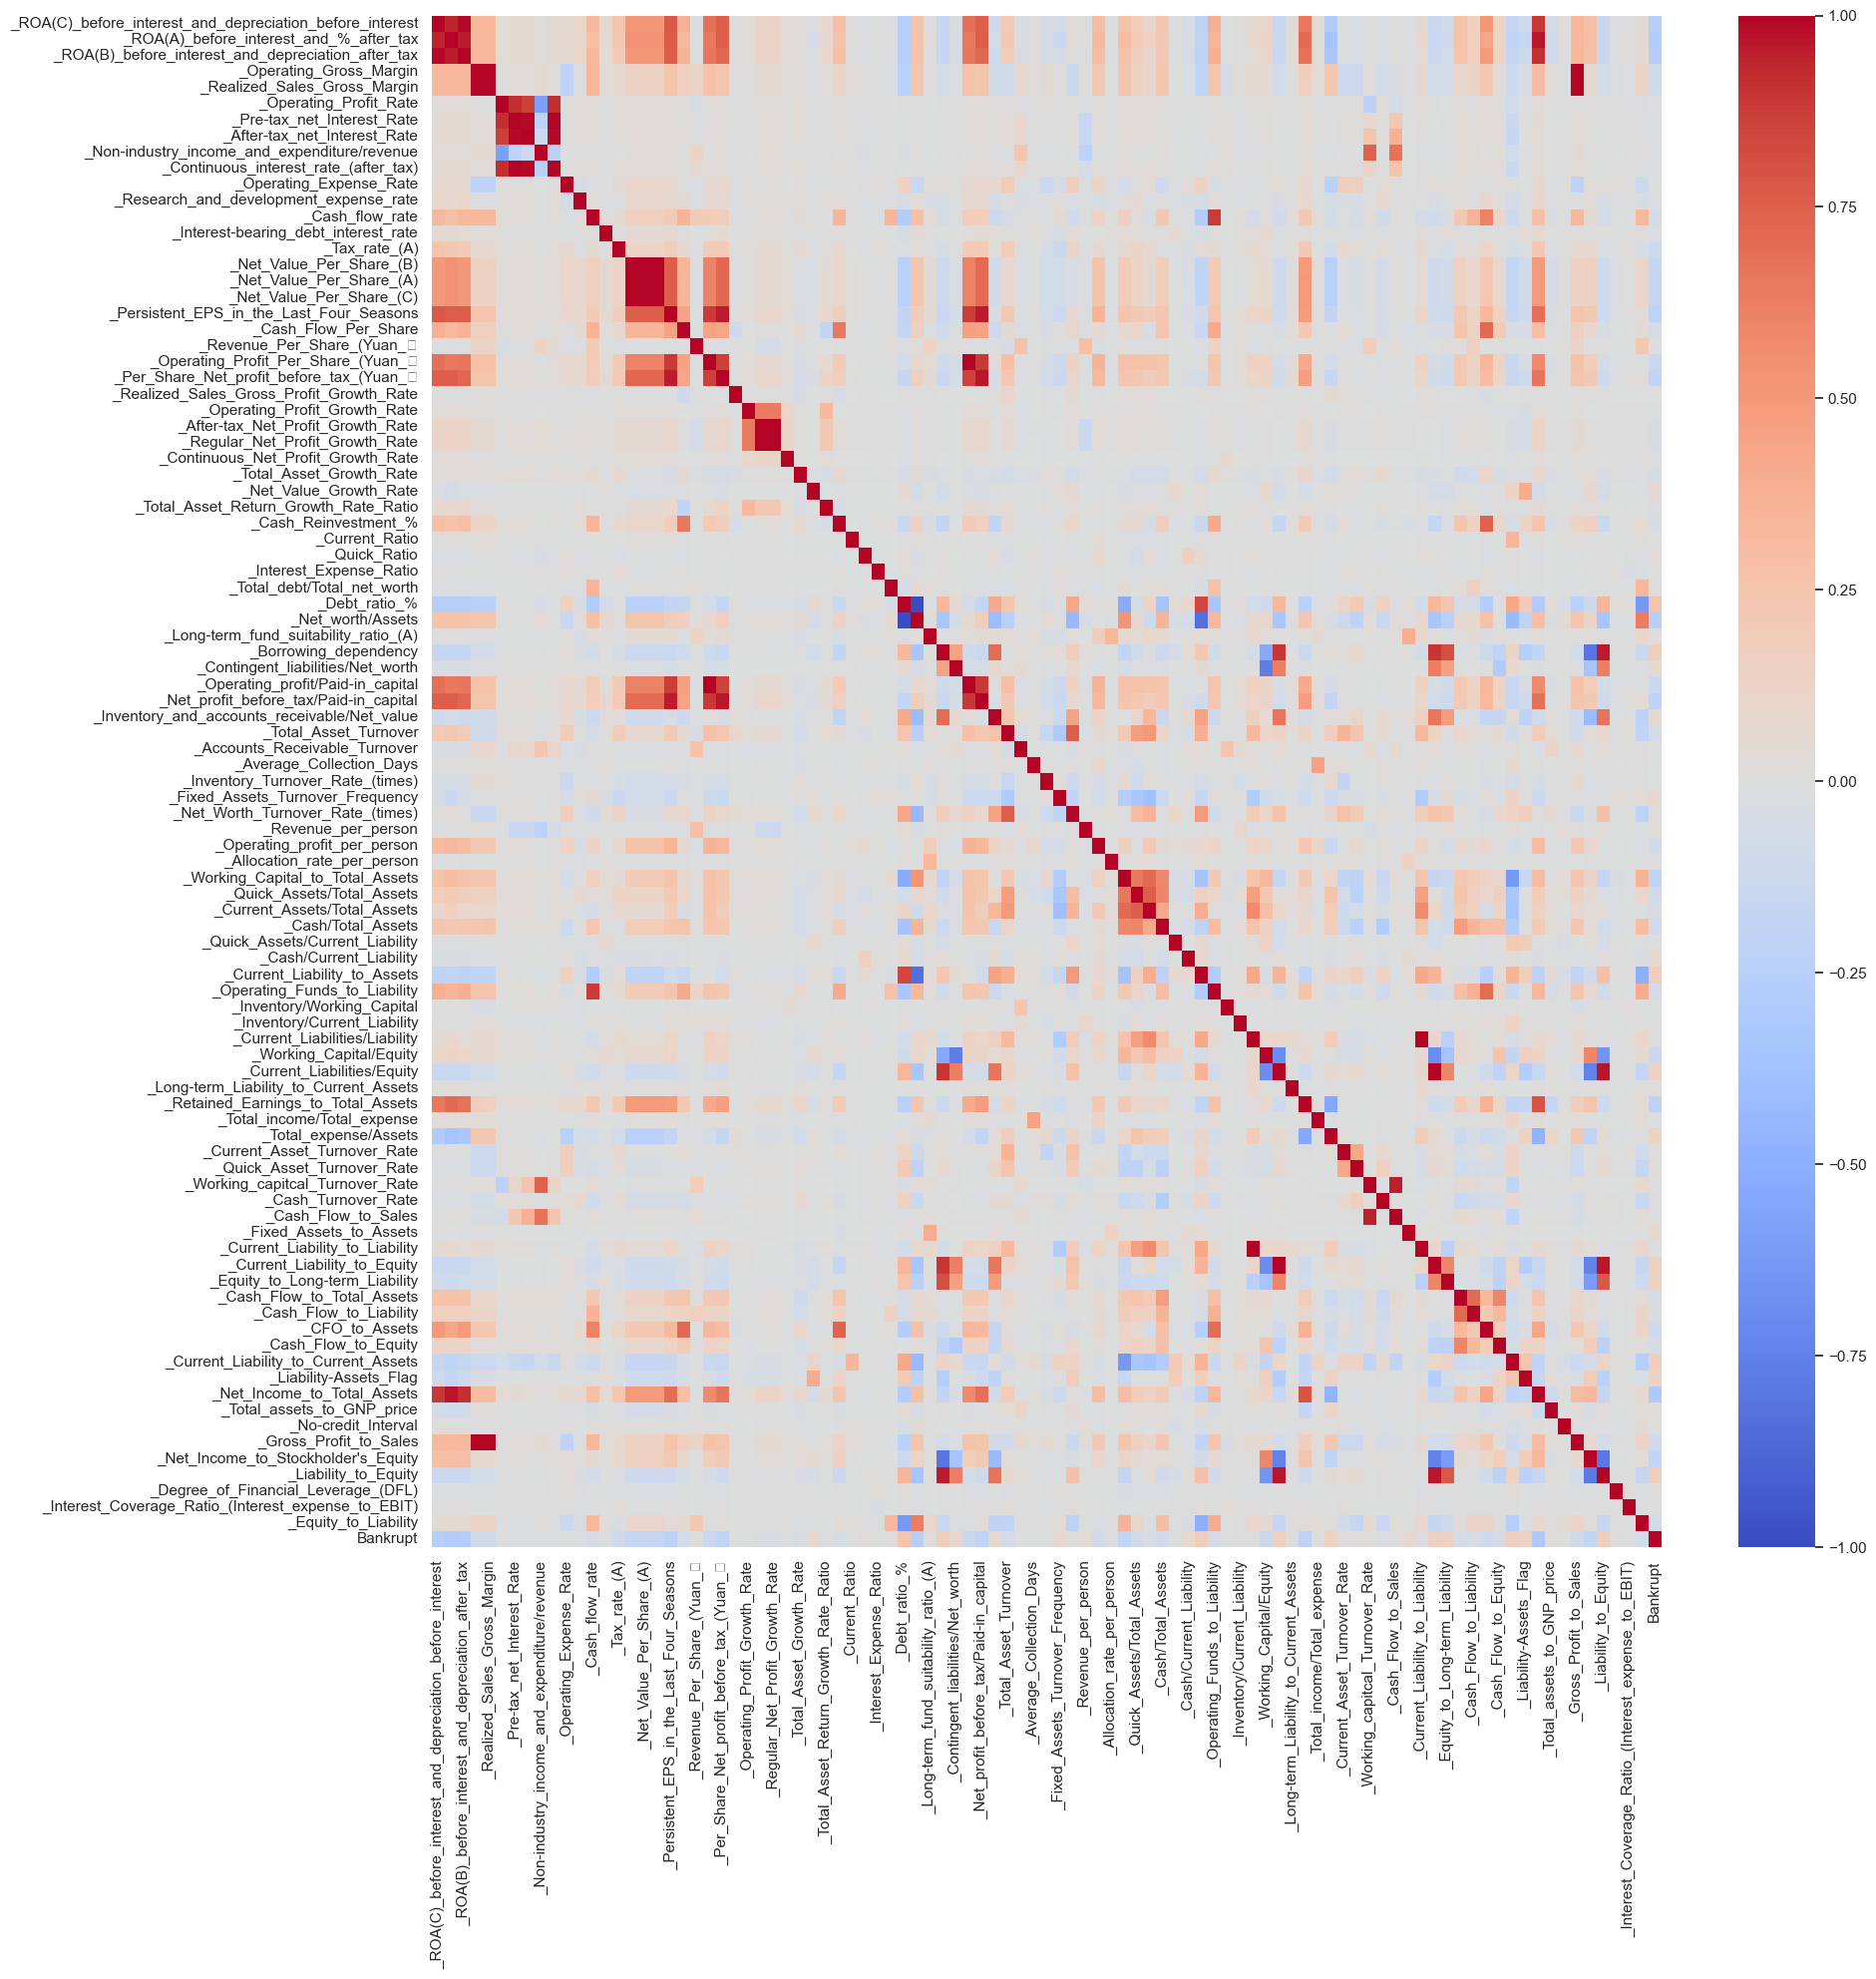

In [11]:
plt.figure(figsize=[20,20])
sns.heatmap(bank.corr(),vmin=-1,vmax=1,cmap='coolwarm')
plt.tight_layout()
plt.show()

### To make data set into seperate i.e dependent variable(y) and independent variable(x)

In [12]:
x = bank.iloc[:,:-1]

In [13]:
y = bank['Bankrupt']

### Scaling the data using StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scale = scale.fit_transform(x)

### Finding most important features in dataset

In [15]:
# 1) feature importans using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_scale,y)

RandomForestClassifier()

In [16]:
fearture_value = rfc.feature_importances_
feature_importance_rfc = pd.DataFrame({'Features':x.columns,'Fearture_values': fearture_value},index=None)
featur_rc = feature_importance_rfc.sort_values(by='Fearture_values',ascending=False).reset_index().iloc[:30,:]
featur_rc

index                                           Features  Fearture_values
0      18           _Persistent_EPS_in_the_Last_Four_Seasons         0.032839
1      89                _Net_Income_to_Stockholder's_Equity         0.031649
2      39                              _Borrowing_dependency         0.027386
3      17                           _Net_Value_Per_Share_(C)         0.023960
4      42             _Net_profit_before_tax/Paid-in_capital         0.022851
5      22           _Per_Share_Net_profit_before_tax_(Yuan_�         0.022167
6      92  _Interest_Coverage_Ratio_(Interest_expense_to_...         0.021975
7      91                _Degree_of_Financial_Leverage_(DFL)         0.020971
8      34                            _Interest_Expense_Ratio         0.020907
9      56                                 _Cash/Total_Assets         0.020840
10     16                           _Net_Value_Per_Share_(A)         0.020783
11     37                                  _Net_worth/Assets         0.020583
12     36                                      _Debt_ratio_%         0.020378
13     93                               _Equity_to_Liability         0.018854
14      8       _Non-industry_income_and_expenditure/revenue         0.018221
15     15                           _Net_Value_Per_Share_(B)         0.017591
16     85                        _Net_Income_to_Total_Assets         0.017553
17     64                            _Working_Capital/Equity         0.016949
18     87                                _No-credit_Interval         0.016797
19     68                        _Total_income/Total_expense         0.016325
20     90                               _Liability_to_Equity         0.016053
21      0  _ROA(C)_before_interest_and_depreciation_befor...         0.015331
22     51                       _Operating_profit_per_person         0.015074
23     61                         _Inventory/Working_Capital         0.015024
24      2  _ROA(B)_before_interest_and_depreciation_after...         0.014870
25      7                       _After-tax_net_Interest_Rate         0.014816
26      9              _Continuous_interest_rate_(after_tax)         0.014789
27     30              _Total_Asset_Return_Growth_Rate_Ratio         0.014389
28     53                   _Working_Capital_to_Total_Assets         0.014175
29      1            _ROA(A)_before_interest_and_%_after_tax         0.013329

In [17]:
# 2) feature importans using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_scale,y)

DecisionTreeClassifier()

In [18]:
fearture_value = dt.feature_importances_
feature_importance_dt = pd.DataFrame({'Features':x.columns,'Fearture_values': fearture_value},index=None)
feature_dt = feature_importance_dt.sort_values(by='Fearture_values',ascending=False).reset_index().iloc[:30,:]
feature_dt 

index                                           Features  Fearture_values
0      89                _Net_Income_to_Stockholder's_Equity         0.146927
1       2  _ROA(B)_before_interest_and_depreciation_after...         0.049707
2      18           _Persistent_EPS_in_the_Last_Four_Seasons         0.043727
3      91                _Degree_of_Financial_Leverage_(DFL)         0.041388
4      39                              _Borrowing_dependency         0.039938
5      30              _Total_Asset_Return_Growth_Rate_Ratio         0.034635
6      92  _Interest_Coverage_Ratio_(Interest_expense_to_...         0.030627
7      28                           _Total_Asset_Growth_Rate         0.029914
8      73                                _Cash_Turnover_Rate         0.028196
9      22           _Per_Share_Net_profit_before_tax_(Yuan_�         0.027793
10     56                                 _Cash/Total_Assets         0.027320
11     81                                     _CFO_to_Assets         0.023732
12     61                         _Inventory/Working_Capital         0.023152
13     78                     _Equity_to_Long-term_Liability         0.022378
14     47                   _Inventory_Turnover_Rate_(times)         0.020416
15     38              _Long-term_fund_suitability_ratio_(A)         0.020177
16     34                            _Interest_Expense_Ratio         0.020034
17      6                         _Pre-tax_net_Interest_Rate         0.019048
18     15                           _Net_Value_Per_Share_(B)         0.017524
19     12                                    _Cash_flow_rate         0.017283
20     42             _Net_profit_before_tax/Paid-in_capital         0.016992
21      9              _Continuous_interest_rate_(after_tax)         0.015998
22     48                   _Fixed_Assets_Turnover_Frequency         0.015535
23      8       _Non-industry_income_and_expenditure/revenue         0.015482
24     27                 _Continuous_Net_Profit_Growth_Rate         0.014213
25     24                      _Operating_Profit_Growth_Rate         0.013488
26     85                        _Net_Income_to_Total_Assets         0.013047
27     71                         _Quick_Asset_Turnover_Rate         0.011746
28     79                         _Cash_Flow_to_Total_Assets         0.011183
29      7                       _After-tax_net_Interest_Rate         0.010837

In [19]:
# 3) feature importans using xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_scale,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
fearture_value = xgb.feature_importances_
feature_importance_xgb = pd.DataFrame({'Features':x.columns,'Fearture_values': fearture_value},index=None)
feature_xgb = feature_importance_xgb.sort_values(by='Fearture_values',ascending=False).reset_index().iloc[:30,:]
feature_xgb 

index                                           Features  Fearture_values
0      89                _Net_Income_to_Stockholder's_Equity         0.155352
1      18           _Persistent_EPS_in_the_Last_Four_Seasons         0.110401
2      36                                      _Debt_ratio_%         0.044332
3      39                              _Borrowing_dependency         0.036897
4       2  _ROA(B)_before_interest_and_depreciation_after...         0.031794
5      22           _Per_Share_Net_profit_before_tax_(Yuan_�         0.022559
6      42             _Net_profit_before_tax/Paid-in_capital         0.021313
7      17                           _Net_Value_Per_Share_(C)         0.020364
8       8       _Non-industry_income_and_expenditure/revenue         0.016946
9      49                   _Net_Worth_Turnover_Rate_(times)         0.016171
10      6                         _Pre-tax_net_Interest_Rate         0.015635
11     56                                 _Cash/Total_Assets         0.015346
12     34                            _Interest_Expense_Ratio         0.014479
13     61                         _Inventory/Working_Capital         0.013635
14     16                           _Net_Value_Per_Share_(A)         0.013413
15     91                _Degree_of_Financial_Leverage_(DFL)         0.013047
16      0  _ROA(C)_before_interest_and_depreciation_befor...         0.012955
17     48                   _Fixed_Assets_Turnover_Frequency         0.012925
18      3                            _Operating_Gross_Margin         0.012834
19     92  _Interest_Coverage_Ratio_(Interest_expense_to_...         0.011881
20     67                 _Retained_Earnings_to_Total_Assets         0.011471
21      9              _Continuous_interest_rate_(after_tax)         0.011285
22     12                                    _Cash_flow_rate         0.010829
23     65                        _Current_Liabilities/Equity         0.010719
24     54                         _Quick_Assets/Total_Assets         0.010070
25      1            _ROA(A)_before_interest_and_%_after_tax         0.010037
26     59                       _Current_Liability_to_Assets         0.009725
27     68                        _Total_income/Total_expense         0.009527
28     47                   _Inventory_Turnover_Rate_(times)         0.009436
29     15                           _Net_Value_Per_Share_(B)         0.009316

In [21]:
# 4) feature importans using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier()
adboost.fit(x_scale,y)

AdaBoostClassifier()

In [22]:
fearture_value = adboost.feature_importances_
feature_importance_adboost = pd.DataFrame({'Features':x.columns,'Fearture_values': fearture_value},index=None)
feature_adboost = feature_importance_adboost.sort_values(by='Fearture_values',ascending=False).reset_index().iloc[:30,:]
feature_adboost

index                                           Features  Fearture_values
0      39                              _Borrowing_dependency             0.08
1      89                _Net_Income_to_Stockholder's_Equity             0.06
2      56                                 _Cash/Total_Assets             0.04
3      67                 _Retained_Earnings_to_Total_Assets             0.04
4      19                               _Cash_Flow_Per_Share             0.04
5      27                 _Continuous_Net_Profit_Growth_Rate             0.04
6      25                  _After-tax_Net_Profit_Growth_Rate             0.04
7      80                            _Cash_Flow_to_Liability             0.04
8      92  _Interest_Coverage_Ratio_(Interest_expense_to_...             0.04
9      85                        _Net_Income_to_Total_Assets             0.04
10     79                         _Cash_Flow_to_Total_Assets             0.02
11     49                   _Net_Worth_Turnover_Rate_(times)             0.02
12     31                               _Cash_Reinvestment_%             0.02
13     42             _Net_profit_before_tax/Paid-in_capital             0.02
14     44                              _Total_Asset_Turnover             0.02
15      1            _ROA(A)_before_interest_and_%_after_tax             0.02
16     48                   _Fixed_Assets_Turnover_Frequency             0.02
17     51                       _Operating_profit_per_person             0.02
18     78                     _Equity_to_Long-term_Liability             0.02
19     53                   _Working_Capital_to_Total_Assets             0.02
20     55                       _Current_Assets/Total_Assets             0.02
21     83               _Current_Liability_to_Current_Assets             0.02
22     59                       _Current_Liability_to_Assets             0.02
23     64                            _Working_Capital/Equity             0.02
24     72                    _Working_capitcal_Turnover_Rate             0.02
25     47                   _Inventory_Turnover_Rate_(times)             0.02
26     93                               _Equity_to_Liability             0.02
27      8       _Non-industry_income_and_expenditure/revenue             0.02
28     15                           _Net_Value_Per_Share_(B)             0.02
29     17                           _Net_Value_Per_Share_(C)             0.02

In [23]:
f_1 = pd.merge(featur_rc,feature_dt,on='index')
f_1

index                                         Features_x  \
0      18           _Persistent_EPS_in_the_Last_Four_Seasons   
1      89                _Net_Income_to_Stockholder's_Equity   
2      39                              _Borrowing_dependency   
3      42             _Net_profit_before_tax/Paid-in_capital   
4      22           _Per_Share_Net_profit_before_tax_(Yuan_�   
5      92  _Interest_Coverage_Ratio_(Interest_expense_to_...   
6      91                _Degree_of_Financial_Leverage_(DFL)   
7      34                            _Interest_Expense_Ratio   
8      56                                 _Cash/Total_Assets   
9       8       _Non-industry_income_and_expenditure/revenue   
10     15                           _Net_Value_Per_Share_(B)   
11     85                        _Net_Income_to_Total_Assets   
12     61                         _Inventory/Working_Capital   
13      2  _ROA(B)_before_interest_and_depreciation_after...   
14      7                       _After-tax_net_Interest_Rate   
15      9              _Continuous_interest_rate_(after_tax)   
16     30              _Total_Asset_Return_Growth_Rate_Ratio   

    Fearture_values_x                                         Features_y  \
0            0.032839           _Persistent_EPS_in_the_Last_Four_Seasons   
1            0.031649                _Net_Income_to_Stockholder's_Equity   
2            0.027386                              _Borrowing_dependency   
3            0.022851             _Net_profit_before_tax/Paid-in_capital   
4            0.022167           _Per_Share_Net_profit_before_tax_(Yuan_�   
5            0.021975  _Interest_Coverage_Ratio_(Interest_expense_to_...   
6            0.020971                _Degree_of_Financial_Leverage_(DFL)   
7            0.020907                            _Interest_Expense_Ratio   
8            0.020840                                 _Cash/Total_Assets   
9            0.018221       _Non-industry_income_and_expenditure/revenue   
10           0.017591                           _Net_Value_Per_Share_(B)   
11           0.017553                        _Net_Income_to_Total_Assets   
12           0.015024                         _Inventory/Working_Capital   
13           0.014870  _ROA(B)_before_interest_and_depreciation_after...   
14           0.014816                       _After-tax_net_Interest_Rate   
15           0.014789              _Continuous_interest_rate_(after_tax)   
16           0.014389              _Total_Asset_Return_Growth_Rate_Ratio   

    Fearture_values_y  
0            0.043727  
1            0.146927  
2            0.039938  
3            0.016992  
4            0.027793  
5            0.030627  
6            0.041388  
7            0.020034  
8            0.027320  
9            0.015482  
10           0.017524  
11           0.013047  
12           0.023152  
13           0.049707  
14           0.010837  
15           0.015998  
16           0.034635

In [24]:
f_2 = pd.merge(feature_xgb ,feature_adboost,on='index')
f_2

index                                         Features_x  \
0      89                _Net_Income_to_Stockholder's_Equity   
1      39                              _Borrowing_dependency   
2      42             _Net_profit_before_tax/Paid-in_capital   
3      17                           _Net_Value_Per_Share_(C)   
4       8       _Non-industry_income_and_expenditure/revenue   
5      49                   _Net_Worth_Turnover_Rate_(times)   
6      56                                 _Cash/Total_Assets   
7      48                   _Fixed_Assets_Turnover_Frequency   
8      92  _Interest_Coverage_Ratio_(Interest_expense_to_...   
9      67                 _Retained_Earnings_to_Total_Assets   
10      1            _ROA(A)_before_interest_and_%_after_tax   
11     59                       _Current_Liability_to_Assets   
12     47                   _Inventory_Turnover_Rate_(times)   
13     15                           _Net_Value_Per_Share_(B)   

    Fearture_values_x                                         Features_y  \
0            0.155352                _Net_Income_to_Stockholder's_Equity   
1            0.036897                              _Borrowing_dependency   
2            0.021313             _Net_profit_before_tax/Paid-in_capital   
3            0.020364                           _Net_Value_Per_Share_(C)   
4            0.016946       _Non-industry_income_and_expenditure/revenue   
5            0.016171                   _Net_Worth_Turnover_Rate_(times)   
6            0.015346                                 _Cash/Total_Assets   
7            0.012925                   _Fixed_Assets_Turnover_Frequency   
8            0.011881  _Interest_Coverage_Ratio_(Interest_expense_to_...   
9            0.011471                 _Retained_Earnings_to_Total_Assets   
10           0.010037            _ROA(A)_before_interest_and_%_after_tax   
11           0.009725                       _Current_Liability_to_Assets   
12           0.009436                   _Inventory_Turnover_Rate_(times)   
13           0.009316                           _Net_Value_Per_Share_(B)   

    Fearture_values_y  
0                0.06  
1                0.08  
2                0.02  
3                0.02  
4                0.02  
5                0.02  
6                0.04  
7                0.02  
8                0.04  
9                0.04  
10               0.02  
11               0.02  
12               0.02  
13               0.02

In [25]:
col = ['Col_index','Features_rf','Features_values_rf','Features_dt','Features_values_dt','Features_xgb','Features_values_xgb','Features_adboost','Features_values_adboost']
final_imp_features_all_model = pd.merge(f_1,f_2,on='index')
final_imp_features_all_model.columns = col
final_imp_features_all_model

Col_index                                        Features_rf  \
0         89                _Net_Income_to_Stockholder's_Equity   
1         39                              _Borrowing_dependency   
2         42             _Net_profit_before_tax/Paid-in_capital   
3         92  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4         56                                 _Cash/Total_Assets   
5          8       _Non-industry_income_and_expenditure/revenue   
6         15                           _Net_Value_Per_Share_(B)   

   Features_values_rf                                        Features_dt  \
0            0.031649                _Net_Income_to_Stockholder's_Equity   
1            0.027386                              _Borrowing_dependency   
2            0.022851             _Net_profit_before_tax/Paid-in_capital   
3            0.021975  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4            0.020840                                 _Cash/Total_Assets   
5            0.018221       _Non-industry_income_and_expenditure/revenue   
6            0.017591                           _Net_Value_Per_Share_(B)   

   Features_values_dt                                       Features_xgb  \
0            0.146927                _Net_Income_to_Stockholder's_Equity   
1            0.039938                              _Borrowing_dependency   
2            0.016992             _Net_profit_before_tax/Paid-in_capital   
3            0.030627  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4            0.027320                                 _Cash/Total_Assets   
5            0.015482       _Non-industry_income_and_expenditure/revenue   
6            0.017524                           _Net_Value_Per_Share_(B)   

   Features_values_xgb                                   Features_adboost  \
0             0.155352                _Net_Income_to_Stockholder's_Equity   
1             0.036897                              _Borrowing_dependency   
2             0.021313             _Net_profit_before_tax/Paid-in_capital   
3             0.011881  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4             0.015346                                 _Cash/Total_Assets   
5             0.016946       _Non-industry_income_and_expenditure/revenue   
6             0.009316                           _Net_Value_Per_Share_(B)   

   Features_values_adboost  
0                     0.06  
1                     0.08  
2                     0.02  
3                     0.04  
4                     0.04  
5                     0.02  
6                     0.02

# EDA

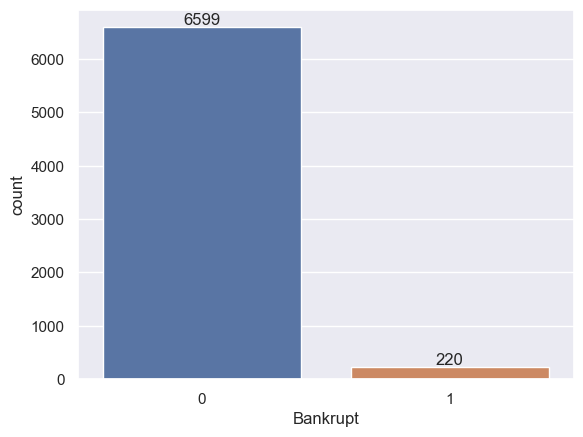

In [26]:
# How many company fall under 0 and 1 
ax = sns.countplot(bank,x='Bankrupt')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

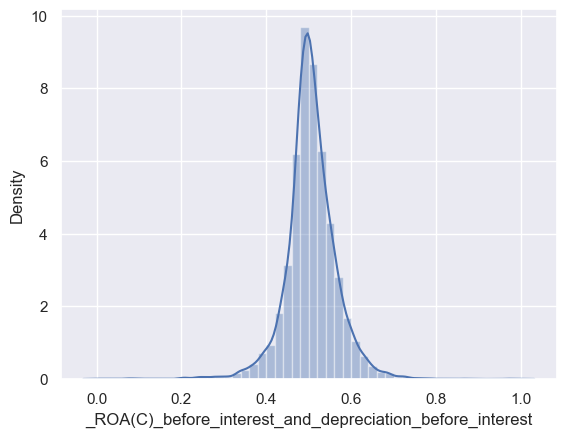

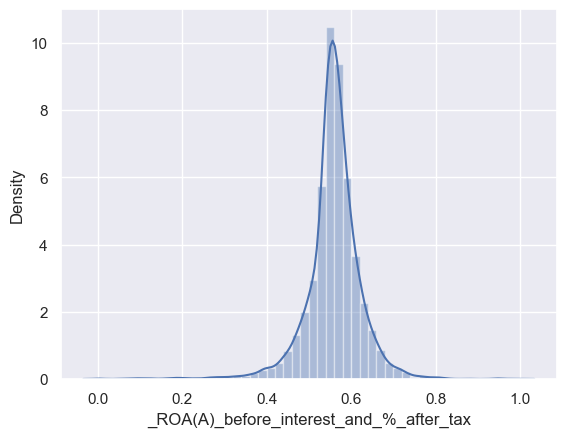

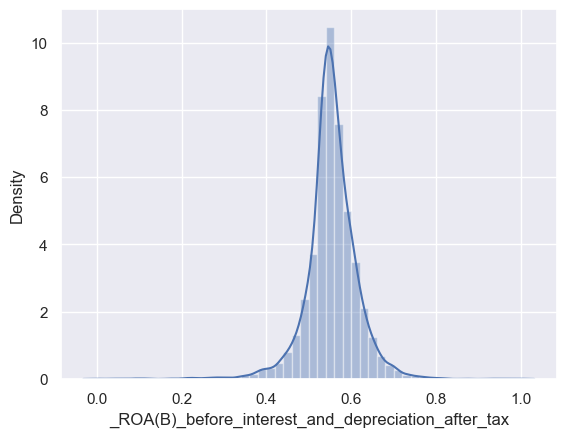

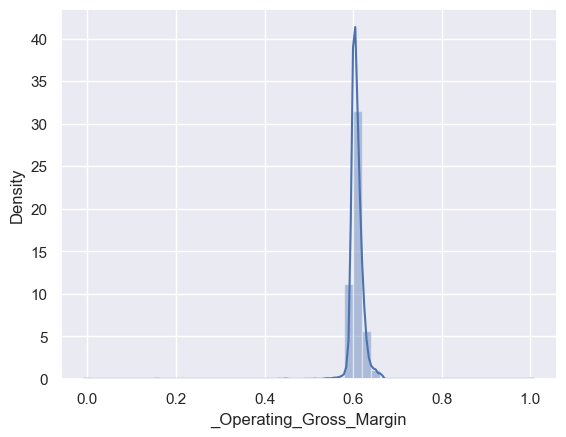

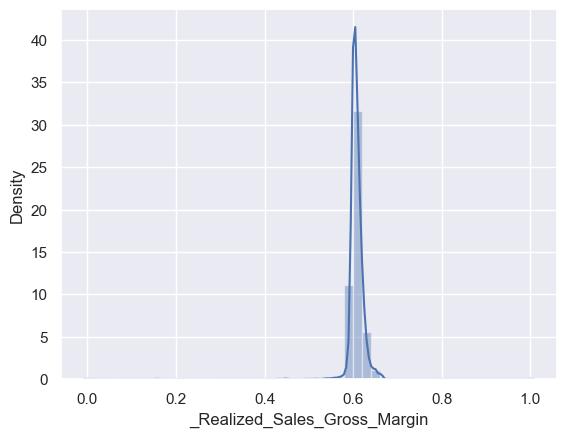

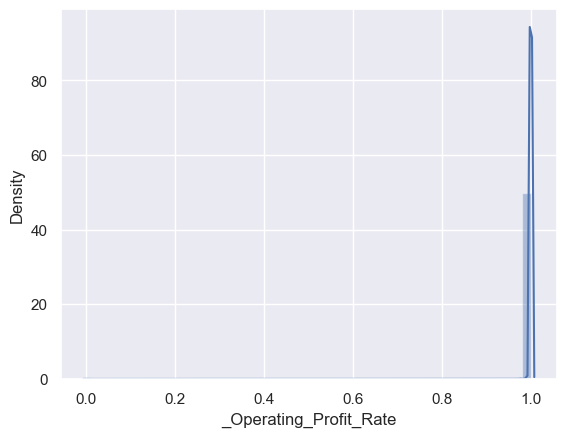

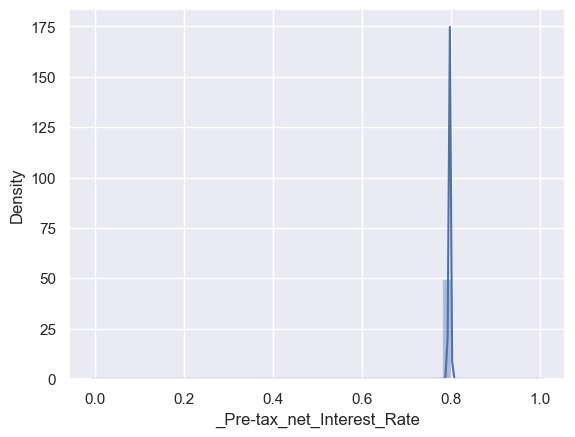

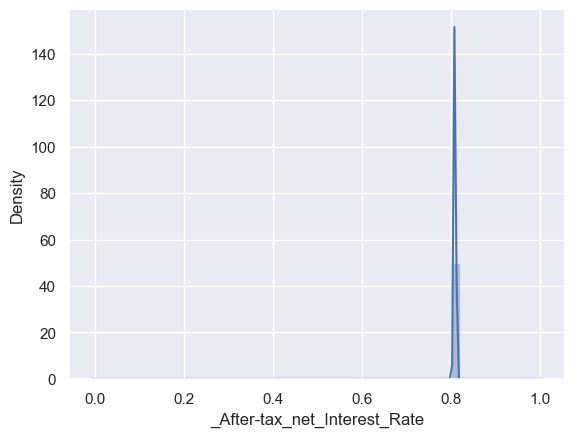

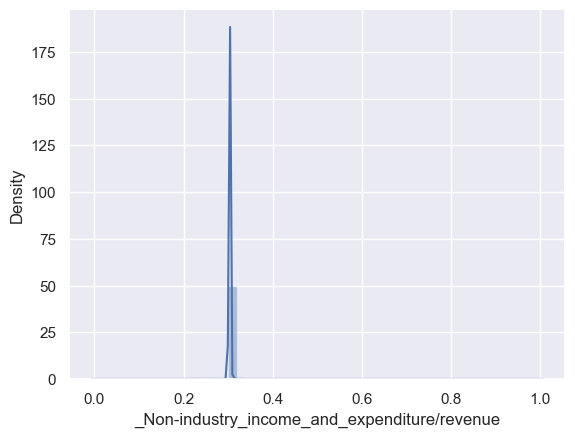

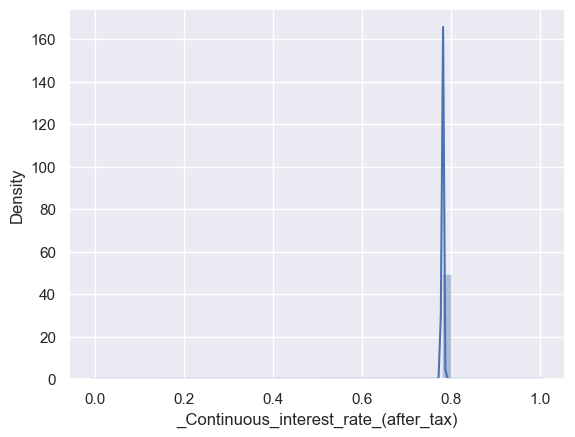

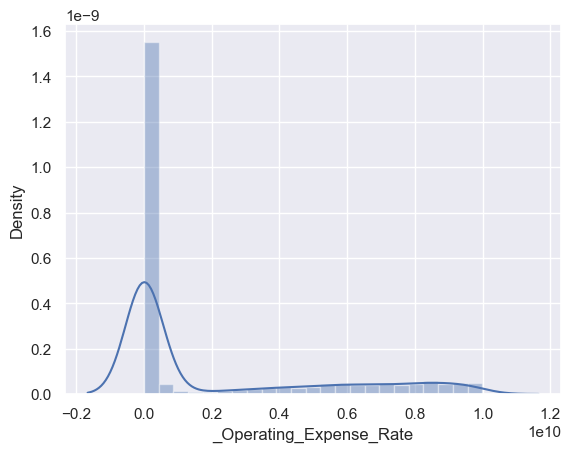

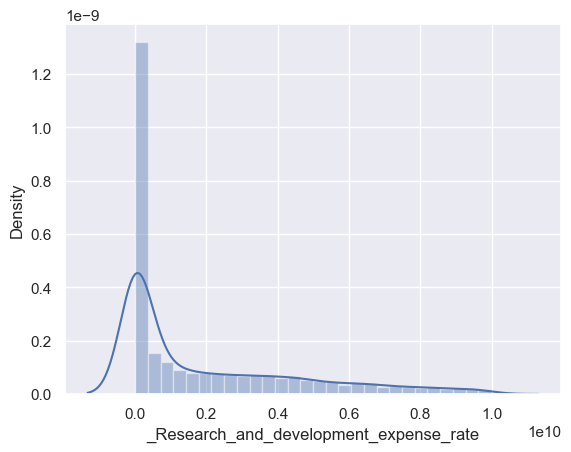

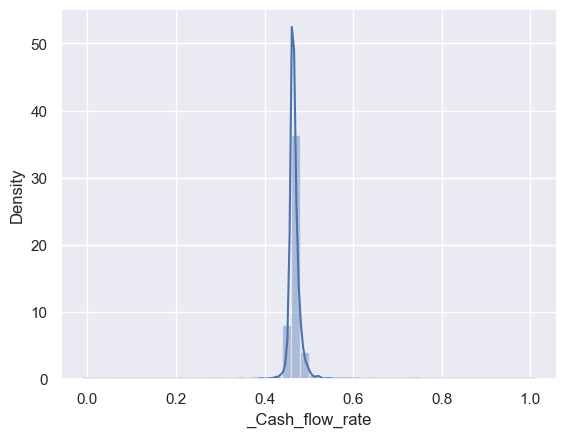

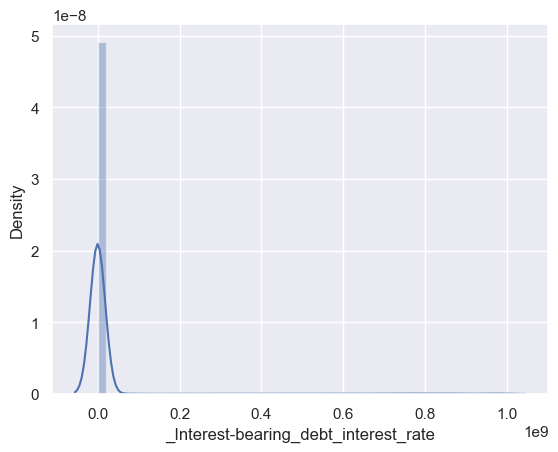

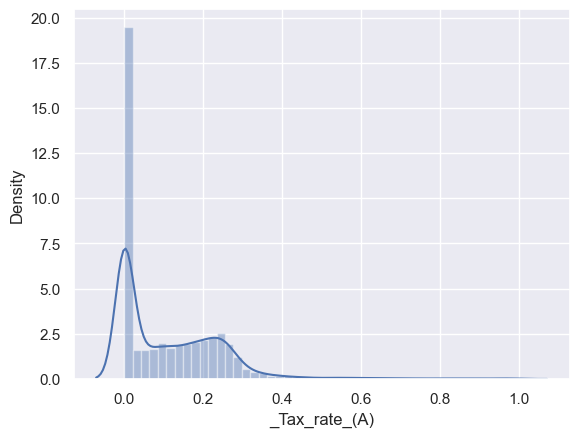

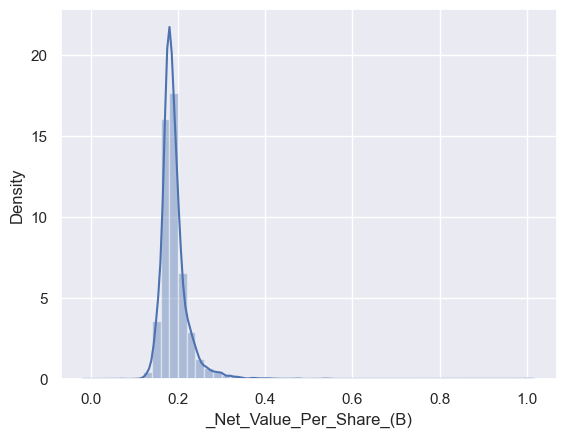

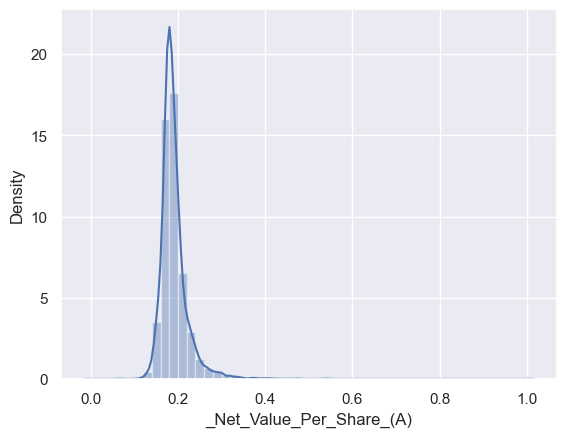

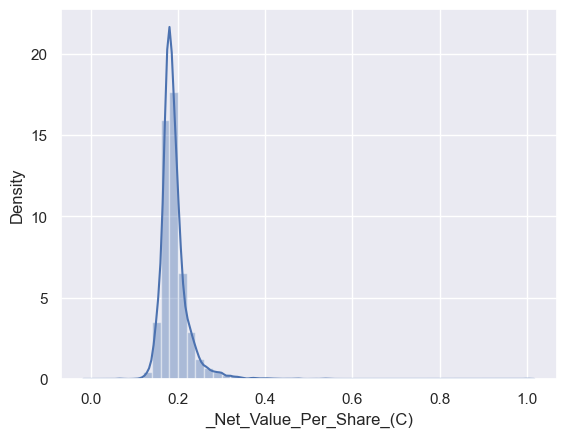

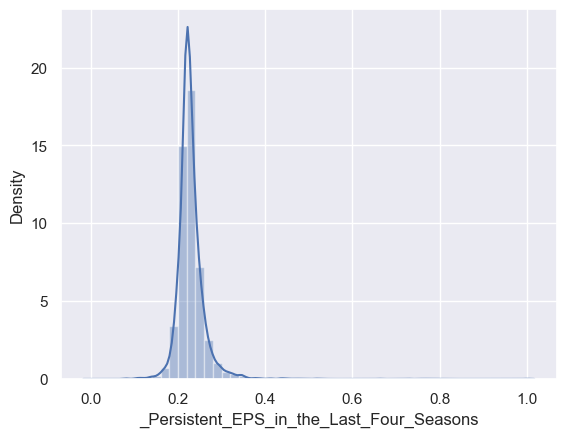

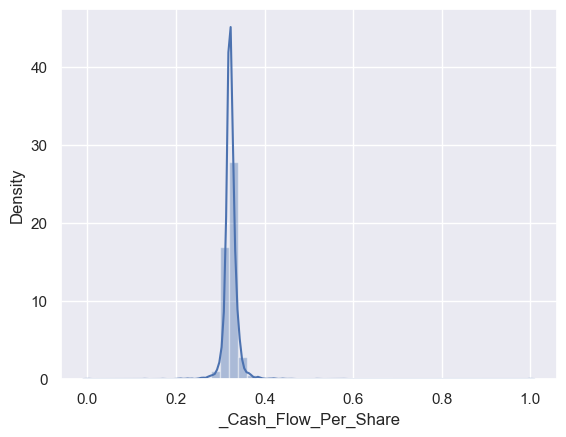

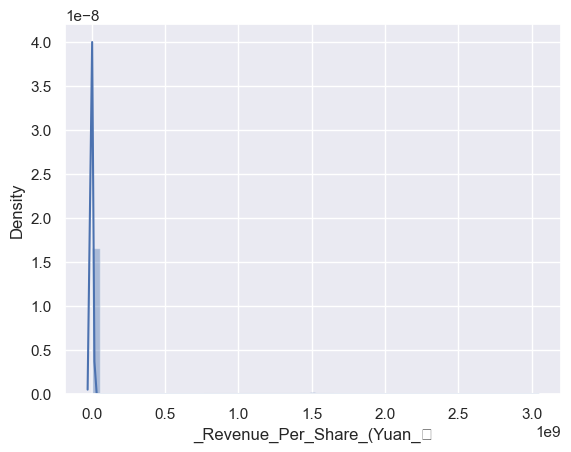

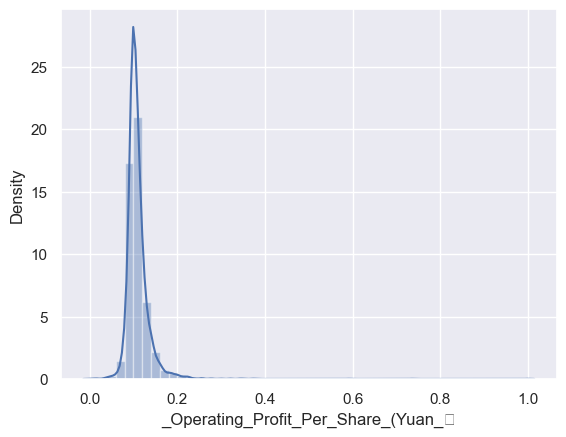

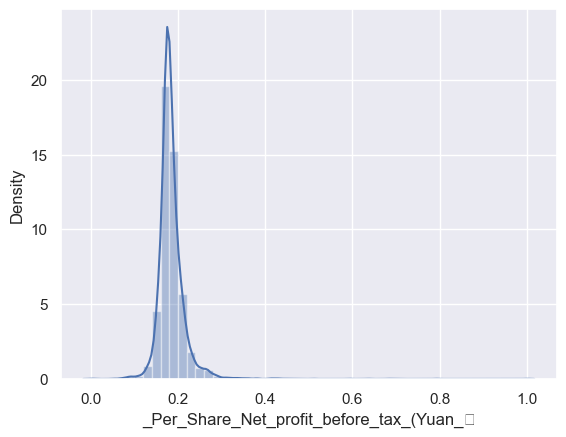

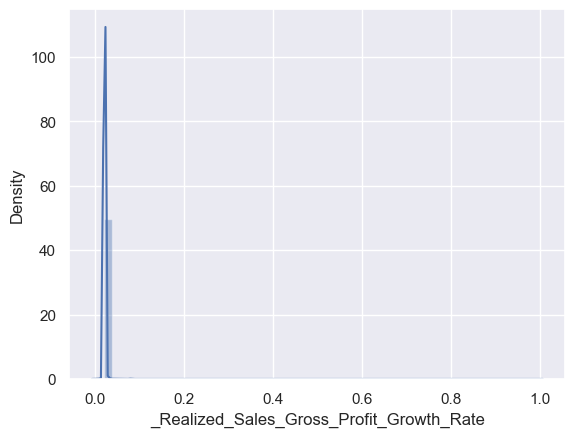

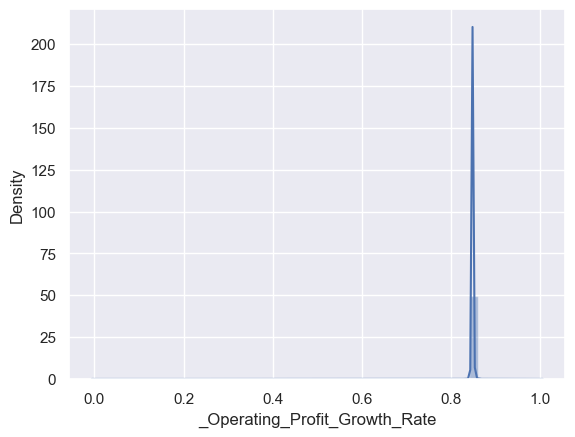

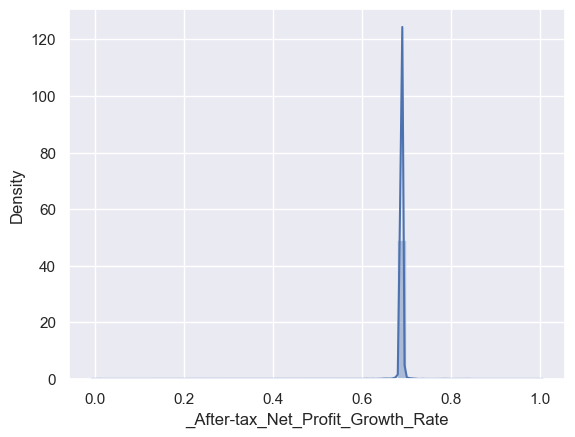

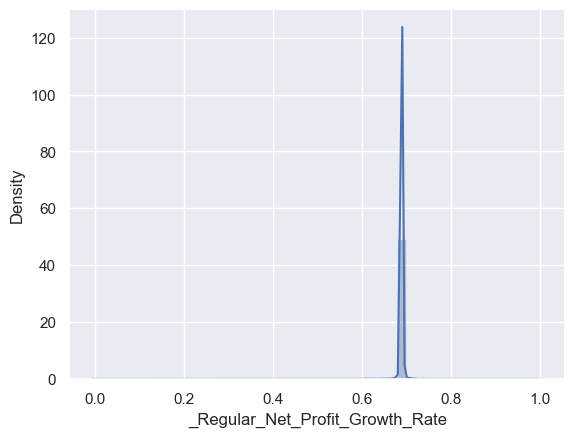

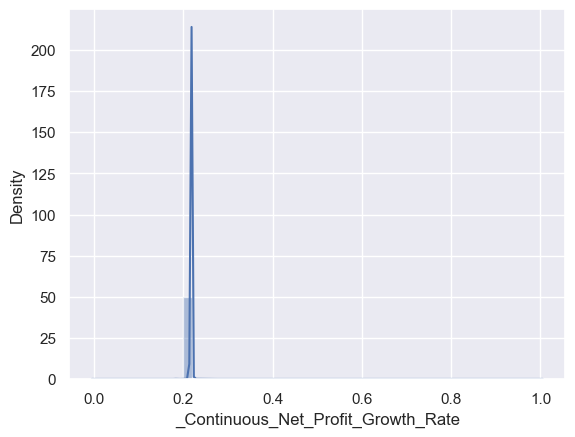

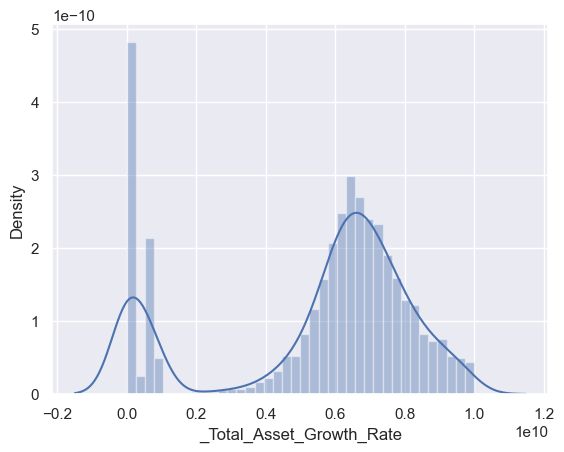

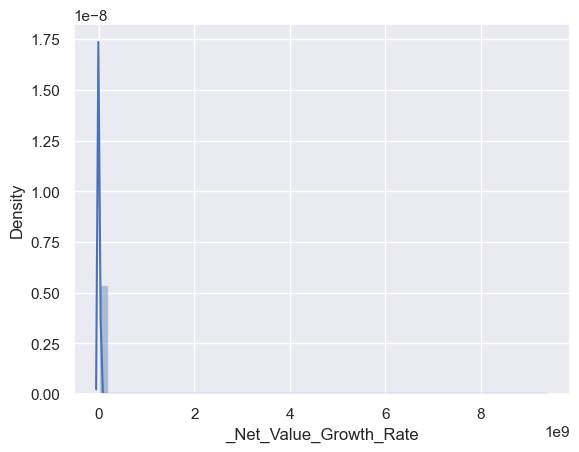

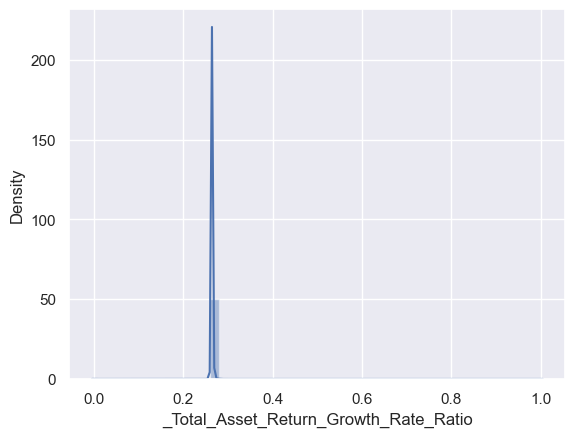

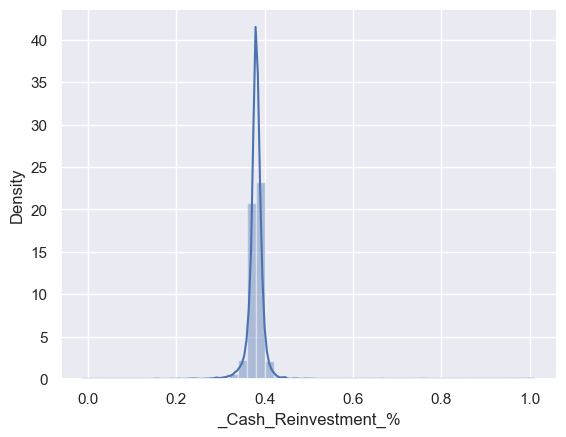

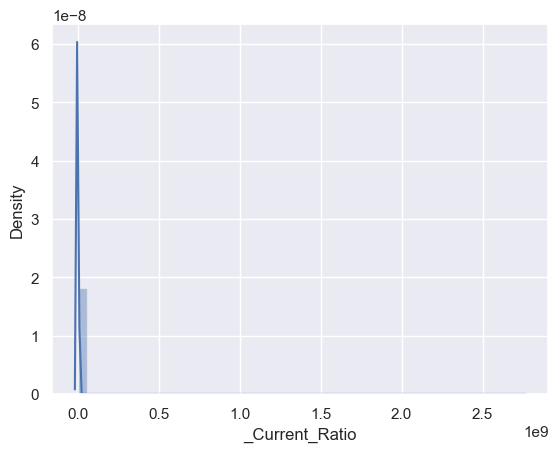

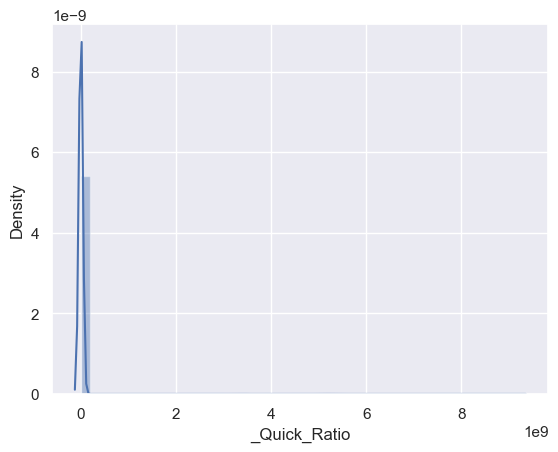

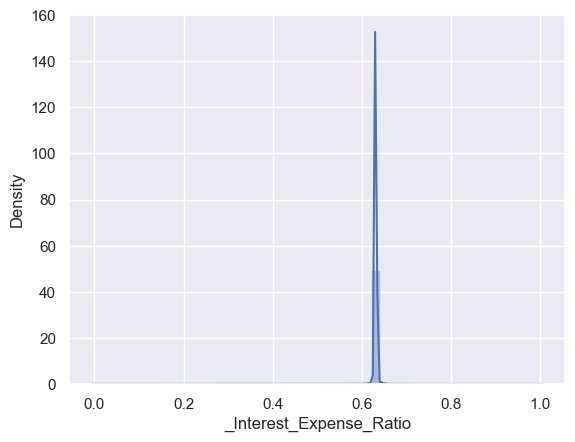

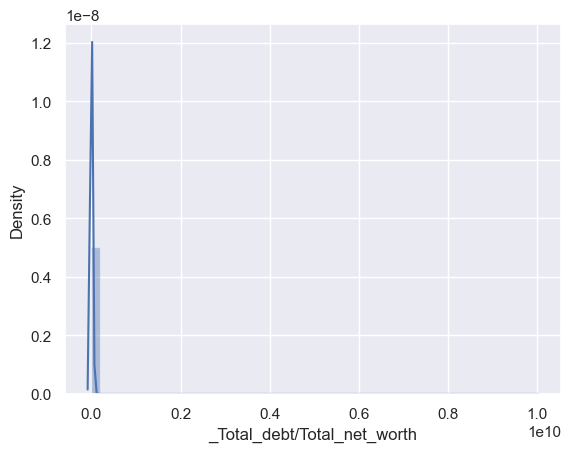

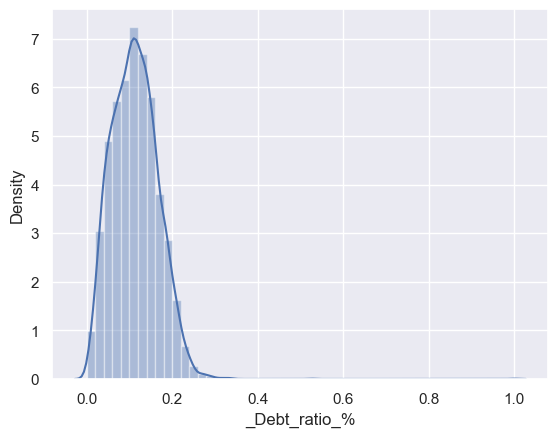

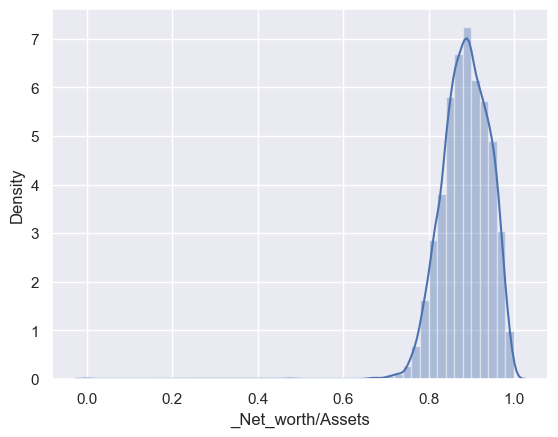

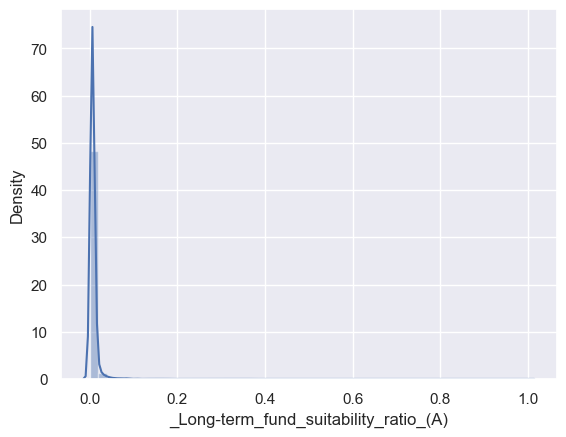

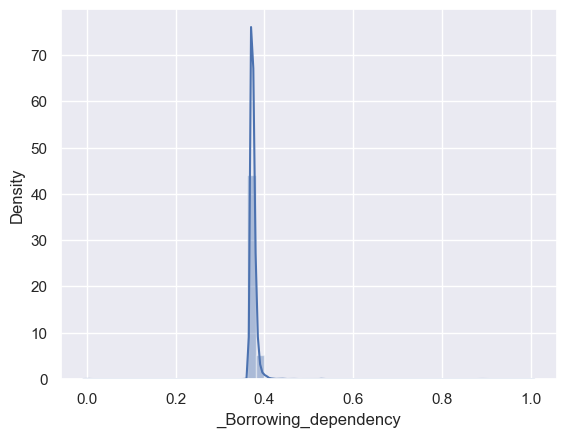

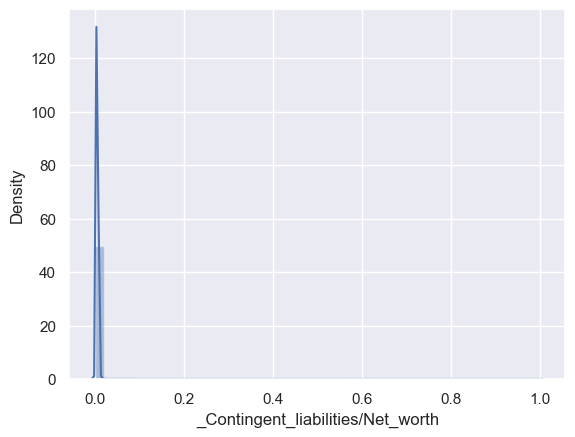

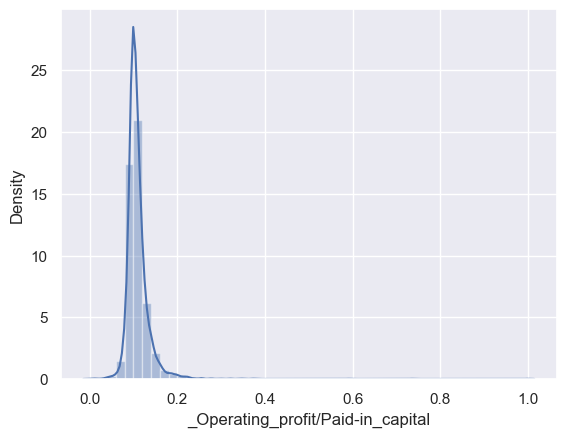

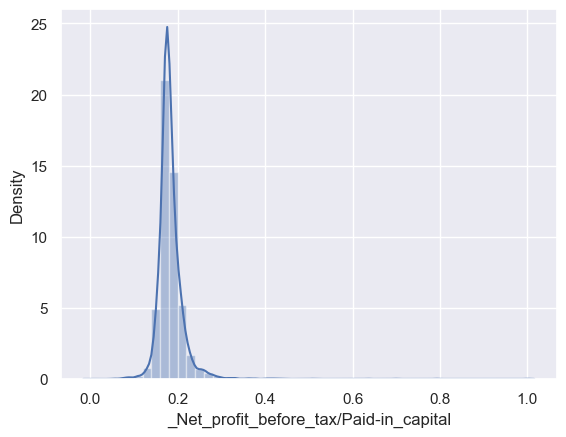

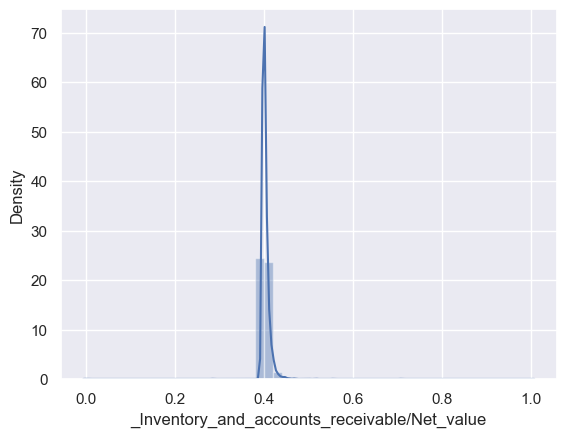

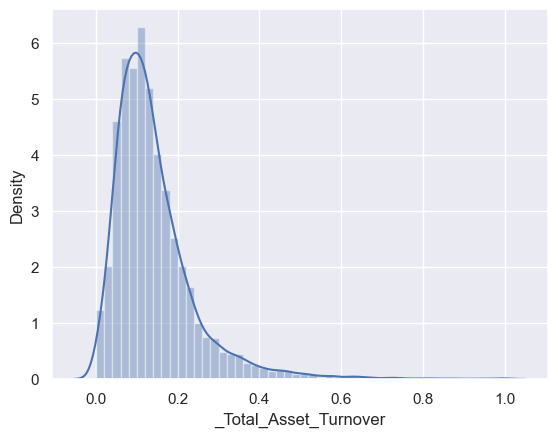

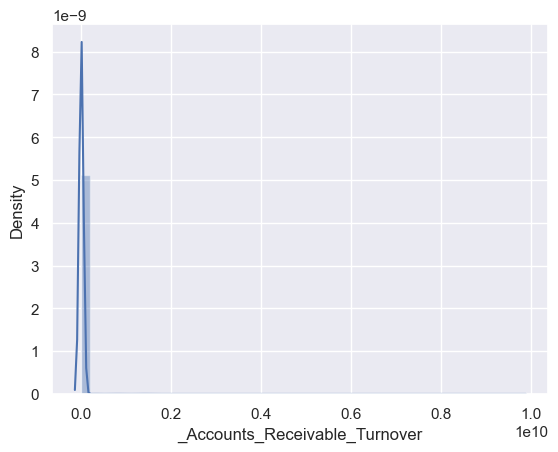

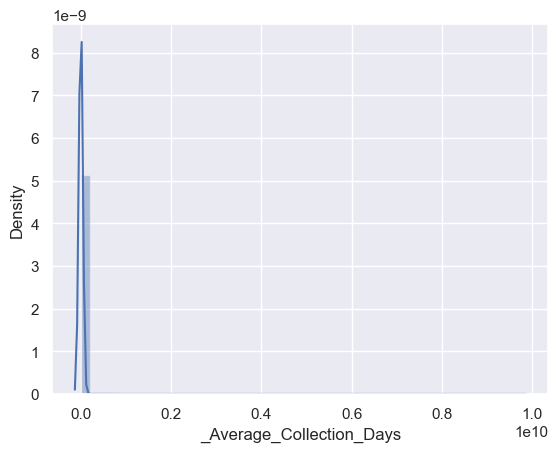

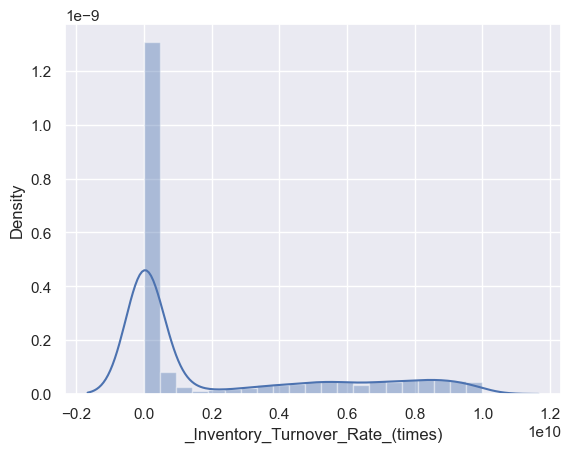

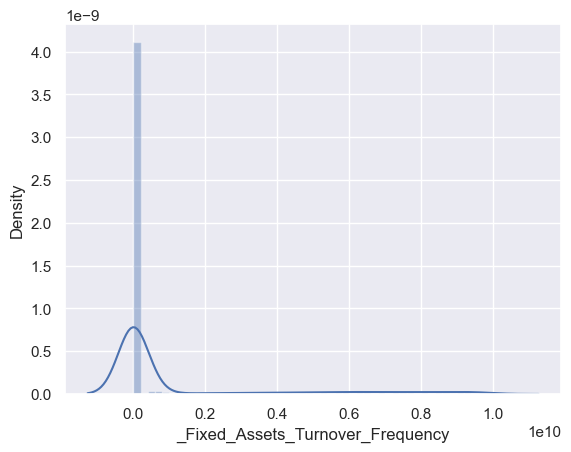

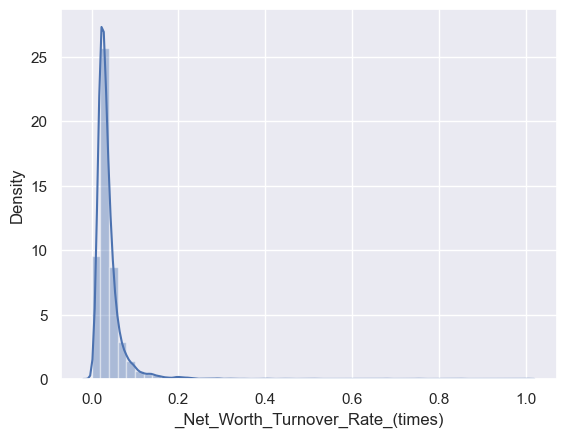

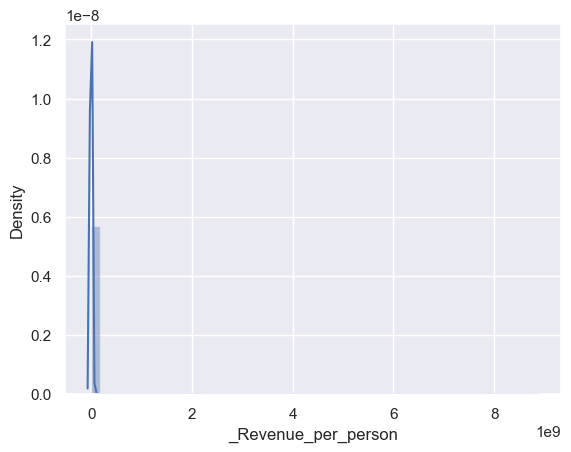

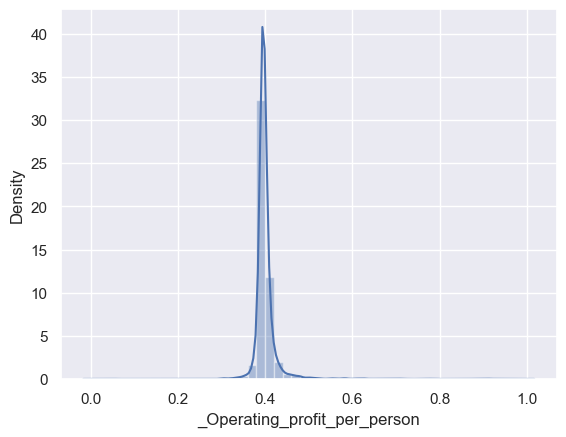

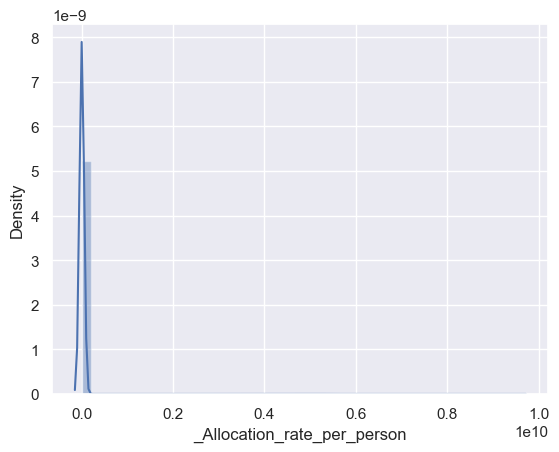

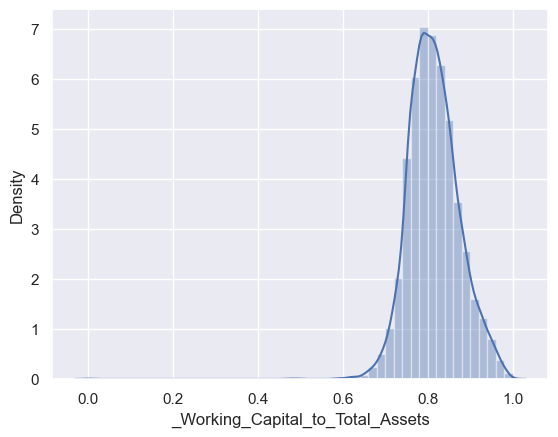

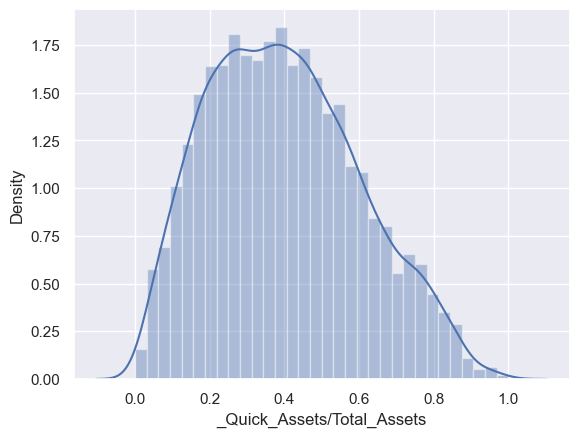

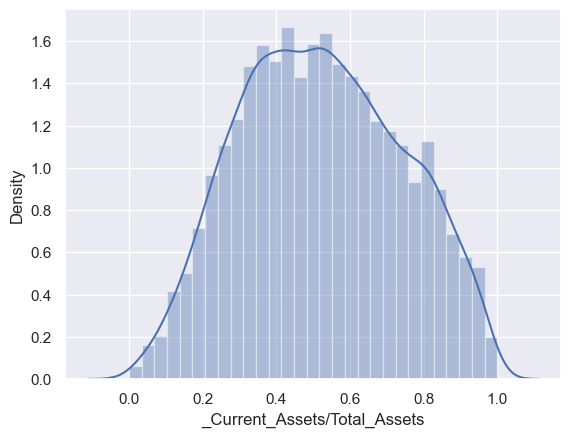

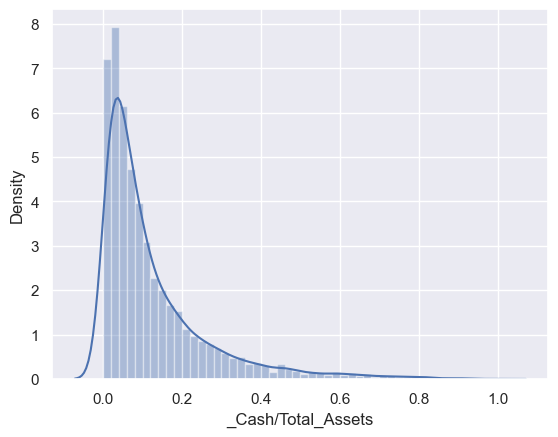

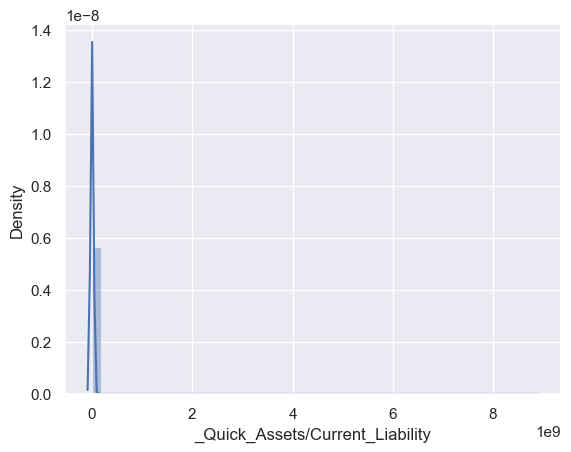

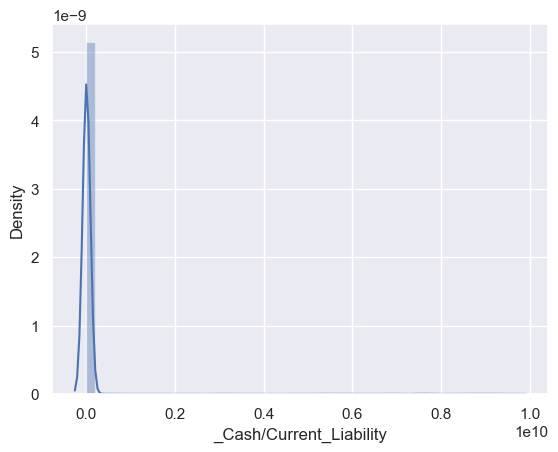

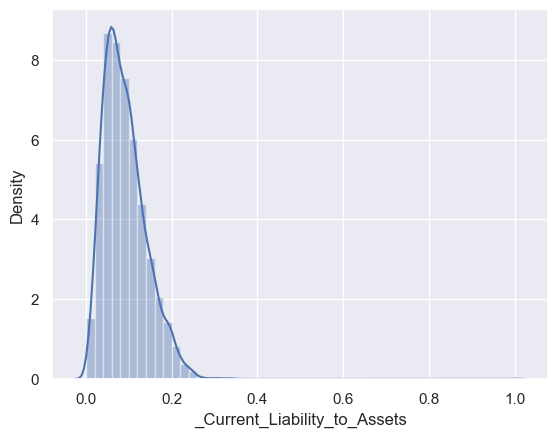

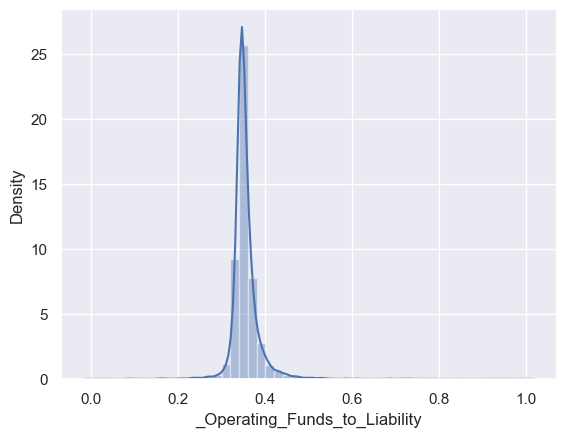

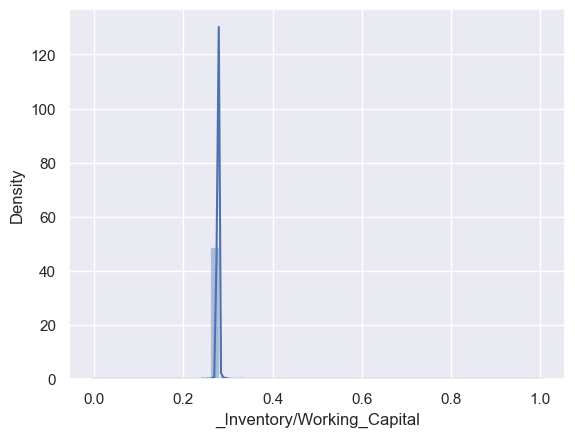

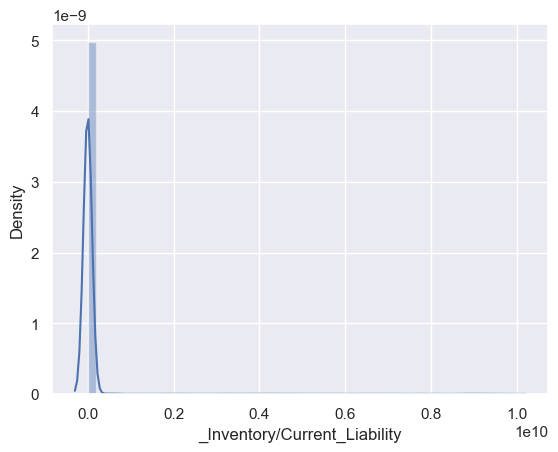

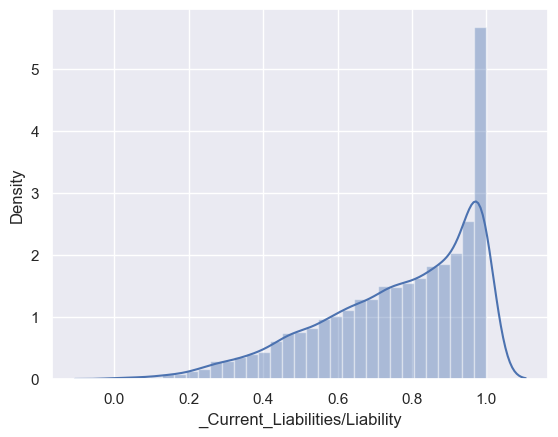

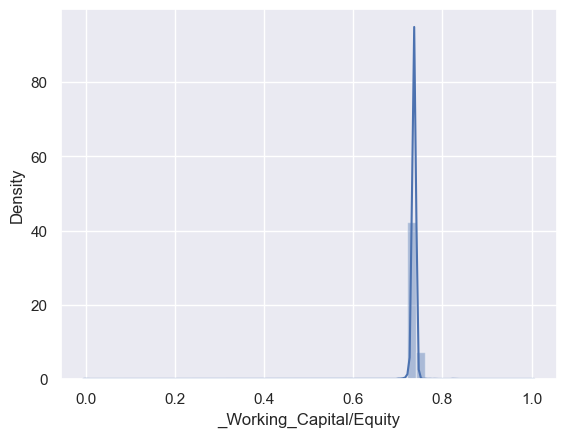

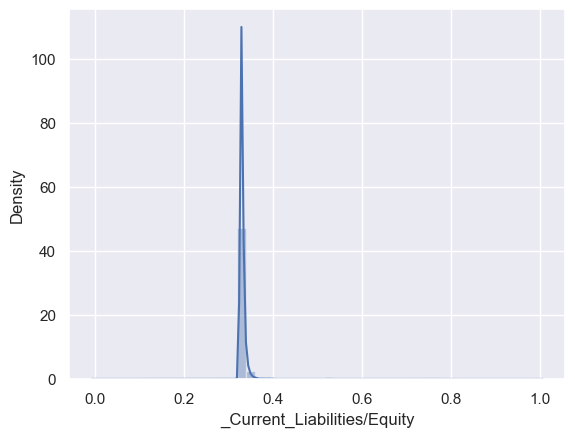

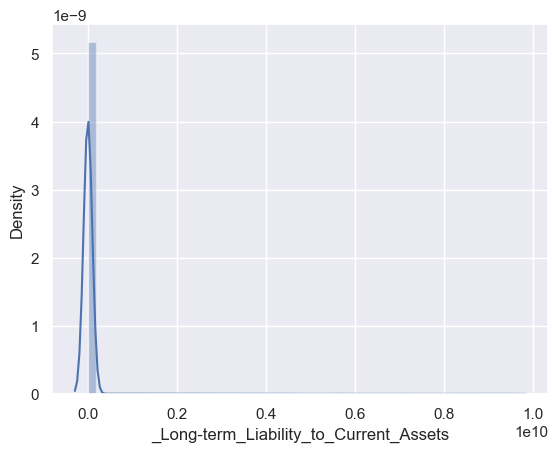

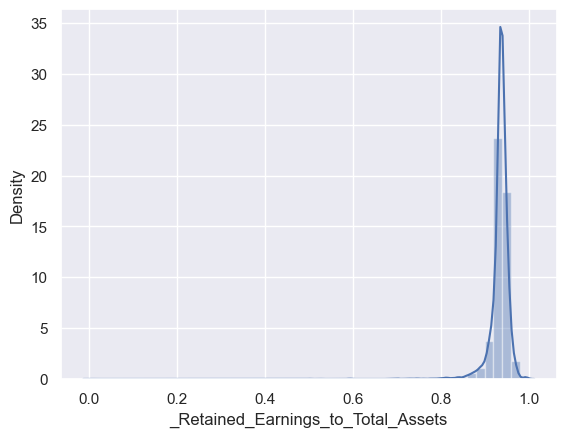

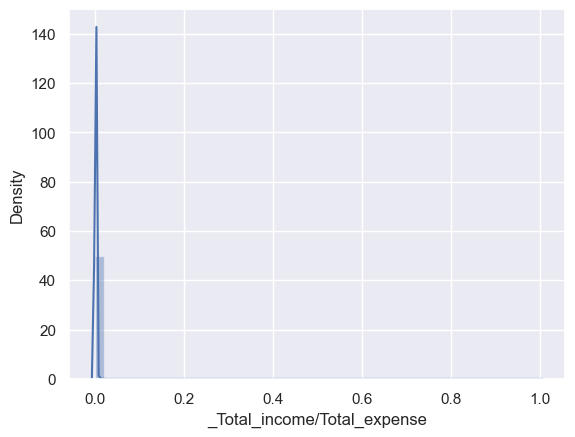

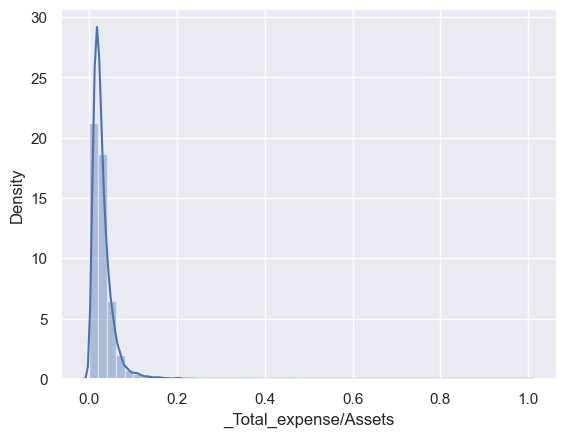

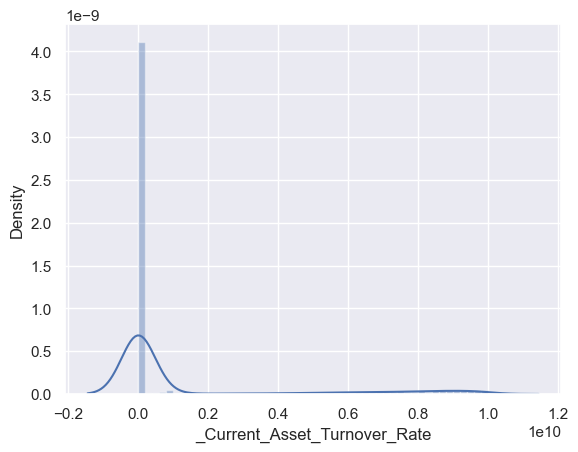

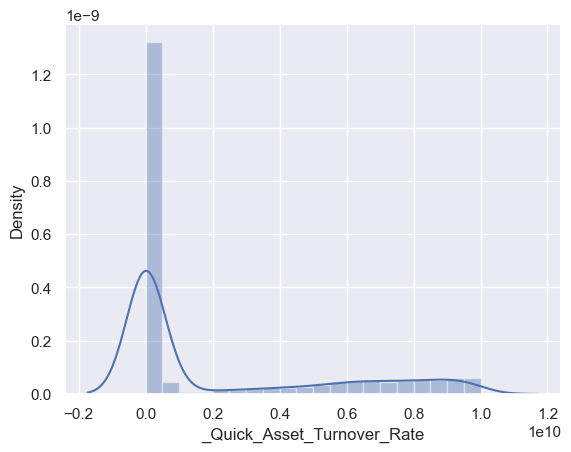

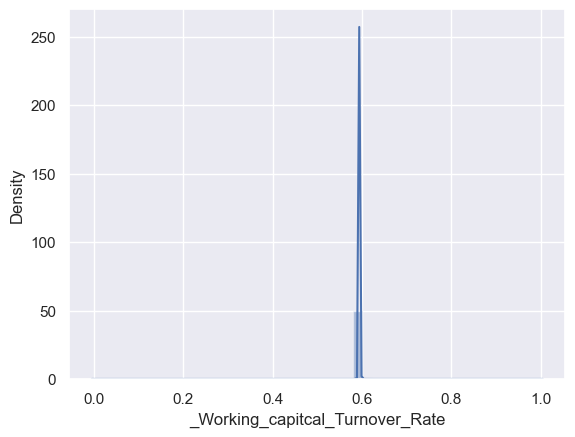

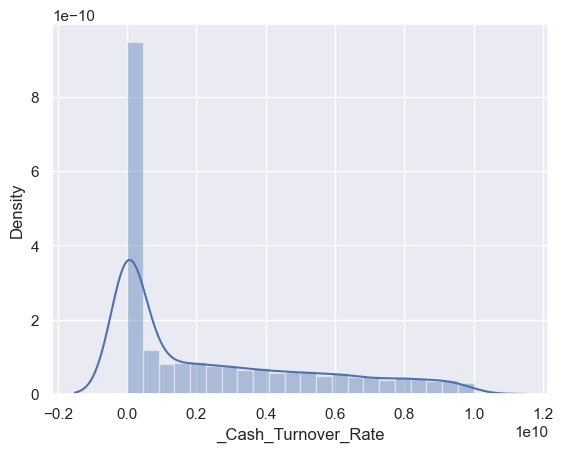

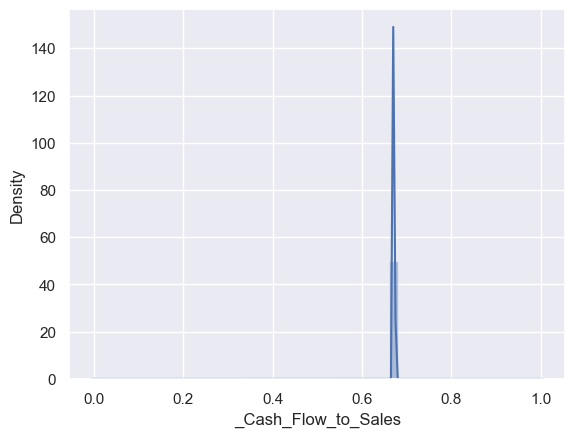

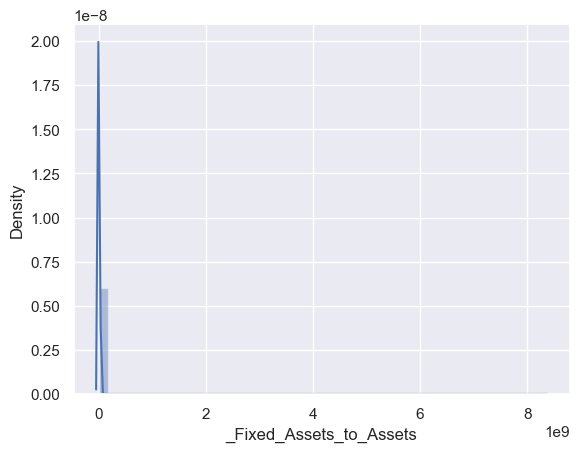

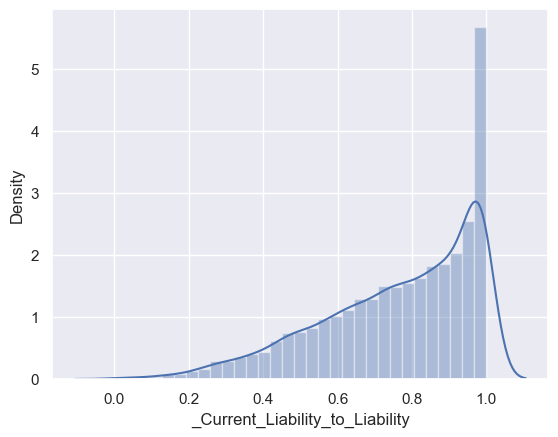

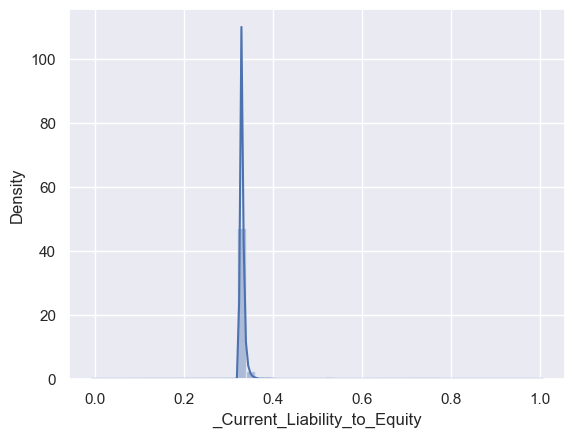

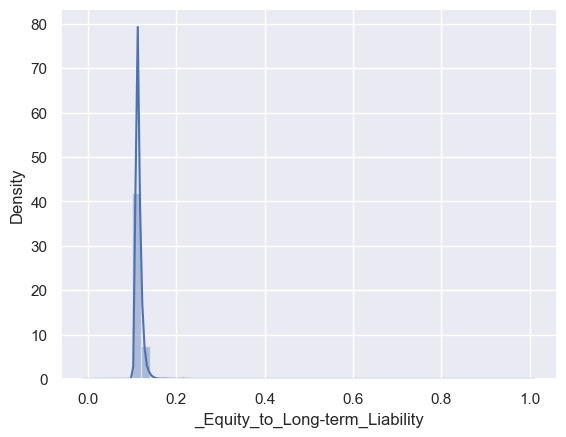

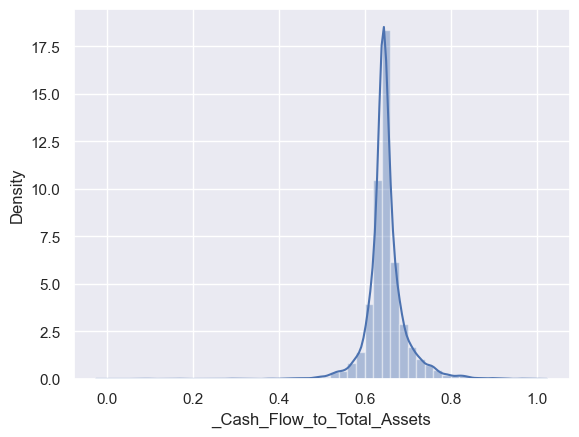

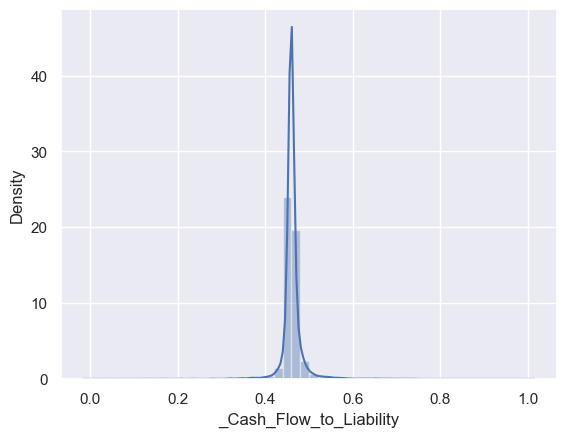

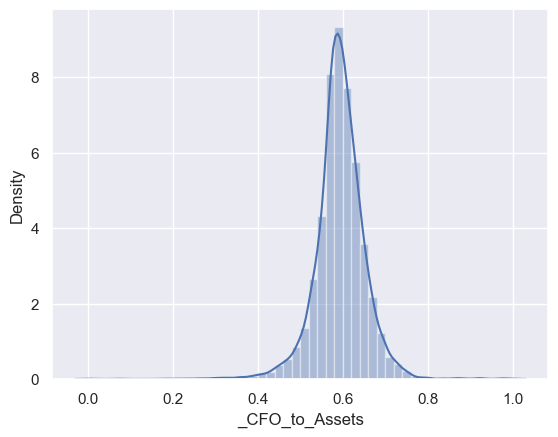

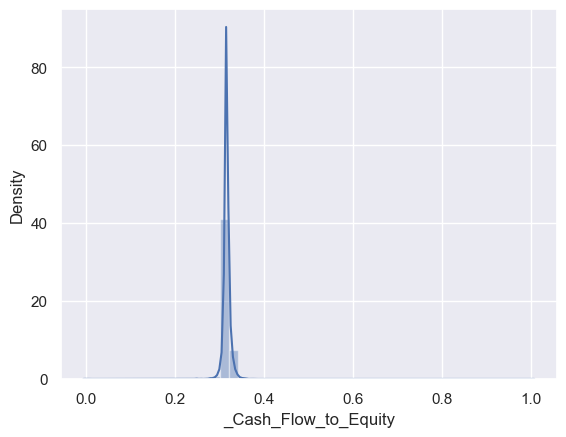

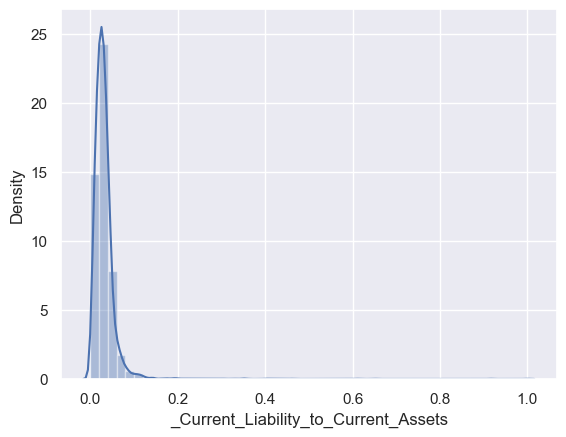

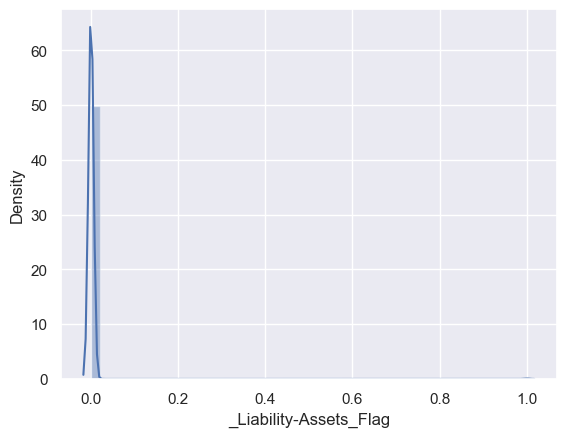

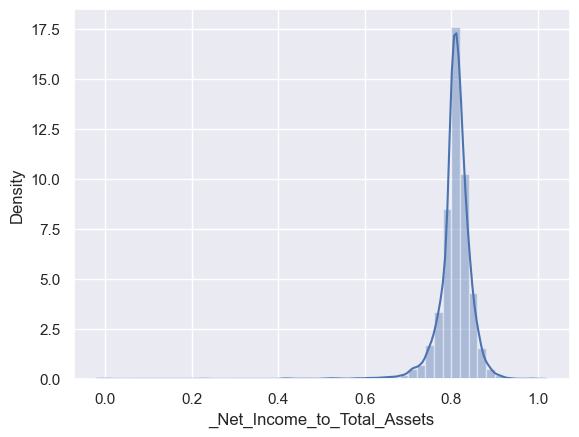

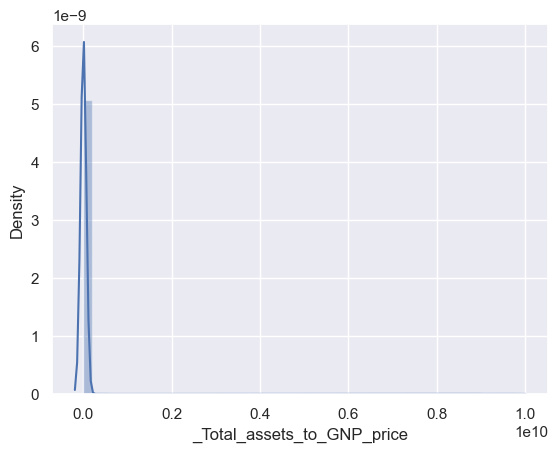

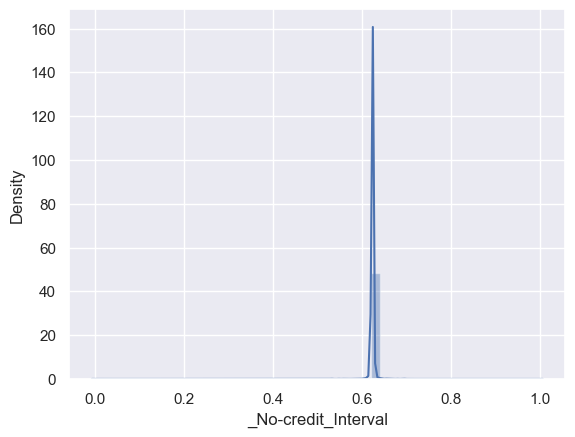

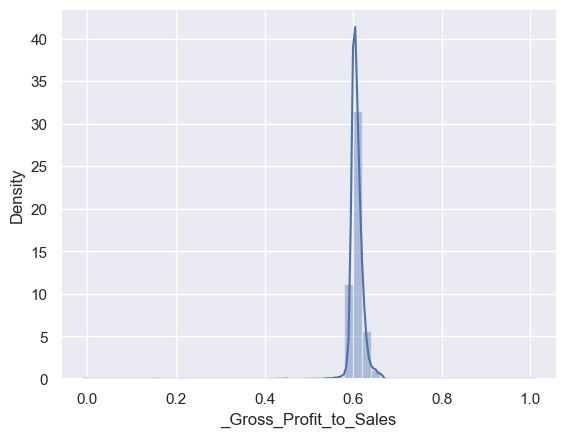

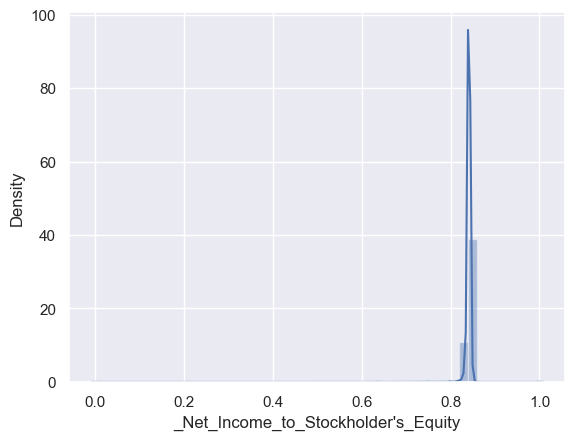

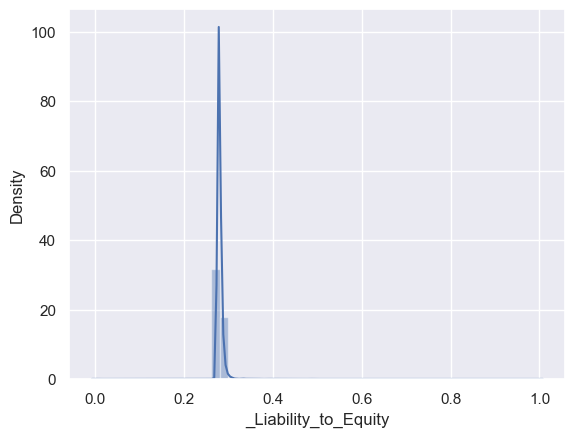

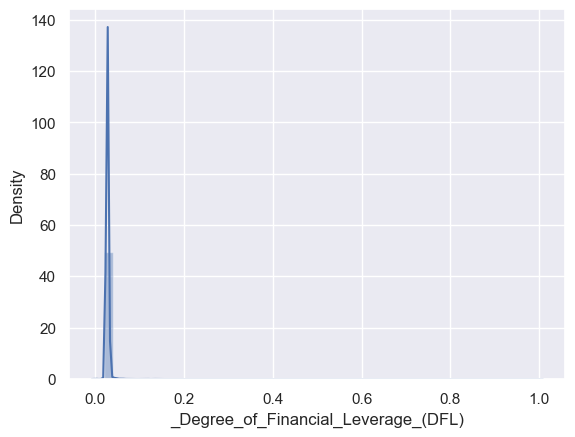

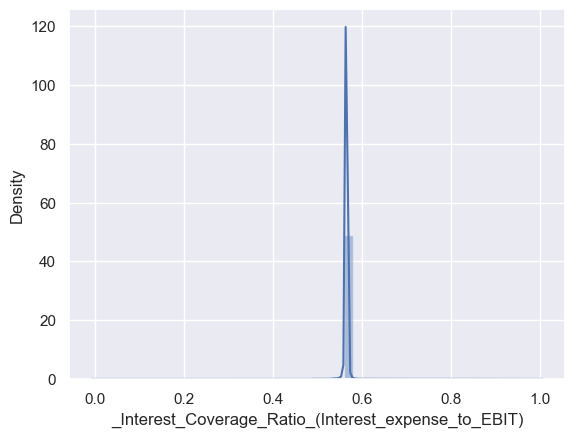

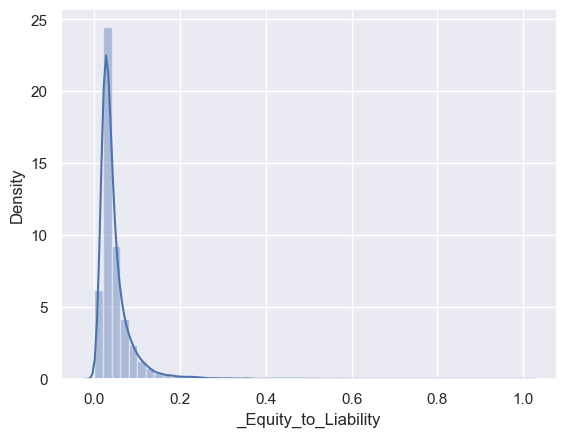

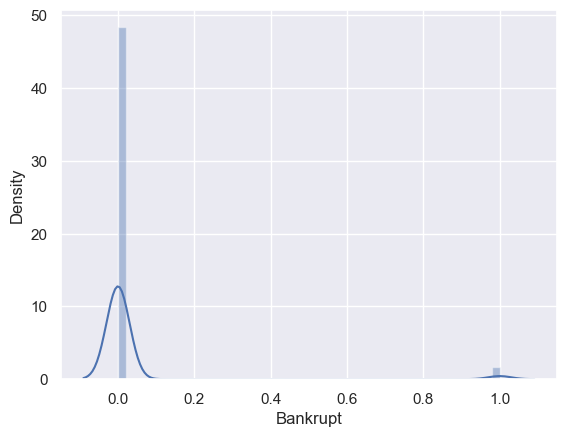

In [27]:
# Ditribution of each column in data set.
for i in bank.columns:
    sns.distplot(bank[i])
    plt.show()

In [28]:
# import dtale
# dtale.show(bank)

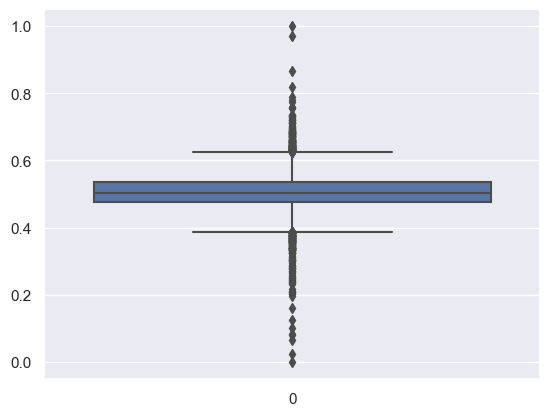

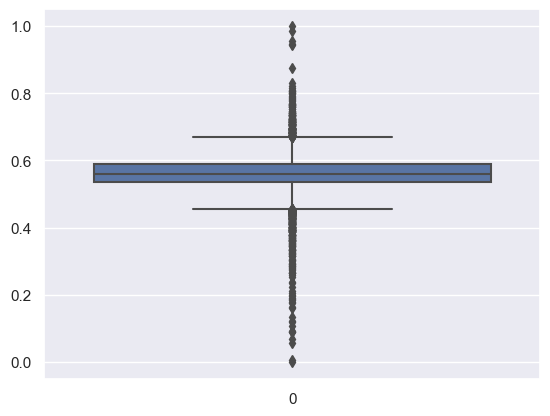

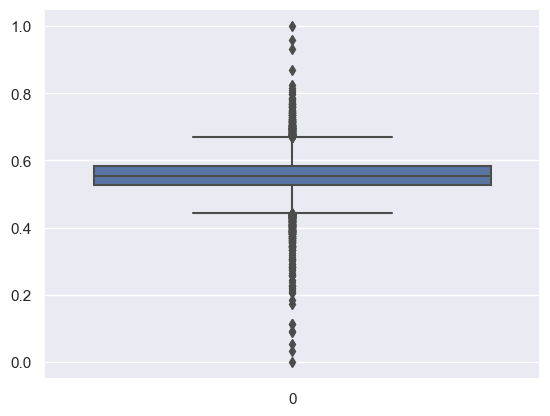

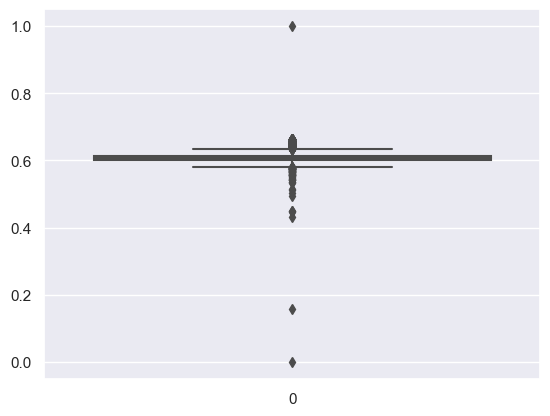

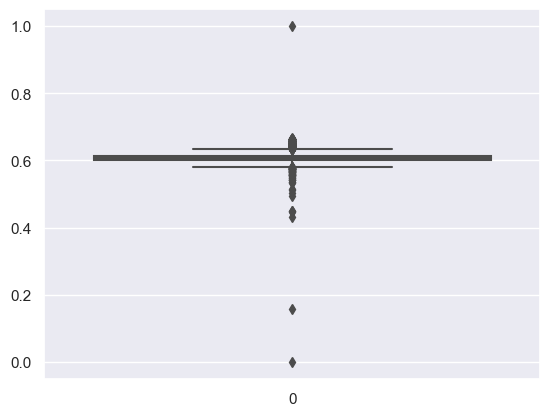

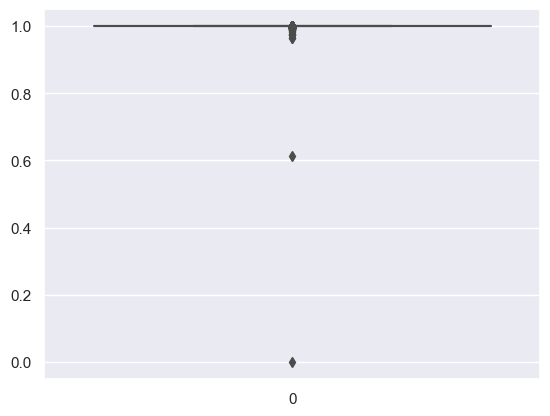

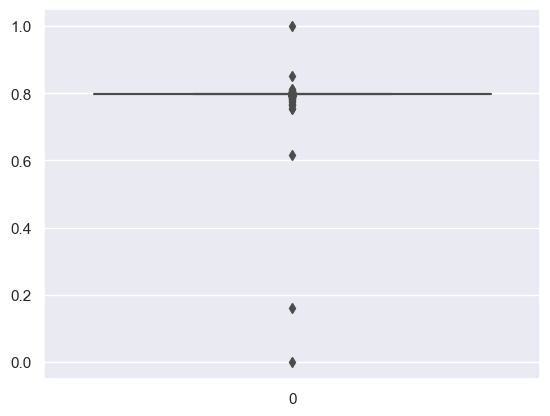

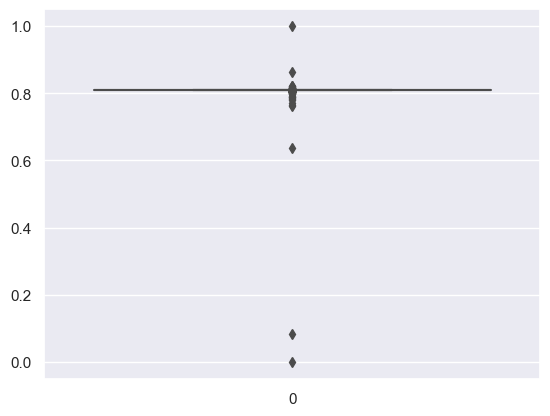

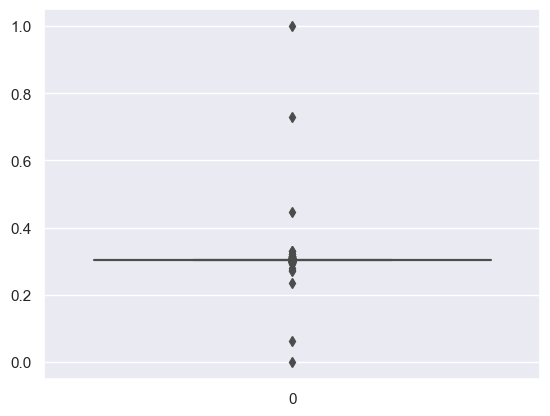

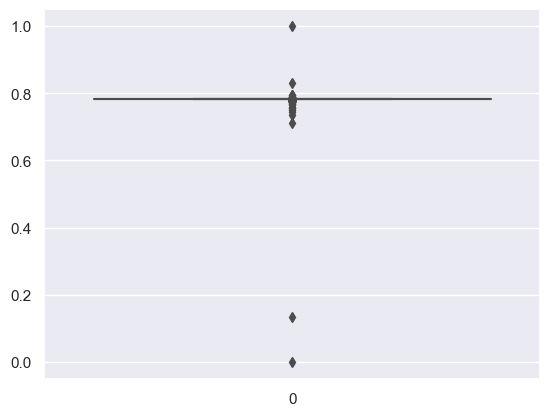

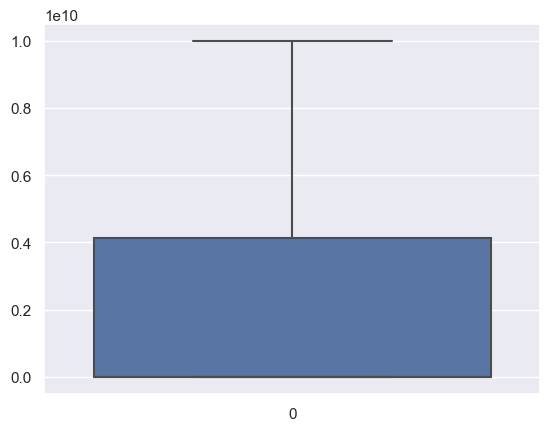

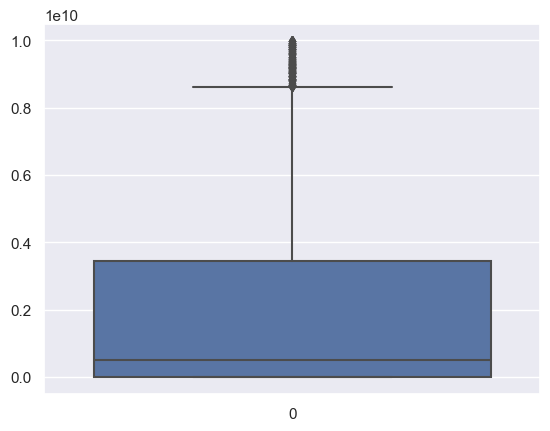

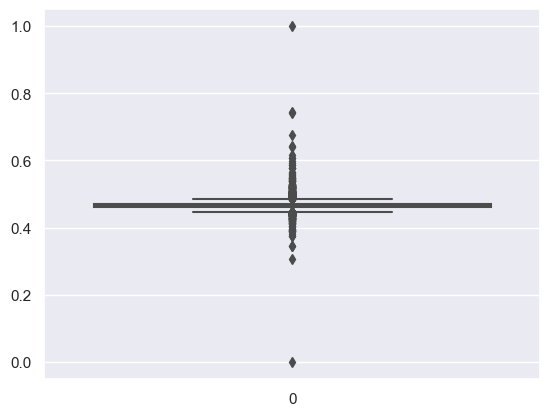

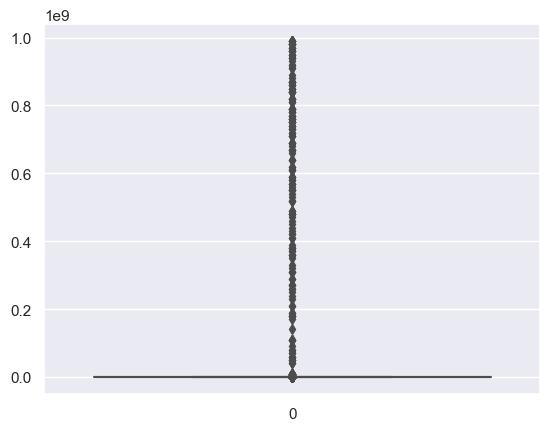

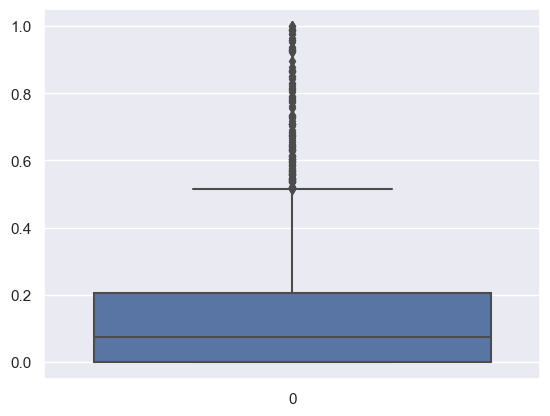

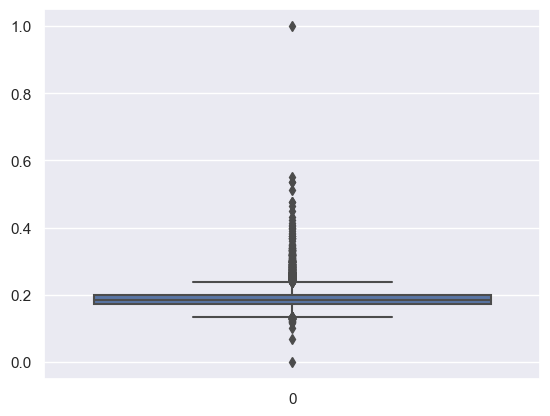

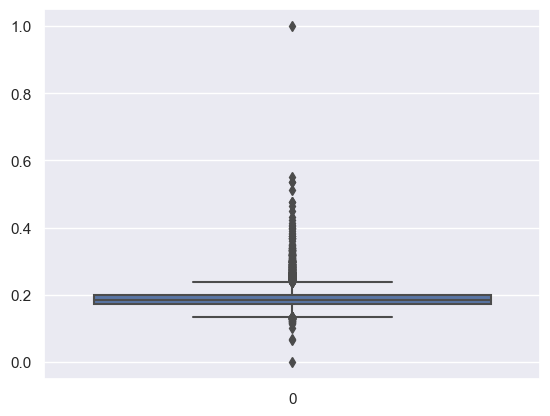

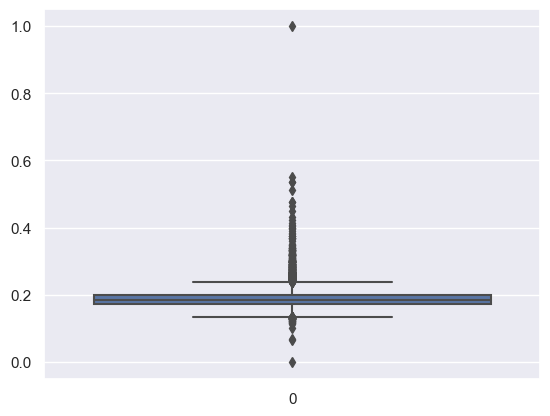

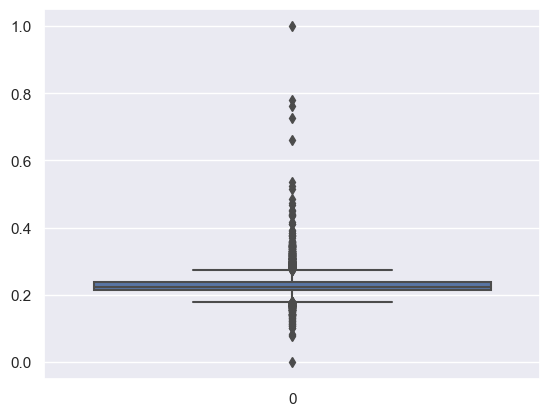

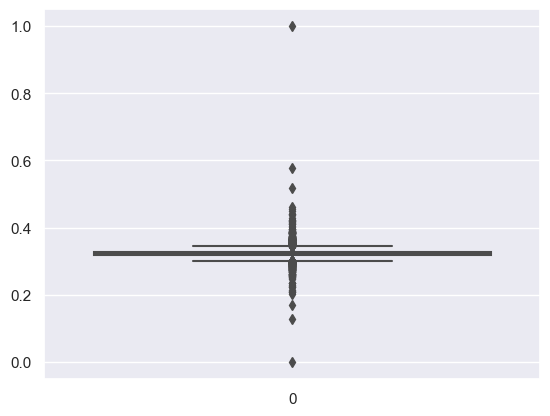

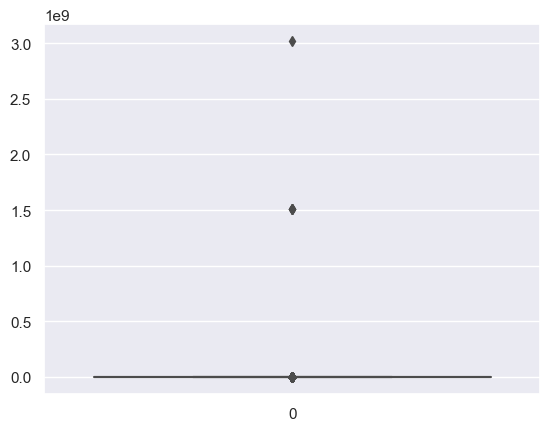

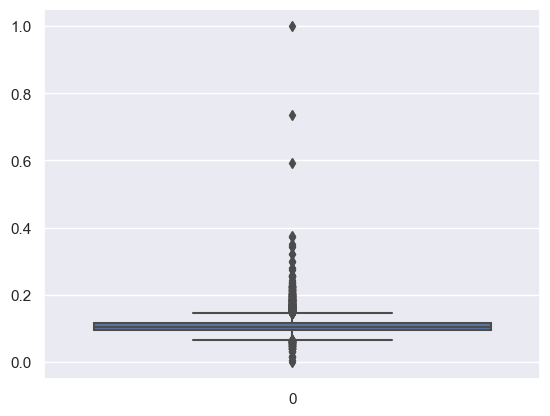

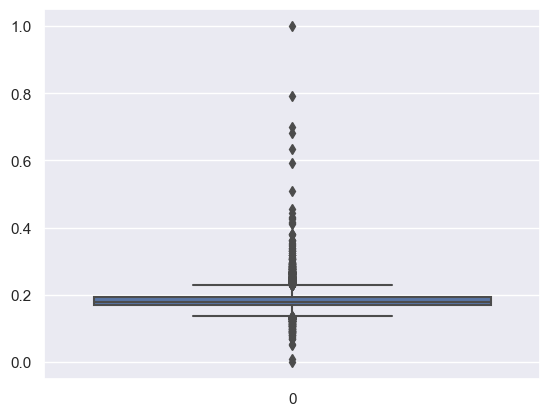

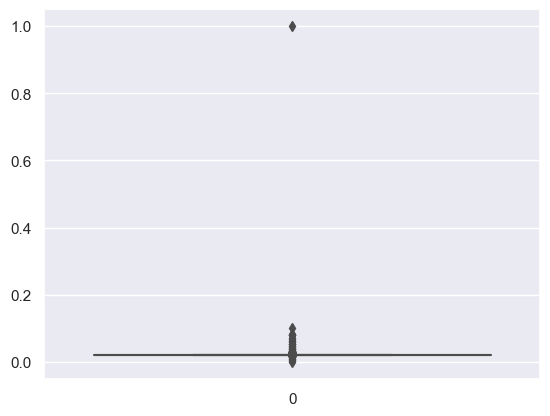

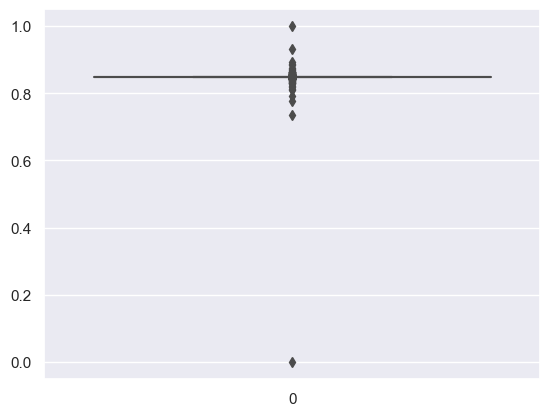

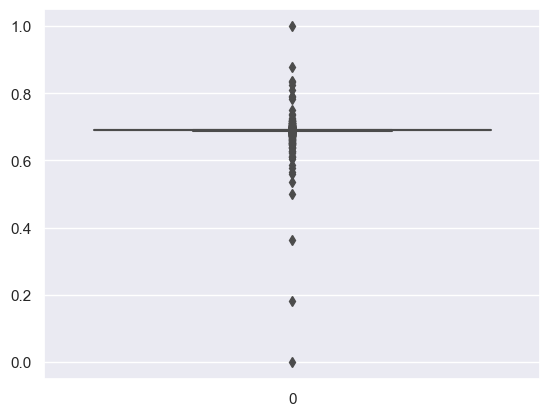

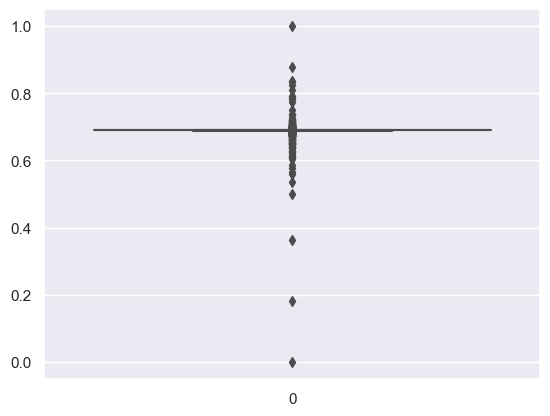

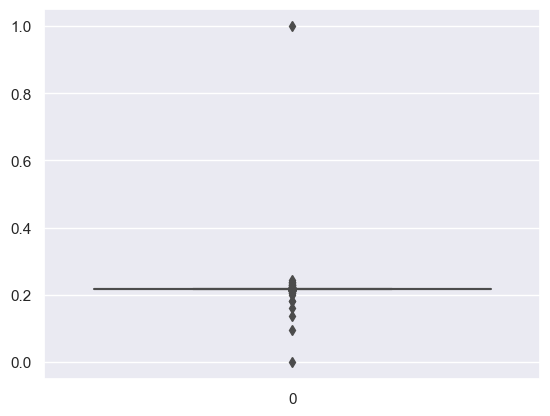

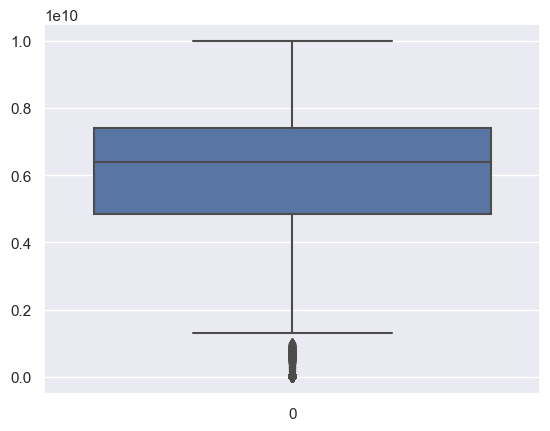

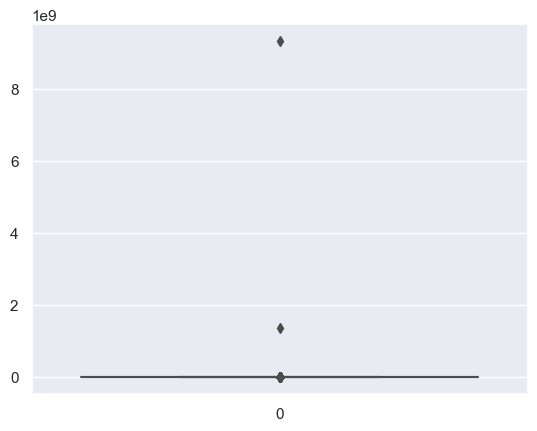

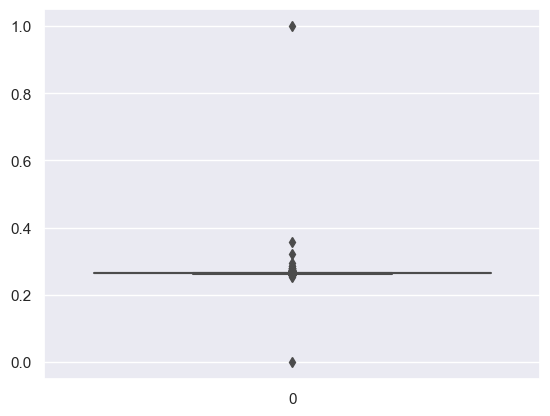

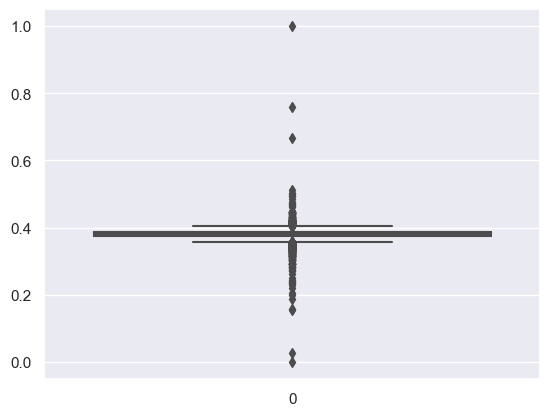

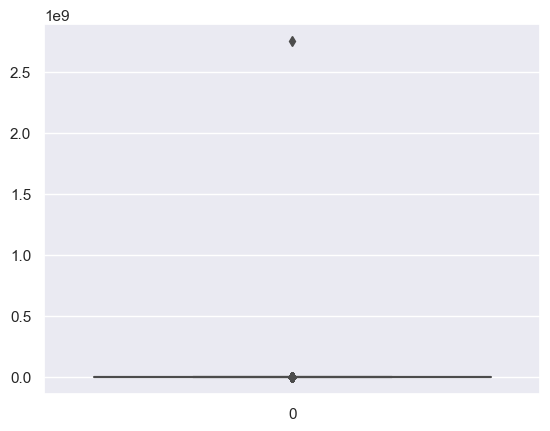

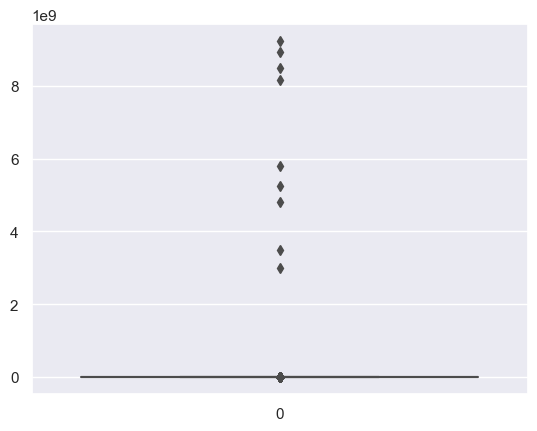

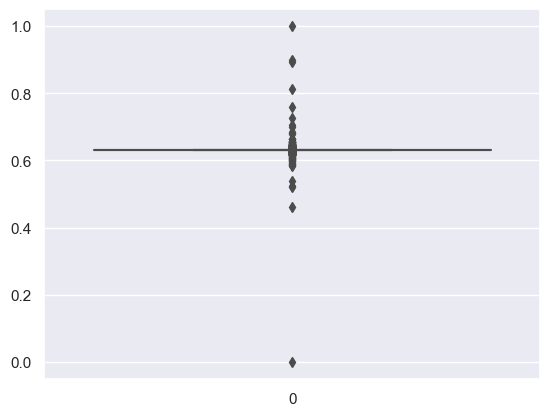

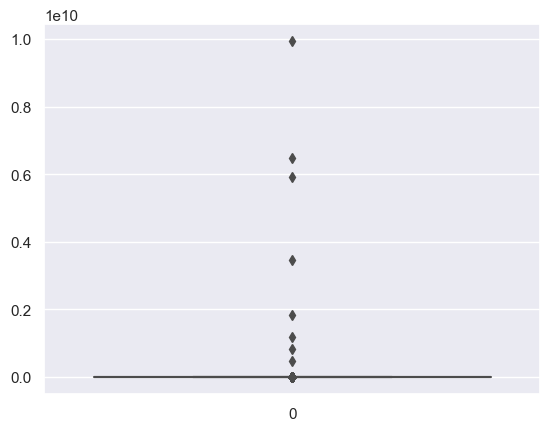

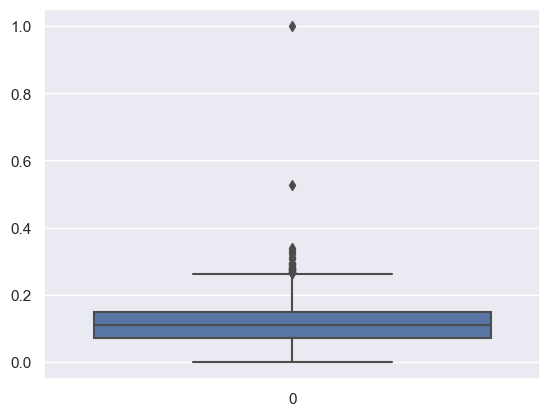

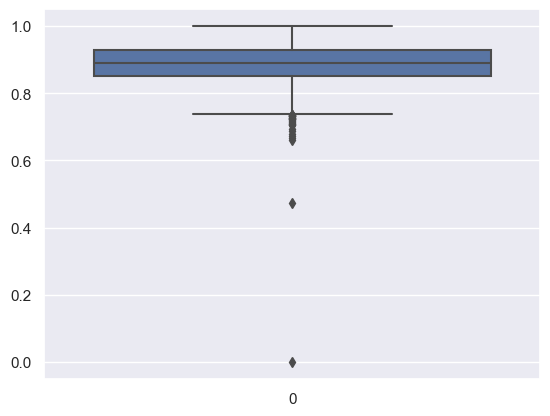

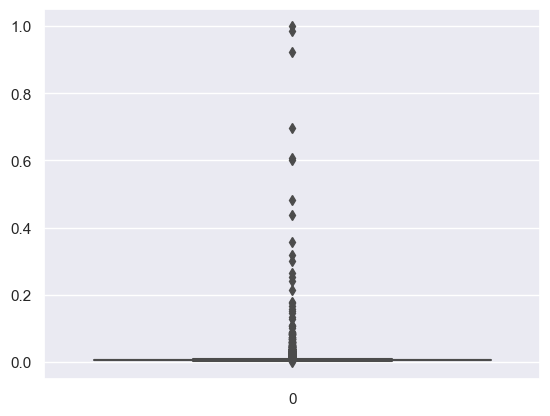

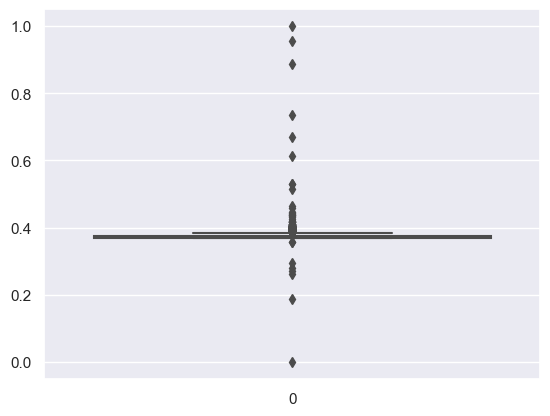

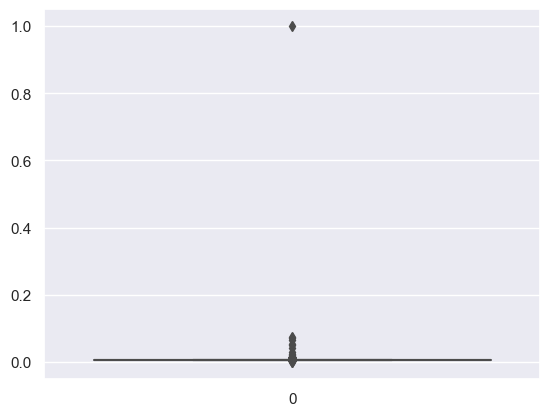

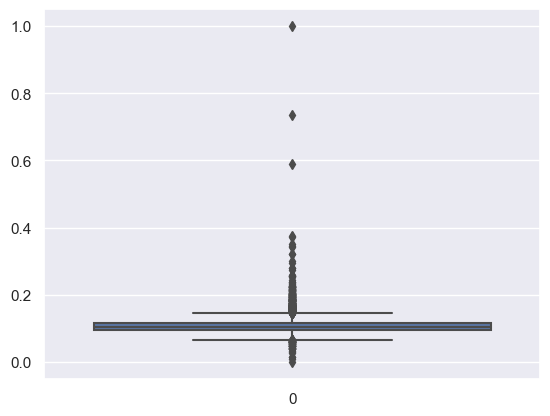

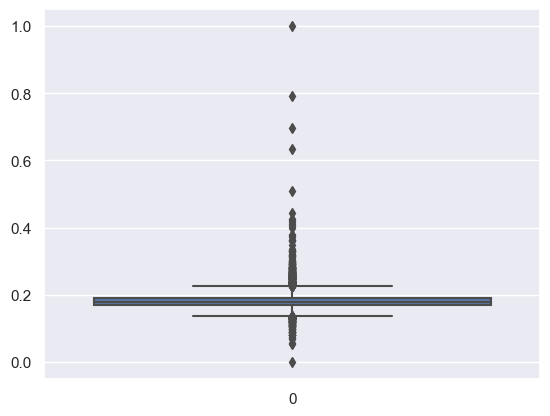

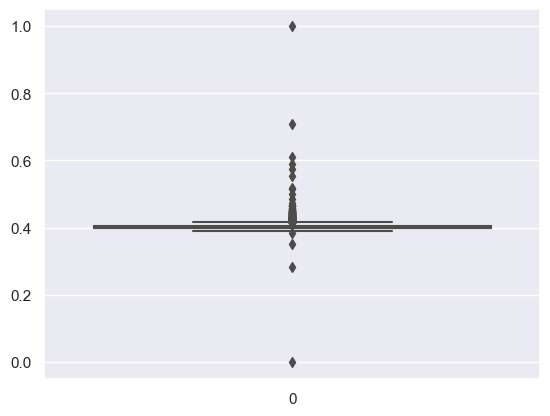

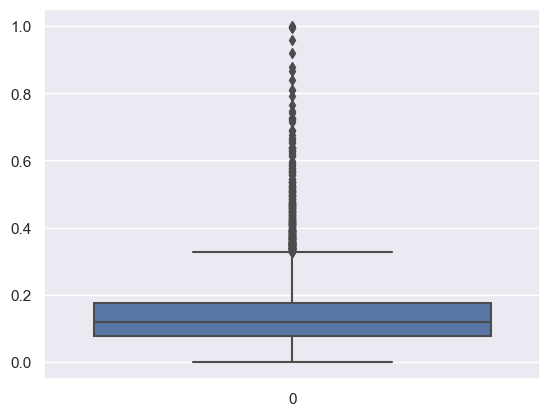

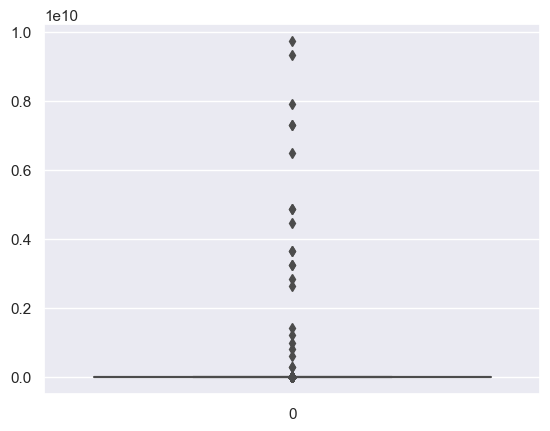

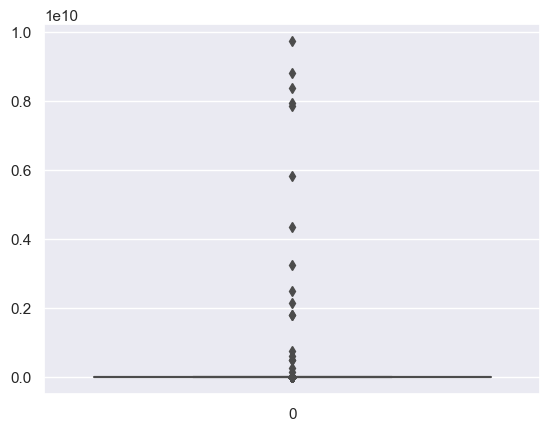

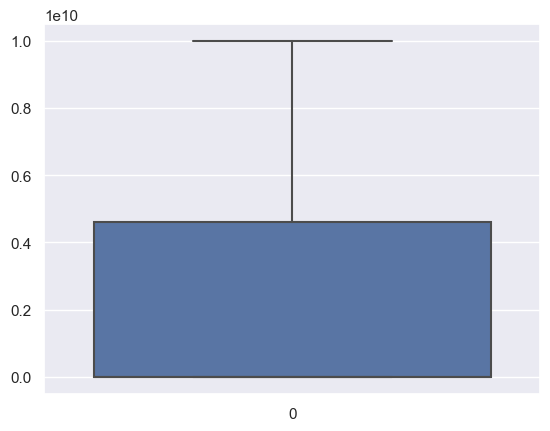

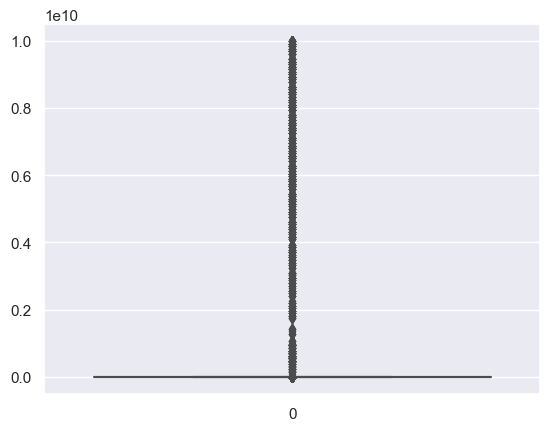

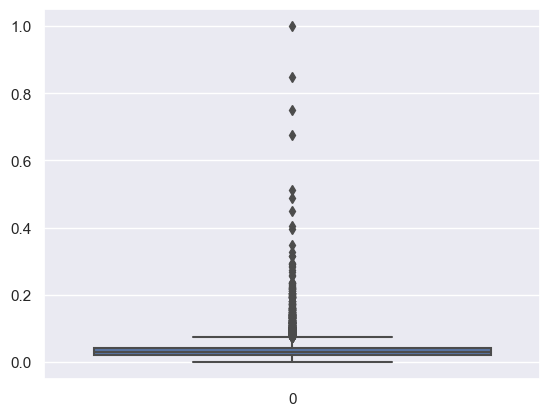

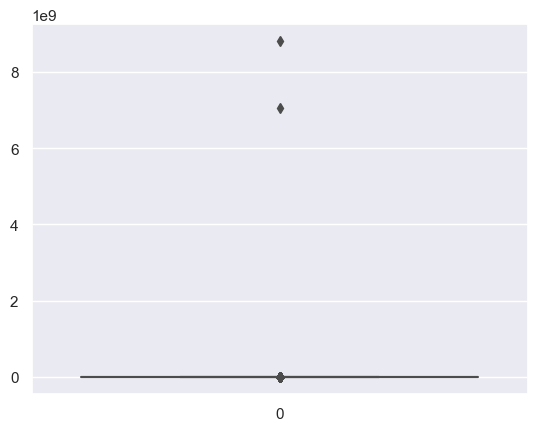

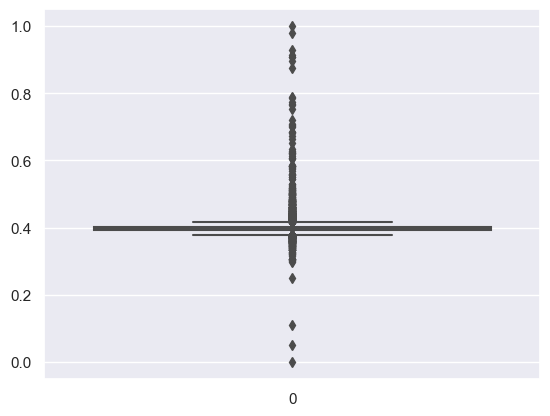

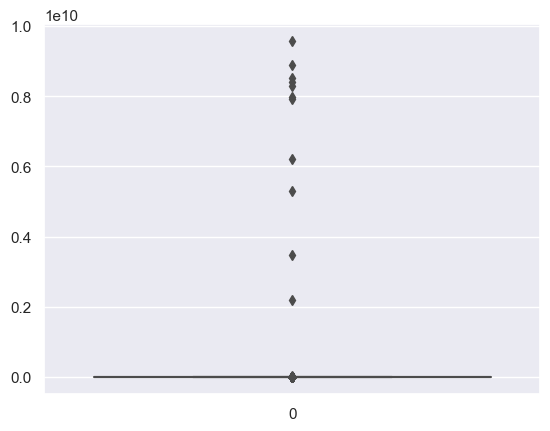

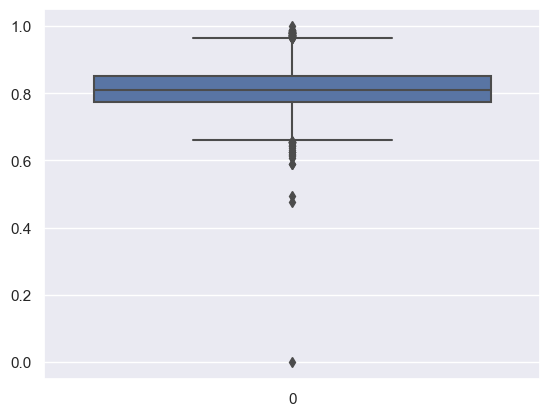

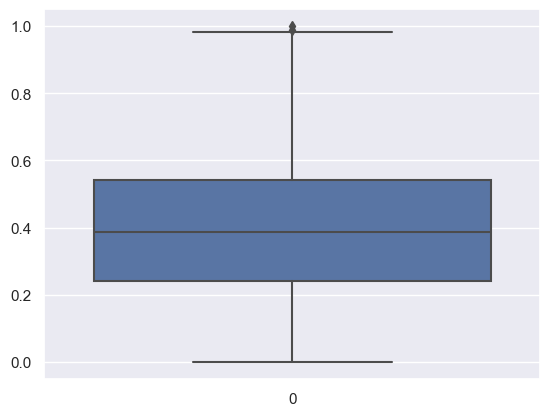

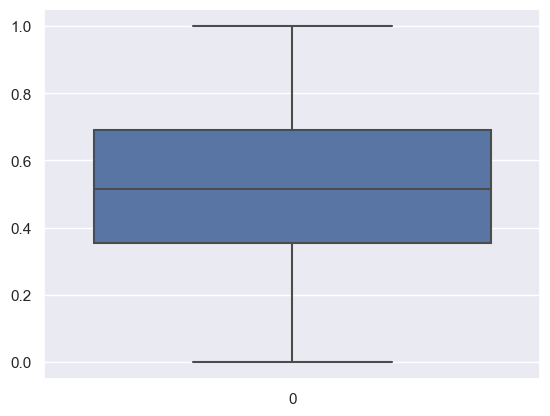

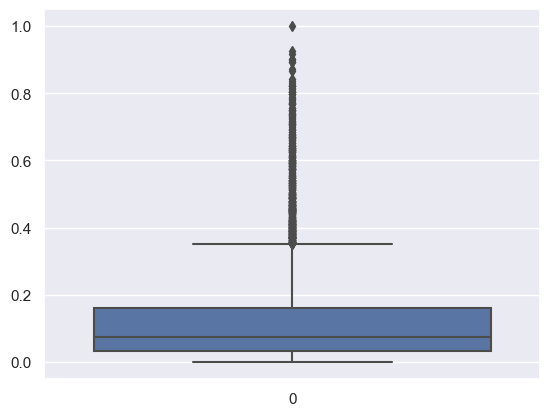

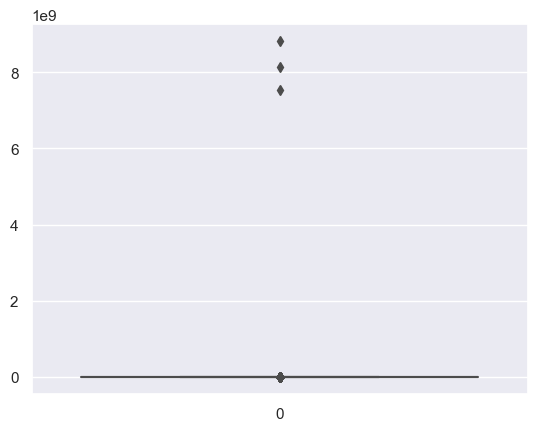

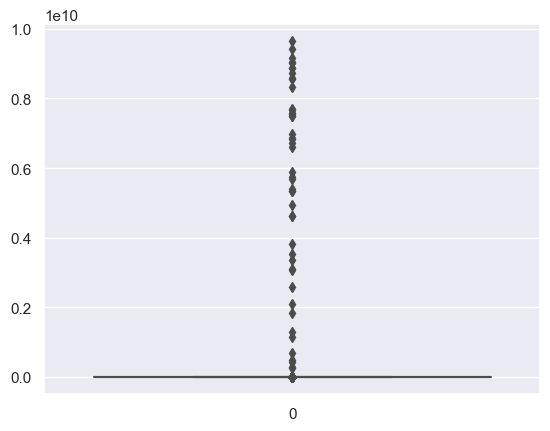

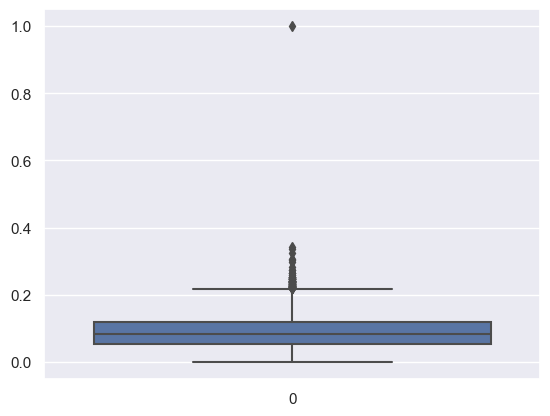

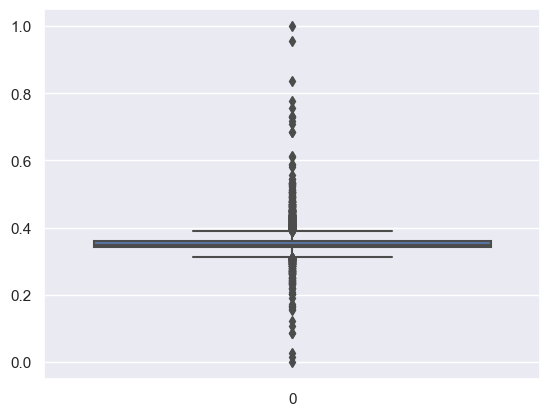

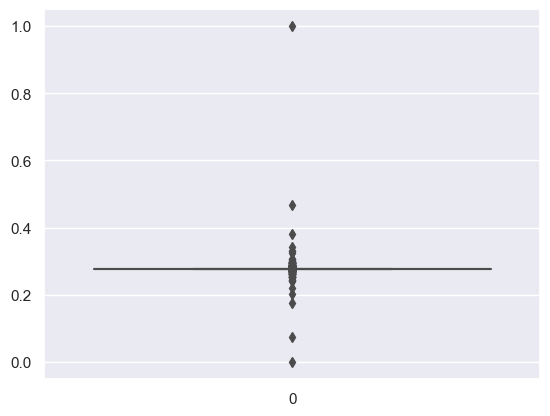

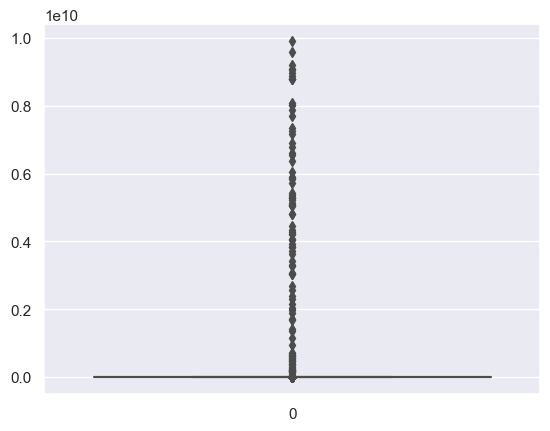

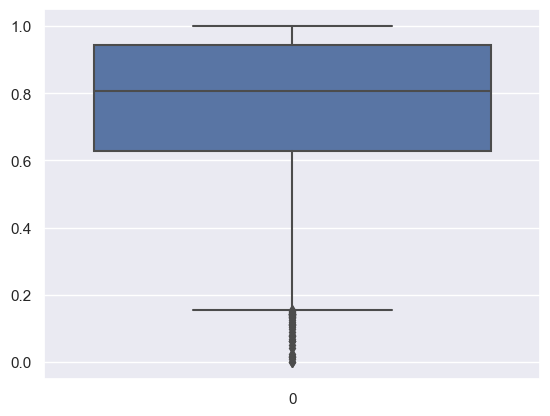

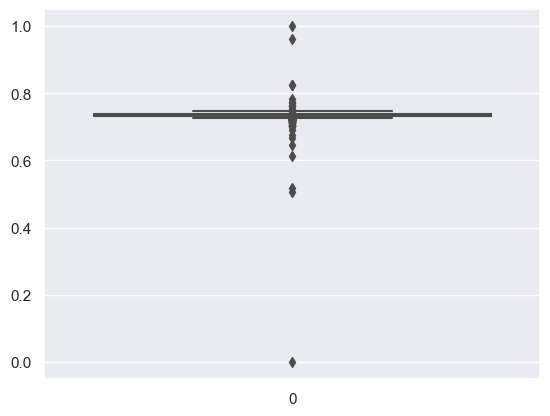

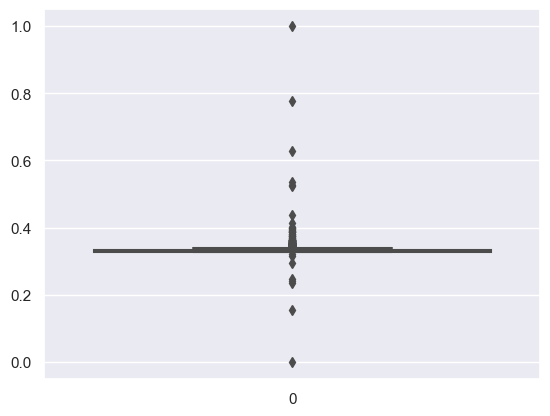

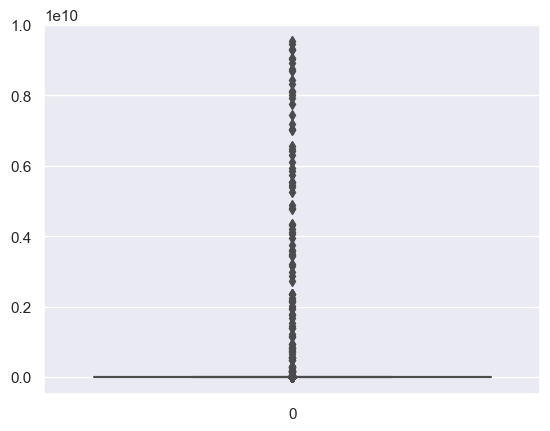

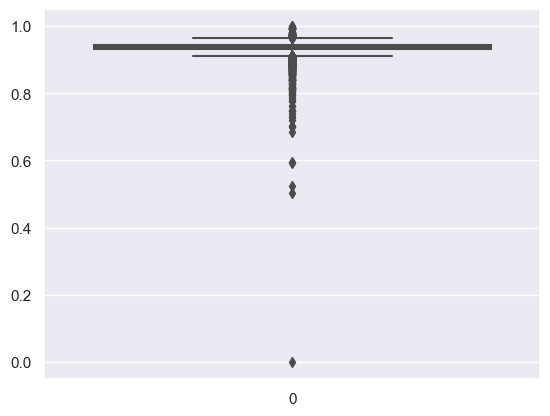

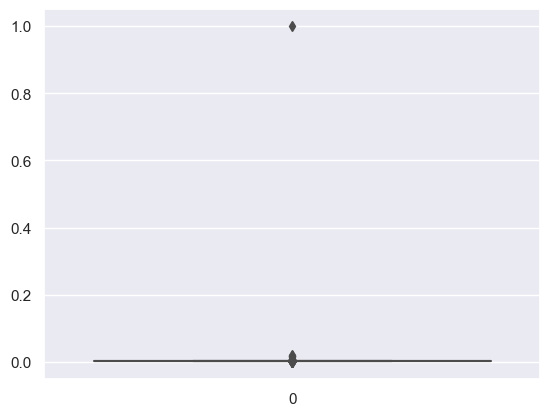

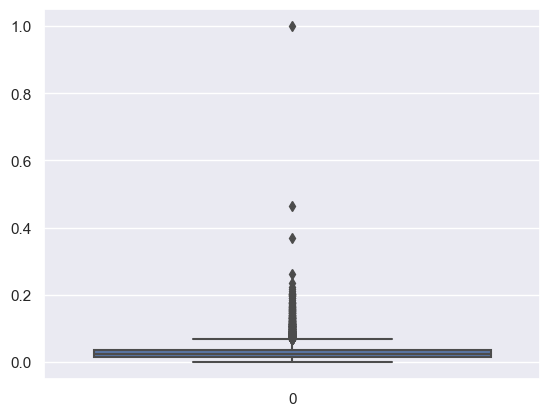

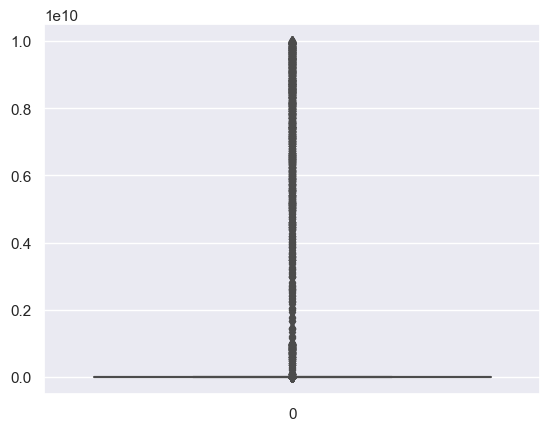

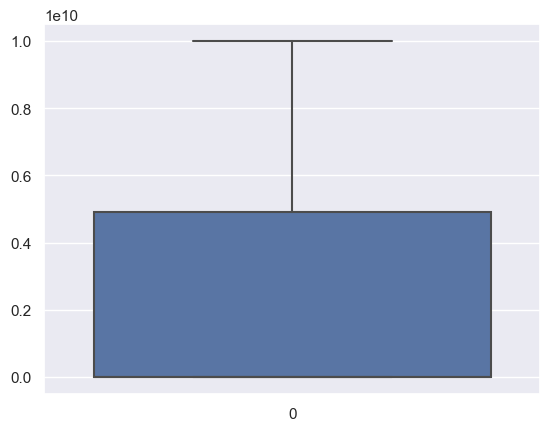

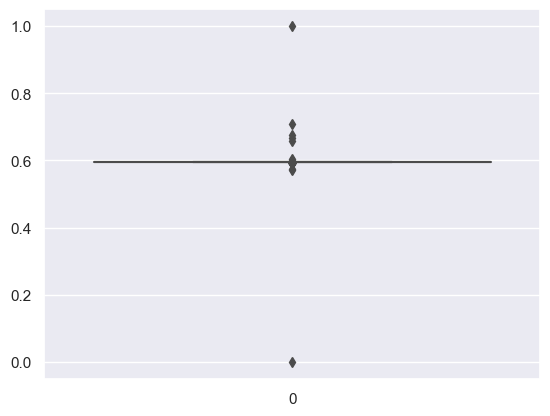

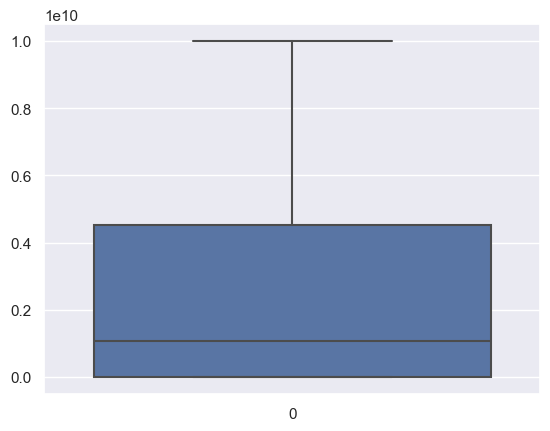

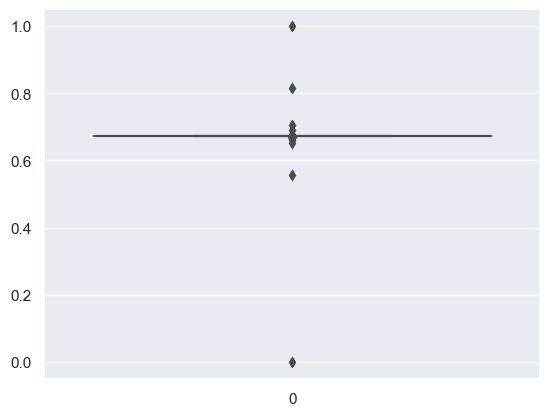

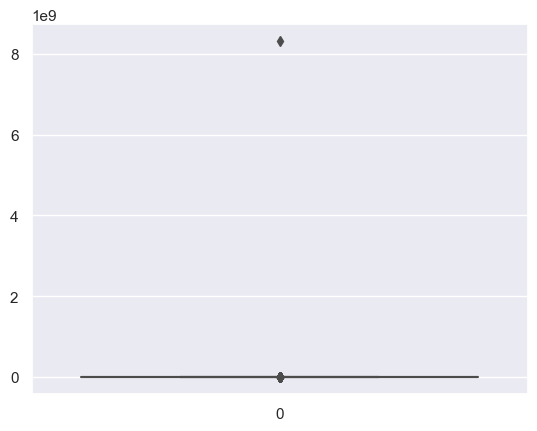

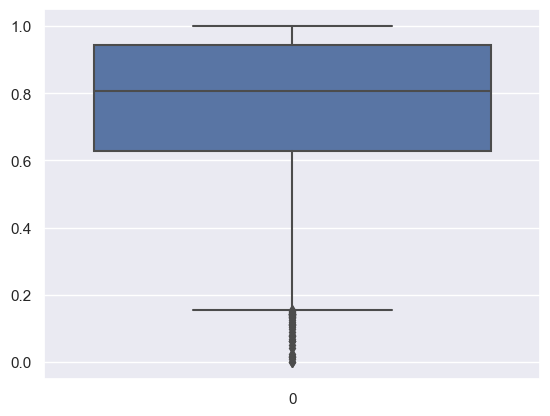

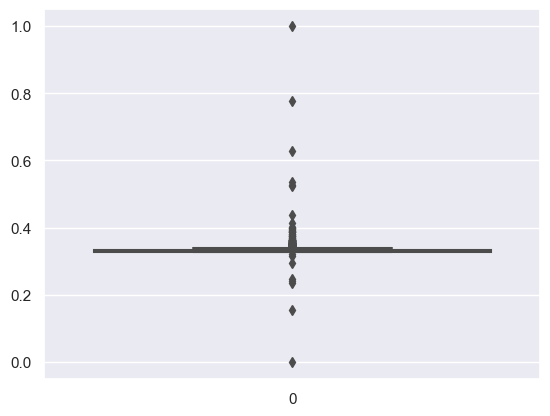

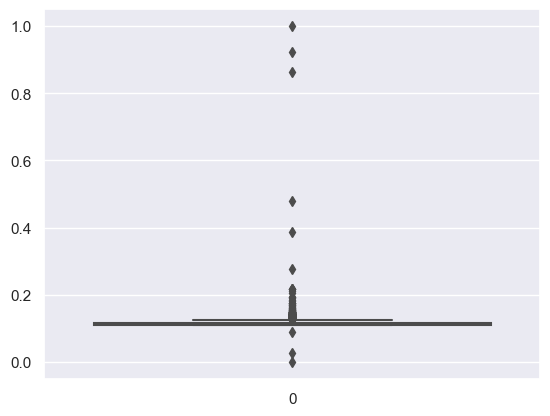

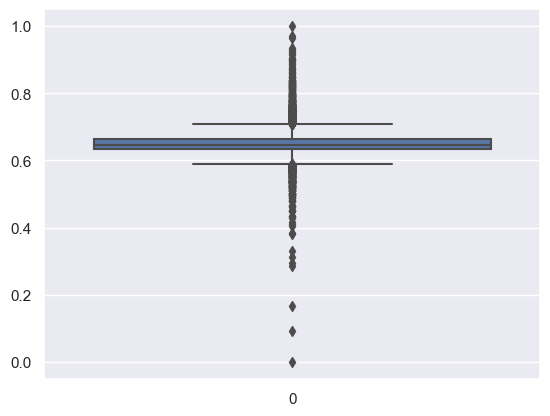

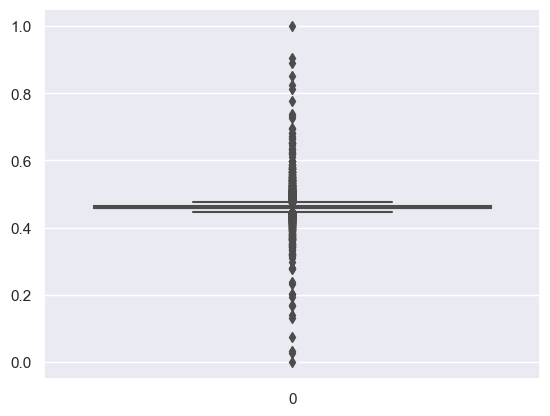

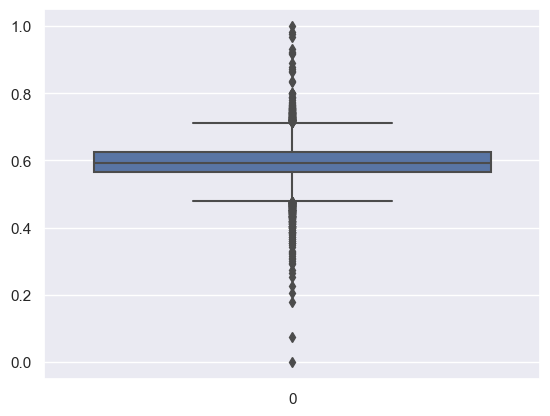

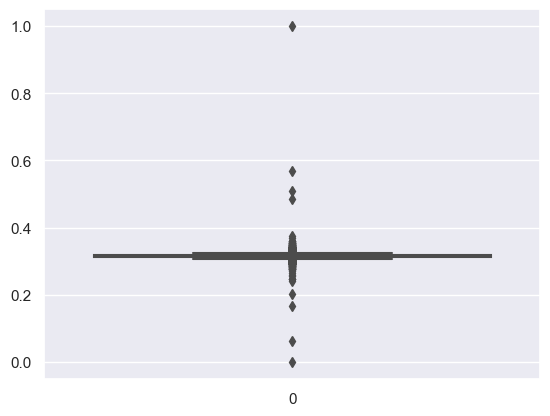

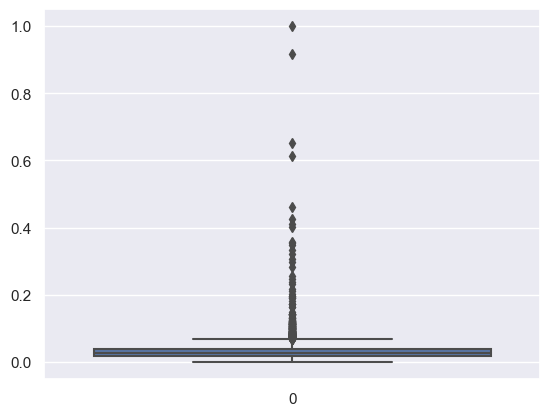

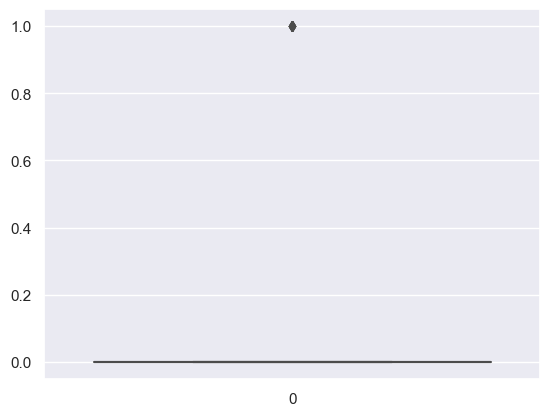

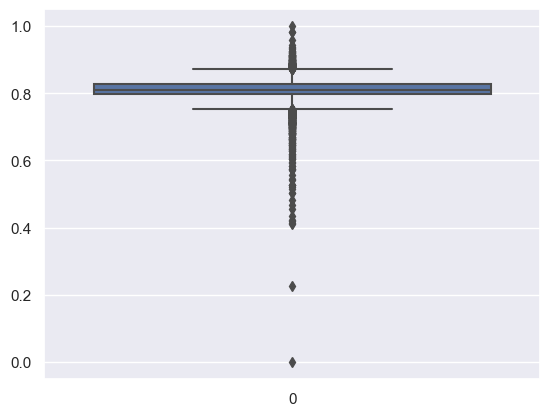

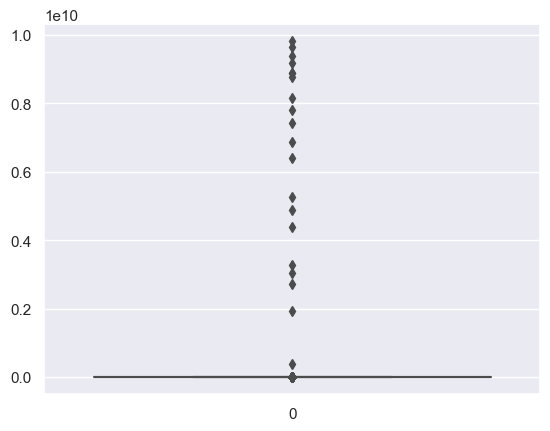

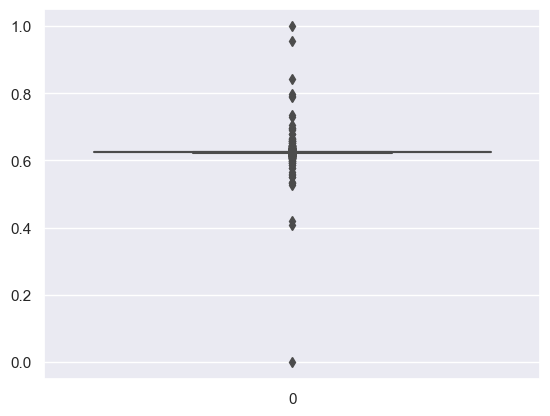

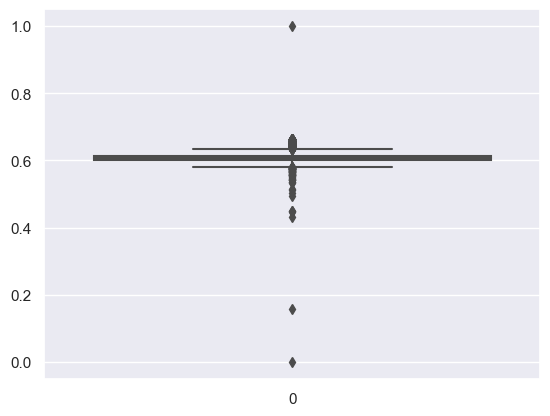

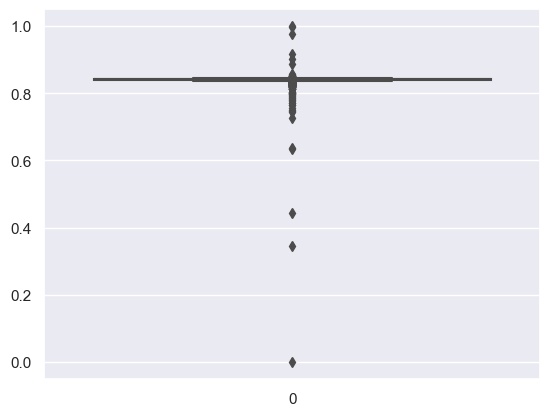

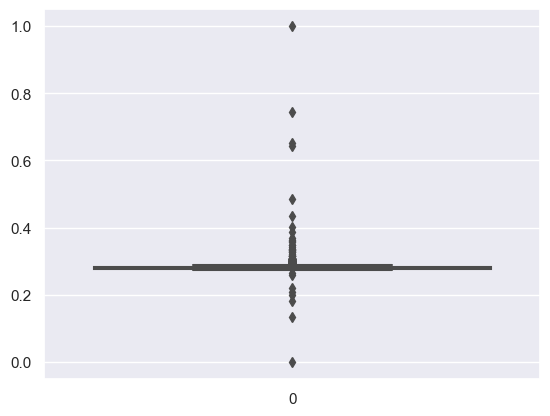

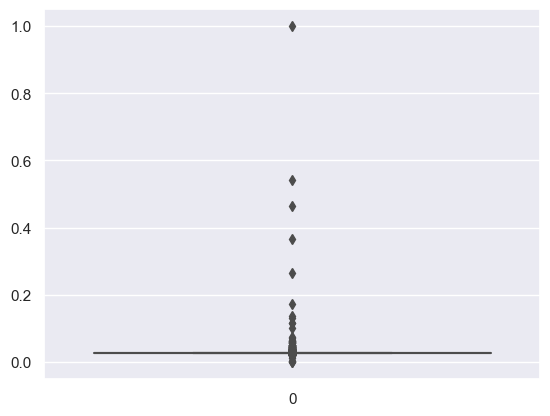

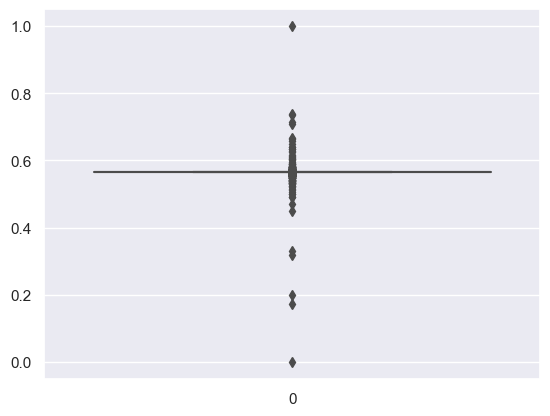

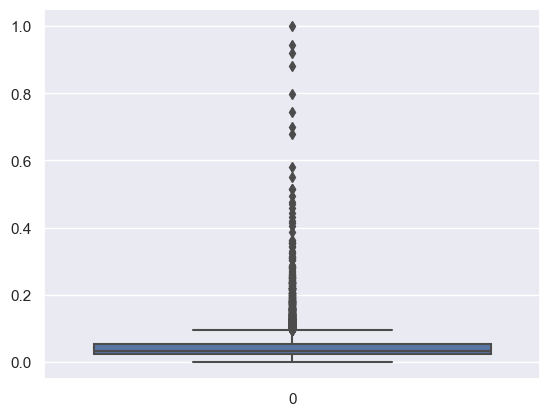

KeyError: 'Bankrupt'

In [29]:
# Boxplot for each column in data set.
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in list(bank.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [30]:
# Given data is imbalanced where 0 = not bankrupcy 1 = Bankrupcy
y.value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

#  Train and Test Split 

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

# CASE-1  --> Model Building (Without balancing the data,using Stratify Sampling)

In [33]:
model = list()
resample = list()
accuracy = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()


def test_eval(clf_model, x_test, y_test,x_train,y_train ,algo=None, sampling=None):
    

    y_pred = clf_model.predict(x_test)
    y_pred_train = clf_model.predict(x_train)
    
    # Train set prediction
    
    print('*'*50,'Train_set_prediction','*'*50,'\n')
    
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_train,y_pred_train))
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_train,y_pred_train),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_train,y_pred_train),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_train, y_pred_train))
    
    # Test set prediction
          
    print('*'*50,' Test_set_prediction','*'*50,'\n') 
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_test,y_pred),'\n')
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_pred),'\n')
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred,average='macro'))
    recall.append(recall_score(y_test,y_pred,average='macro'))
    F1score.append(f1_score(y_test,y_pred,average='macro'))
    AUCROC.append(roc_auc_score(y_test, y_pred,average='macro'))
    accuracy.append(accuracy_score(y_test, y_pred))
    resample.append(sampling)

### 1) KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
test_eval(knn ,x_test,y_test,x_train,y_train,algo='KNeighborsClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9756186984417965
Confusion Matrix
[[5270    9]
 [ 124   52]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5279
           1       0.85      0.30      0.44       176

    accuracy                           0.98      5455
   macro avg       0.91      0.65      0.71      5455
weighted avg       0.97      0.98      0.97      5455
 

AUC-ROC
0.6468748385541339
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9706744868035191 

Confusion Matrix
[[1316    4]
 [  36    8]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.67      0.18      0.29        44

    accuracy            

In [35]:
# Creating Cross validation function.
def cross_val(model,x_train,y_train,cv=10):
    score = cross_val_score(model,x_train,y_train,cv=10)
    print(score)
    print()
    print('Mean_score =',score.mean())
    print()
    print('Max_score =',score.max())
    return '-------------------'

In [36]:
# Cross validation
print(cross_val(knn,x_train,y_train))

[0.96520147 0.97435897 0.96886447 0.97252747 0.97252747 0.96880734
 0.9706422  0.97431193 0.96697248 0.96513761]

Mean_score = 0.9699351413112879

Max_score = 0.9743589743589743
-------------------


### 2) RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
test_eval(rfc,x_test,y_test,x_train,y_train,algo='RandomForestClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9998166819431714
Confusion Matrix
[[5279    0]
 [   1  175]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      0.99      1.00       176

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455
 

AUC-ROC
0.9971590909090908
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.969208211143695 

Confusion Matrix
[[1314    6]
 [  36    8]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.57      0.18      0.28        44

    accuracy             

In [38]:
# Cross validation
print(cross_val(rfc,x_train,y_train))

[0.96703297 0.97435897 0.96703297 0.96520147 0.97069597 0.96697248
 0.96880734 0.97614679 0.96697248 0.96330275]

Mean_score = 0.9686524179184728

Max_score = 0.9761467889908257
-------------------


### 3) DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
test_eval(dt,x_test,y_test,x_train,y_train,algo='DecisionTreeClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5279    0]
 [   0  176]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00       176

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9574780058651027 

Confusion Matrix
[[1292   28]
 [  30   14]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.33      0.32      0.33        44

    accuracy                           0.96      1364


In [40]:
# Cross validation
print(cross_val(dt,x_train,y_train))

[0.94139194 0.94688645 0.95787546 0.94871795 0.95970696 0.93577982
 0.96146789 0.95045872 0.95045872 0.94495413]

Mean_score = 0.94976980206338

Max_score = 0.9614678899082569
-------------------


### 4) XGBClassifier

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
test_eval(xgb,x_test,y_test,x_train,y_train,algo='XGBClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5279    0]
 [   0  176]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00       176

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9721407624633431 

Confusion Matrix
[[1312    8]
 [  30   14]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.64      0.32      0.42        44

    accuracy                           0.97      1364


In [42]:
# Cross validation
print(cross_val(xgb,x_train,y_train))

[0.96703297 0.96886447 0.97252747 0.96703297 0.96886447 0.96697248
 0.96880734 0.97614679 0.96880734 0.96330275]

Mean_score = 0.968835904157005

Max_score = 0.9761467889908257
-------------------


### 5) AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier()
adboost.fit(x_train,y_train)
test_eval(adboost,x_test,y_test,x_train,y_train,algo='AdaBoostClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9741521539871677
Confusion Matrix
[[5252   27]
 [ 114   62]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5279
           1       0.70      0.35      0.47       176

    accuracy                           0.97      5455
   macro avg       0.84      0.67      0.73      5455
weighted avg       0.97      0.97      0.97      5455
 

AUC-ROC
0.6735790611169471
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9618768328445748 

Confusion Matrix
[[1306   14]
 [  38    6]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.30      0.14      0.19        44

    accuracy            

In [44]:
# Cross validation
print(cross_val(adboost,x_train,y_train))

[0.95970696 0.97252747 0.97252747 0.96153846 0.96153846 0.96146789
 0.9706422  0.96880734 0.96146789 0.95963303]

Mean_score = 0.964985717646268

Max_score = 0.9725274725274725
-------------------


### 6) logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
test_eval(lr,x_test,y_test,x_train,y_train,algo='LogisticRegression')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9728689275893676
Confusion Matrix
[[5258   21]
 [ 127   49]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5279
           1       0.70      0.28      0.40       176

    accuracy                           0.97      5455
   macro avg       0.84      0.64      0.69      5455
weighted avg       0.97      0.97      0.97      5455
 

AUC-ROC
0.6372155323838882
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9626099706744868 

Confusion Matrix
[[1307   13]
 [  38    6]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.32      0.14      0.19        44

    accuracy            

In [46]:
# Cross validation
print(cross_val(lr,x_train,y_train))

[0.96703297 0.97069597 0.96703297 0.96520147 0.96520147 0.96513761
 0.96697248 0.97431193 0.96513761 0.96330275]

Mean_score = 0.9670027220485935

Max_score = 0.9743119266055046
-------------------


### 7) Support Vector machine classifier

In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
test_eval(svc,x_test,y_test,x_train,y_train,algo='Support vector classifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9730522456461962
Confusion Matrix
[[5279    0]
 [ 147   29]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5279
           1       1.00      0.16      0.28       176

    accuracy                           0.97      5455
   macro avg       0.99      0.58      0.63      5455
weighted avg       0.97      0.97      0.96      5455
 

AUC-ROC
0.5823863636363636
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.967741935483871 

Confusion Matrix
[[1320    0]
 [  44    0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy             

In [48]:
# Cross validation
print(cross_val(svc,x_train,y_train))

[0.96703297 0.96703297 0.96520147 0.96886447 0.96886447 0.9706422
 0.9706422  0.96880734 0.9706422  0.96513761]

Mean_score = 0.9682867896629365

Max_score = 0.9706422018348624
-------------------


### 8) Voting Classifier

In [49]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('knn',knn),('rf',rfc),('dt',dt),('xgb',xgb),('aboost',adboost),('lr',lr),('svc',svc)], voting='hard')
vote.fit(x_train,y_train)
test_eval(vote,x_test,y_test,x_train,y_train,algo='Voting classifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.984051329055912
Confusion Matrix
[[5279    0]
 [  87   89]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5279
           1       1.00      0.51      0.67       176

    accuracy                           0.98      5455
   macro avg       0.99      0.75      0.83      5455
weighted avg       0.98      0.98      0.98      5455
 

AUC-ROC
0.7528409090909092
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.967741935483871 

Confusion Matrix
[[1314    6]
 [  38    6]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.50      0.14      0.21        44

    accuracy              

In [50]:
# Cross validation
print(cross_val(vote,x_train,y_train))

[0.97069597 0.97252747 0.96703297 0.97069597 0.97252747 0.96880734
 0.97247706 0.9706422  0.97431193 0.96330275]

Mean_score = 0.9703021137883523

Max_score = 0.9743119266055046
-------------------


# Model Comparision

In [51]:
model_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'accuracy':accuracy,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
model_eval_df

model resample  accuracy  precision    recall  \
0       KNeighborsClassifier     None  0.970674   0.820020  0.589394   
1     RandomForestClassifier     None  0.969208   0.772381  0.588636   
2     DecisionTreeClassifier     None  0.957478   0.655320  0.648485   
3              XGBClassifier     None  0.972141   0.807004  0.656061   
4         AdaBoostClassifier     None  0.961877   0.635863  0.562879   
5         LogisticRegression     None  0.962610   0.643768  0.563258   
6  Support vector classifier     None  0.967742   0.483871  0.500000   
7          Voting classifier     None  0.967742   0.735947  0.565909   

   f1-score   AUC-ROC  
0  0.635372  0.589394  
1  0.630066  0.588636  
2  0.651814  0.648485  
3  0.704984  0.656061  
4  0.583990  0.562879  
5  0.585670  0.563258  
6  0.491803  0.500000  
7  0.598909  0.565909

#  CASE-2  --> Balancing the data using SMOTE Method

In [52]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before Sampling',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)

x_sm_train, y_sm_train = smt.fit_resample(x_train, y_train)
counter = Counter(y_sm_train)
print('After Sampling',counter)

Before Sampling Counter({0: 5279, 1: 176})
After Sampling Counter({0: 5279, 1: 5279})


In [53]:
model_s = list()
resample_s = list()
accuracy_s = list()
precision_s = list()
recall_s = list()
F1score_s= list()
AUCROC_s= list()


def test_eval_balanced(clf_model, x_test, y_test,x_train,y_train ,algo=None, sampling='SMOTE'):
    

    y_pred = clf_model.predict(x_test)
    y_pred_train = clf_model.predict(x_train)
    
    # Train set prediction
    
    print('*'*50,'Train_set_prediction','*'*50,'\n')
    
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_train,y_pred_train))
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_train,y_pred_train),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_train,y_pred_train),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_train, y_pred_train))
    
    # Test set prediction
          
    print('*'*50,' Test_set_prediction','*'*50,'\n') 
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_test,y_pred),'\n')
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_pred),'\n')
          
    model_s.append(algo)
    precision_s.append(precision_score(y_test,y_pred,average='macro'))
    recall_s.append(recall_score(y_test,y_pred,average='macro'))
    F1score_s.append(f1_score(y_test,y_pred,average='macro'))
    AUCROC_s.append(roc_auc_score(y_test, y_pred,average='macro'))
    accuracy_s.append(accuracy_score(y_test, y_pred))
    resample_s.append(sampling)

# Model building

### 1) KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knnsm = KNeighborsClassifier()
knnsm .fit(x_sm_train, y_sm_train)
test_eval_balanced(knnsm ,x_test,y_test,x_sm_train, y_sm_train,algo='KNeighborsClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9596514491380943
Confusion Matrix
[[4853  426]
 [   0 5279]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5279
           1       0.93      1.00      0.96      5279

    accuracy                           0.96     10558
   macro avg       0.96      0.96      0.96     10558
weighted avg       0.96      0.96      0.96     10558
 

AUC-ROC
0.9596514491380944
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.8914956011730205 

Confusion Matrix
[[1188  132]
 [  16   28]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.17      0.64      0.27        44

    accuracy            

In [55]:
# Cross validation
print(cross_val(knnsm,x_sm_train, y_sm_train))

[0.93465909 0.93655303 0.9469697  0.94318182 0.94507576 0.9469697
 0.93655303 0.95738636 0.93649289 0.95165877]

Mean_score = 0.9435500143616258

Max_score = 0.9573863636363636
-------------------


### 2) RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfcsm = RandomForestClassifier()
rfcsm.fit(x_sm_train, y_sm_train)
test_eval_balanced(rfcsm,x_test,y_test,x_sm_train, y_sm_train,algo='RandomForestClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5279    0]
 [   0 5279]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9589442815249267 

Confusion Matrix
[[1283   37]
 [  19   25]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.40      0.57      0.47        44

    accuracy                           0.96      1364


In [57]:
# Cross validation
print(cross_val(rfcsm,x_sm_train, y_sm_train))

[0.97537879 0.97632576 0.98011364 0.98200758 0.98011364 0.98863636
 0.98011364 0.9905303  0.98199052 0.98483412]

Mean_score = 0.982004434151946

Max_score = 0.990530303030303
-------------------


### 3) DecisionTreeClassifier)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_s = DecisionTreeClassifier()
dt_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(dt_s,x_test,y_test,x_sm_train, y_sm_train,algo='DecisionTreeClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5279    0]
 [   0 5279]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9332844574780058 

Confusion Matrix
[[1252   68]
 [  23   21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.24      0.48      0.32        44

    accuracy                           0.93      1364


In [59]:
# Cross validation
print(cross_val(dt_s,x_sm_train, y_sm_train))

[0.93939394 0.95359848 0.96117424 0.9592803  0.96496212 0.95833333
 0.95265152 0.96306818 0.95829384 0.95924171]

Mean_score = 0.9569997666235818

Max_score = 0.9649621212121212
-------------------


### 4) XGBClassifier

In [60]:
from xgboost import XGBClassifier
xgb_s = XGBClassifier()
xgb_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(xgb_s,x_test,y_test,x_sm_train, y_sm_train,algo='XGBClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5279    0]
 [   0 5279]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5279
           1       1.00      1.00      1.00      5279

    accuracy                           1.00     10558
   macro avg       1.00      1.00      1.00     10558
weighted avg       1.00      1.00      1.00     10558
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9611436950146628 

Confusion Matrix
[[1288   32]
 [  21   23]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.42      0.52      0.46        44

    accuracy                           0.96      1364


In [61]:
# Cross validation
print(cross_val(xgb_s,x_sm_train, y_sm_train))

[0.97537879 0.98484848 0.98768939 0.98484848 0.98768939 0.99337121
 0.98674242 0.98958333 0.99052133 0.98672986]

Mean_score = 0.9867402699985638

Max_score = 0.9933712121212122
-------------------


### 5) AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
adboost_s = AdaBoostClassifier()
adboost_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(adboost_s,x_test,y_test,x_sm_train, y_sm_train,algo='AdaBoostClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9457283576434931
Confusion Matrix
[[4913  366]
 [ 207 5072]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5279
           1       0.93      0.96      0.95      5279

    accuracy                           0.95     10558
   macro avg       0.95      0.95      0.95     10558
weighted avg       0.95      0.95      0.95     10558
 

AUC-ROC
0.9457283576434932
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9237536656891495 

Confusion Matrix
[[1230   90]
 [  14   30]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.25      0.68      0.37        44

    accuracy            

In [63]:
# Cross validation
print(cross_val( adboost_s,x_sm_train, y_sm_train))

[0.90435606 0.9375     0.94034091 0.94318182 0.93844697 0.94791667
 0.9280303  0.95454545 0.94597156 0.9535545 ]

Mean_score = 0.9393844248168893

Max_score = 0.9545454545454546
-------------------


### 6) logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr_s = LogisticRegression()
lr_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(lr_s,x_test,y_test,x_sm_train, y_sm_train,algo='LogisticRegression')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.903201363894677
Confusion Matrix
[[4680  599]
 [ 423 4856]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5279
           1       0.89      0.92      0.90      5279

    accuracy                           0.90     10558
   macro avg       0.90      0.90      0.90     10558
weighted avg       0.90      0.90      0.90     10558
 

AUC-ROC
0.903201363894677
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.8922287390029325 

Confusion Matrix
[[1182  138]
 [   9   35]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.20      0.80      0.32        44

    accuracy              

In [65]:
# Cross validation
print(cross_val(lr_s,x_sm_train, y_sm_train))

[0.88920455 0.89109848 0.89393939 0.91003788 0.89015152 0.8967803
 0.88920455 0.9157197  0.89952607 0.91469194]

Mean_score = 0.8990354373115037

Max_score = 0.915719696969697
-------------------


### 7) Support Vector machine classifier

In [66]:
from sklearn.svm import SVC
svc_s = SVC()
svc_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(svc_s,x_test,y_test,x_sm_train, y_sm_train,algo='Support Vector Classifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9425080507671908
Confusion Matrix
[[4771  508]
 [  99 5180]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5279
           1       0.91      0.98      0.94      5279

    accuracy                           0.94     10558
   macro avg       0.95      0.94      0.94     10558
weighted avg       0.95      0.94      0.94     10558
 

AUC-ROC
0.9425080507671908
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.8892961876832844 

Confusion Matrix
[[1184  136]
 [  15   29]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.18      0.66      0.28        44

    accuracy            

In [67]:
# Cross validation
print(cross_val(svc_s,x_sm_train, y_sm_train))

[0.93560606 0.93087121 0.92708333 0.94223485 0.92897727 0.93939394
 0.93371212 0.95359848 0.93175355 0.94312796]

Mean_score = 0.9366358789314951

Max_score = 0.9535984848484849
-------------------


### 8) Voting Classifier

In [68]:
from sklearn.ensemble import VotingClassifier
vote_s = VotingClassifier(estimators=[('knn',knnsm),('rf',rfcsm),('dt',dt_s),('xgb',xgb_s),('aboost',adboost_s),('lr',lr_s),('svm',svc_s)], voting='hard')
vote_s.fit(x_sm_train, y_sm_train)
test_eval_balanced(vote_s,x_test,y_test,x_sm_train, y_sm_train,algo='Votting Classifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9888236408410683
Confusion Matrix
[[5161  118]
 [   0 5279]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5279
           1       0.98      1.00      0.99      5279

    accuracy                           0.99     10558
   macro avg       0.99      0.99      0.99     10558
weighted avg       0.99      0.99      0.99     10558
 

AUC-ROC
0.9888236408410684
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9479472140762464 

Confusion Matrix
[[1263   57]
 [  14   30]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.34      0.68      0.46        44

    accuracy            

In [69]:
# Cross validation
print(cross_val(vote_s,x_sm_train, y_sm_train))

[0.96685606 0.96022727 0.97253788 0.97348485 0.97443182 0.97727273
 0.97064394 0.98390152 0.96966825 0.97819905]

Mean_score = 0.9727223359184259

Max_score = 0.9839015151515151
-------------------


In [70]:
model_eval_df_balanced = pd.DataFrame({'model':model_s,
                            'resample':resample_s,
                            'accuracy':accuracy_s,
                            'precision':precision_s,
                            'recall':recall_s,
                            'f1-score':F1score_s,
                            'AUC-ROC':AUCROC_s})
model_eval_df_balanced

model resample  accuracy  precision    recall  \
0       KNeighborsClassifier    SMOTE  0.891496   0.580855  0.768182   
1     RandomForestClassifier    SMOTE  0.958944   0.694316  0.770076   
2     DecisionTreeClassifier    SMOTE  0.933284   0.608958  0.712879   
3              XGBClassifier    SMOTE  0.961144   0.701070  0.749242   
4         AdaBoostClassifier    SMOTE  0.923754   0.619373  0.806818   
5         LogisticRegression    SMOTE  0.892229   0.597378  0.845455   
6  Support Vector Classifier    SMOTE  0.889296   0.581624  0.778030   
7         Votting Classifier    SMOTE  0.947947   0.666932  0.819318   

   f1-score   AUC-ROC  
0  0.607936  0.768182  
1  0.725170  0.770076  
2  0.640361  0.712879  
3  0.722243  0.749242  
4  0.662646  0.806818  
5  0.632019  0.845455  
6  0.608784  0.778030  
7  0.715338  0.819318

# Case-3 - Reduction of data (PCA)

In [71]:
model_p = list()
resample_p = list()
accuracy_p = list()
precision_p = list()
recall_p = list()
F1score_p = list()
AUCROC_p = list()
PCA_l = list()


def test_eval_balanced_pca(clf_model, x_test, y_test,x_train,y_train ,algo=None, sampling='SMOTE',PCA = 'Yes'):
    

    y_pred = clf_model.predict(x_test)
    y_pred_train = clf_model.predict(x_train)
    
    # Train set prediction
    
    print('*'*50,'Train_set_prediction','*'*50,'\n')
    
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_train,y_pred_train))
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_train,y_pred_train),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_train,y_pred_train),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_train, y_pred_train))
    
    # Test set prediction
          
    print('*'*50,' Test_set_prediction','*'*50,'\n') 
    print('Accuracy Score')
    print('='*60)
    print(accuracy_score(y_test,y_pred),'\n')
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_pred),'\n')
          
    model_p.append(algo)
    precision_p.append(precision_score(y_test,y_pred,average='macro'))
    recall_p.append(recall_score(y_test,y_pred,average='macro'))
    F1score_p.append(f1_score(y_test,y_pred,average='macro'))
    AUCROC_p.append(roc_auc_score(y_test, y_pred,average='macro'))
    accuracy_p.append(accuracy_score(y_test, y_pred))
    resample_p.append(sampling)
    PCA_l.append(PCA)

In [72]:
# Using the PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca.fit(x_scale)

PCA(n_components=40)

In [73]:
# reduce 95 columns into 40
x_pca = pca.transform(x_scale)
x_pca.shape

(6819, 40)

#### Spliting the data

In [74]:
from sklearn.model_selection import train_test_split
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [75]:
from imblearn.over_sampling import SMOTE
# Before sampling 
count_yub = Counter(y_train_p)
print('Before sampling',count_yub) # yub --> y value unbalnced before sampling
smt_p = SMOTE(random_state=42)

x_train_p_s,y_train_p_s = smt_p.fit_resample(x_train_p,y_train_p)

count_yb = Counter(y_train_p_s)
print('After sampling',count_yb) # yb --> y value balnced after sampling

Before sampling Counter({0: 5286, 1: 169})
After sampling Counter({0: 5286, 1: 5286})


# Model building
### 1) KNeighborsClassifier 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(knnc,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='KNeighborsClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9603670071888006
Confusion Matrix
[[4867  419]
 [   0 5286]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5286
           1       0.93      1.00      0.96      5286

    accuracy                           0.96     10572
   macro avg       0.96      0.96      0.96     10572
weighted avg       0.96      0.96      0.96     10572
 

AUC-ROC
0.9603670071888006
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.8878299120234604 

Confusion Matrix
[[1173  140]
 [  13   38]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.21      0.75      0.33        51

    accuracy            

In [77]:
# Cross validation
print(cross_val(knnc,x_train_p_s,y_train_p_s))

[0.93572779 0.94612476 0.94985809 0.94323557 0.94418165 0.94323557
 0.94512772 0.93945128 0.9422895  0.95175024]

Mean_score = 0.9440982164094622

Max_score = 0.9517502365184485
-------------------


### 2) RandomForestClassifier 

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfcp = RandomForestClassifier()
rfcp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(rfcp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='RandomForestClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5286    0]
 [   0 5286]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5286
           1       1.00      1.00      1.00      5286

    accuracy                           1.00     10572
   macro avg       1.00      1.00      1.00     10572
weighted avg       1.00      1.00      1.00     10572
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9516129032258065 

Confusion Matrix
[[1281   32]
 [  34   17]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1313
           1       0.35      0.33      0.34        51

    accuracy                           0.95      1364


In [79]:
# Cross validation
print(cross_val(rfcp,x_train_p_s,y_train_p_s))

[0.98393195 0.98393195 0.98486282 0.98107852 0.98675497 0.97918638
 0.99053926 0.98013245 0.98391675 0.98580889]

Mean_score = 0.9840143931982839

Max_score = 0.9905392620624409
-------------------


### 3) DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtp = DecisionTreeClassifier()
dtp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(dtp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='DecisionTreeClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5286    0]
 [   0 5286]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5286
           1       1.00      1.00      1.00      5286

    accuracy                           1.00     10572
   macro avg       1.00      1.00      1.00     10572
weighted avg       1.00      1.00      1.00     10572
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9127565982404692 

Confusion Matrix
[[1224   89]
 [  30   21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1313
           1       0.19      0.41      0.26        51

    accuracy                           0.91      1364


In [81]:
# Cross validation
print(cross_val(dtp,x_train_p_s,y_train_p_s))

[0.9489603  0.95179584 0.94512772 0.95269631 0.95837275 0.95269631
 0.94796594 0.95648061 0.94607379 0.95080416]

Mean_score = 0.9510973740639861

Max_score = 0.9583727530747398
-------------------


### 4) XGBClassifier

In [82]:
from xgboost import XGBClassifier
xgbp = XGBClassifier()
xgbp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(xgbp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='XGBClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
1.0
Confusion Matrix
[[5286    0]
 [   0 5286]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5286
           1       1.00      1.00      1.00      5286

    accuracy                           1.00     10572
   macro avg       1.00      1.00      1.00     10572
weighted avg       1.00      1.00      1.00     10572
 

AUC-ROC
1.0
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9508797653958945 

Confusion Matrix
[[1276   37]
 [  30   21]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.36      0.41      0.39        51

    accuracy                           0.95      1364


In [83]:
# Cross validation
print(cross_val(xgbp,x_train_p_s,y_train_p_s))

[0.98109641 0.98109641 0.98297067 0.98107852 0.98580889 0.98770104
 0.98770104 0.97634816 0.98013245 0.98107852]

Mean_score = 0.9825012116540555

Max_score = 0.9877010406811731
-------------------


### 5) AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
adbp = AdaBoostClassifier()
adbp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(adbp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='AdaBoostClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9125047294740825
Confusion Matrix
[[4766  520]
 [ 405 4881]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5286
           1       0.90      0.92      0.91      5286

    accuracy                           0.91     10572
   macro avg       0.91      0.91      0.91     10572
weighted avg       0.91      0.91      0.91     10572
 

AUC-ROC
0.9125047294740827
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.876099706744868 

Confusion Matrix
[[1163  150]
 [  19   32]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1313
           1       0.18      0.63      0.27        51

    accuracy             

In [85]:
# Cross validation
print(cross_val(adbp,x_train_p_s,y_train_p_s))

[0.88752363 0.89603025 0.91012299 0.90444655 0.90350047 0.91674551
 0.9025544  0.90917692 0.89687796 0.91863765]

Mean_score = 0.9045616316106683

Max_score = 0.9186376537369915
-------------------


### 6) LogisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
lrp = LogisticRegression()
lrp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(lrp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='LogisticRegression')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.8793984108967083
Confusion Matrix
[[4582  704]
 [ 571 4715]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5286
           1       0.87      0.89      0.88      5286

    accuracy                           0.88     10572
   macro avg       0.88      0.88      0.88     10572
weighted avg       0.88      0.88      0.88     10572
 

AUC-ROC
0.8793984108967083
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.8504398826979472 

Confusion Matrix
[[1122  191]
 [  13   38]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1313
           1       0.17      0.75      0.27        51

    accuracy            

In [87]:
# Cross validation
print(cross_val(lrp,x_train_p_s,y_train_p_s))

[0.88374291 0.88279773 0.87795648 0.87417219 0.8807947  0.87701041
 0.86944182 0.87795648 0.86754967 0.88741722]

Mean_score = 0.8778839602040944

Max_score = 0.8874172185430463
-------------------


### 7) Support Vector Classifier

In [88]:
from sklearn.svm import SVC
svcp = SVC()
svcp.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(svcp,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='Support Vector Classifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9294362466893682
Confusion Matrix
[[4728  558]
 [ 188 5098]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      5286
           1       0.90      0.96      0.93      5286

    accuracy                           0.93     10572
   macro avg       0.93      0.93      0.93     10572
weighted avg       0.93      0.93      0.93     10572
 

AUC-ROC
0.9294362466893682
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.875366568914956 

Confusion Matrix
[[1159  154]
 [  16   35]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.19      0.69      0.29        51

    accuracy             

In [89]:
# Cross validation
print(cross_val(svcp,x_train_p_s,y_train_p_s))

[0.92344045 0.92816635 0.93188269 0.92526017 0.92526017 0.91863765
 0.91201514 0.93093661 0.92242195 0.92809839]

Mean_score = 0.9246119577289221

Max_score = 0.9318826868495743
-------------------


In [90]:
### 8) Voting Classifier

In [91]:
from sklearn.ensemble import VotingClassifier
votep = VotingClassifier(estimators=[('knn',knnc),('rf',rfcp),('dt',dtp),('xgb',xgbp),('aboost',adbp),('lr',lrp),('svm',svcp)], voting='hard')
votep.fit(x_train_p_s,y_train_p_s)
test_eval_balanced_pca(votep,x_test_p,y_test_p,x_train_p_s,y_train_p_s,algo='VotingClassifier')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9825009458948165
Confusion Matrix
[[5101  185]
 [   0 5286]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5286
           1       0.97      1.00      0.98      5286

    accuracy                           0.98     10572
   macro avg       0.98      0.98      0.98     10572
weighted avg       0.98      0.98      0.98     10572
 

AUC-ROC
0.9825009458948165
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9215542521994134 

Confusion Matrix
[[1224   89]
 [  18   33]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1313
           1       0.27      0.65      0.38        51

    accuracy            

In [92]:
# Cross validation
print(cross_val(votep,x_train_p_s,y_train_p_s))

[0.96597353 0.95746692 0.96594134 0.96499527 0.96688742 0.96310312
 0.96972564 0.96215705 0.9602649  0.9640492 ]

Mean_score = 0.9640564389353182

Max_score = 0.9697256385998108
-------------------


# Model Comparision all three cases

In [93]:
# Without balanced data --> case-1
model_eval_df

model resample  accuracy  precision    recall  \
0       KNeighborsClassifier     None  0.970674   0.820020  0.589394   
1     RandomForestClassifier     None  0.969208   0.772381  0.588636   
2     DecisionTreeClassifier     None  0.957478   0.655320  0.648485   
3              XGBClassifier     None  0.972141   0.807004  0.656061   
4         AdaBoostClassifier     None  0.961877   0.635863  0.562879   
5         LogisticRegression     None  0.962610   0.643768  0.563258   
6  Support vector classifier     None  0.967742   0.483871  0.500000   
7          Voting classifier     None  0.967742   0.735947  0.565909   

   f1-score   AUC-ROC  
0  0.635372  0.589394  
1  0.630066  0.588636  
2  0.651814  0.648485  
3  0.704984  0.656061  
4  0.583990  0.562879  
5  0.585670  0.563258  
6  0.491803  0.500000  
7  0.598909  0.565909

In [94]:
# Withbalanced data --> case-2
model_eval_df_balanced

model resample  accuracy  precision    recall  \
0       KNeighborsClassifier    SMOTE  0.891496   0.580855  0.768182   
1     RandomForestClassifier    SMOTE  0.958944   0.694316  0.770076   
2     DecisionTreeClassifier    SMOTE  0.933284   0.608958  0.712879   
3              XGBClassifier    SMOTE  0.961144   0.701070  0.749242   
4         AdaBoostClassifier    SMOTE  0.923754   0.619373  0.806818   
5         LogisticRegression    SMOTE  0.892229   0.597378  0.845455   
6  Support Vector Classifier    SMOTE  0.889296   0.581624  0.778030   
7         Votting Classifier    SMOTE  0.947947   0.666932  0.819318   

   f1-score   AUC-ROC  
0  0.607936  0.768182  
1  0.725170  0.770076  
2  0.640361  0.712879  
3  0.722243  0.749242  
4  0.662646  0.806818  
5  0.632019  0.845455  
6  0.608784  0.778030  
7  0.715338  0.819318

In [95]:
# Withbalanced data with PCA --> case-3
model_eval_df_balanced_pca = pd.DataFrame({'model':model_p,
                            'resample':resample_p,
                            'accuracy':accuracy_p,
                            'precision':precision_p,
                            'recall':recall_p,
                            'f1-score':F1score_p,
                            'AUC-ROC':AUCROC_p,
                             'PCA' : PCA_l  })
model_eval_df_balanced_pca

model resample  accuracy  precision    recall  \
0       KNeighborsClassifier    SMOTE  0.887830   0.601261  0.819236   
1     RandomForestClassifier    SMOTE  0.951613   0.660542  0.654481   
2     DecisionTreeClassifier    SMOTE  0.912757   0.583493  0.671991   
3              XGBClassifier    SMOTE  0.950880   0.669549  0.691792   
4         AdaBoostClassifier    SMOTE  0.876100   0.579875  0.756604   
5         LogisticRegression    SMOTE  0.850440   0.577243  0.799815   
6  Support Vector Classifier    SMOTE  0.875367   0.585784  0.784493   
7           VotingClassifier    SMOTE  0.921554   0.628000  0.789638   

   f1-score   AUC-ROC  PCA  
0  0.635327  0.819236  Yes  
1  0.657443  0.654481  Yes  
2  0.607256  0.671991  Yes  
3  0.679869  0.691792  Yes  
4  0.603471  0.756604  Yes  
5  0.594048  0.799815  Yes  
6  0.611669  0.784493  Yes  
7  0.669812  0.789638  Yes

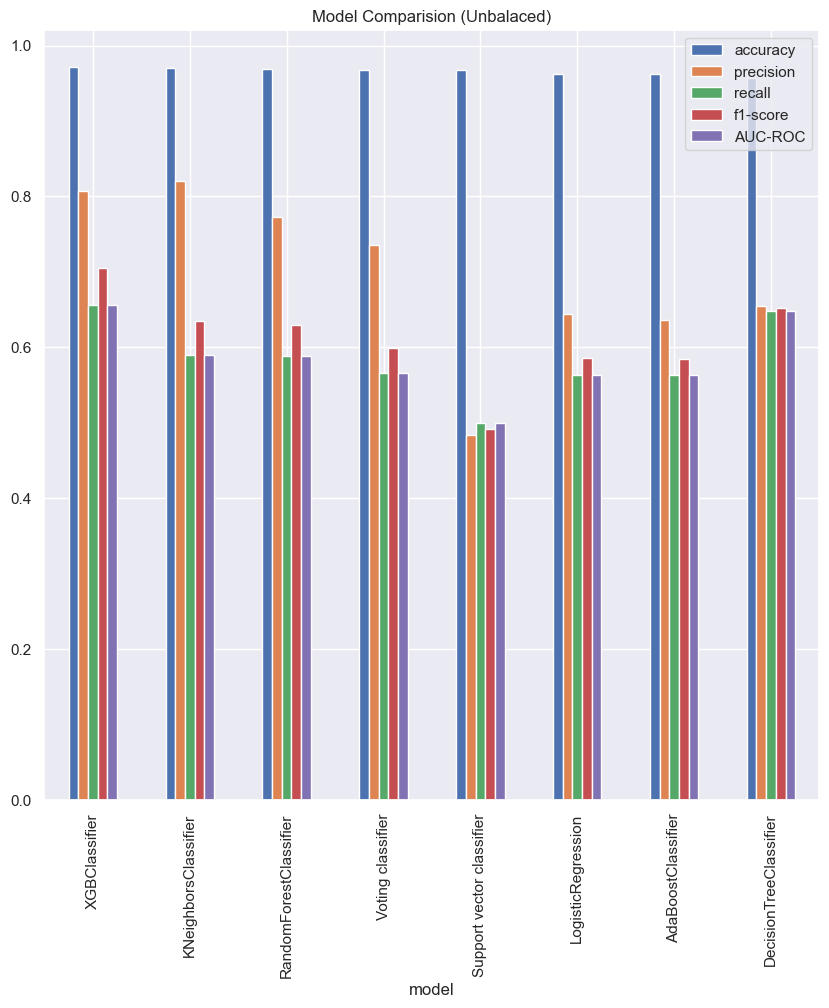

In [96]:
model_eval_df.set_index('model').sort_values(by=['accuracy','precision','recall','f1-score','AUC-ROC'],ascending=False).plot(kind='bar',figsize=[10,10])
plt.title('Model Comparision (Unbalaced)')
plt.show()

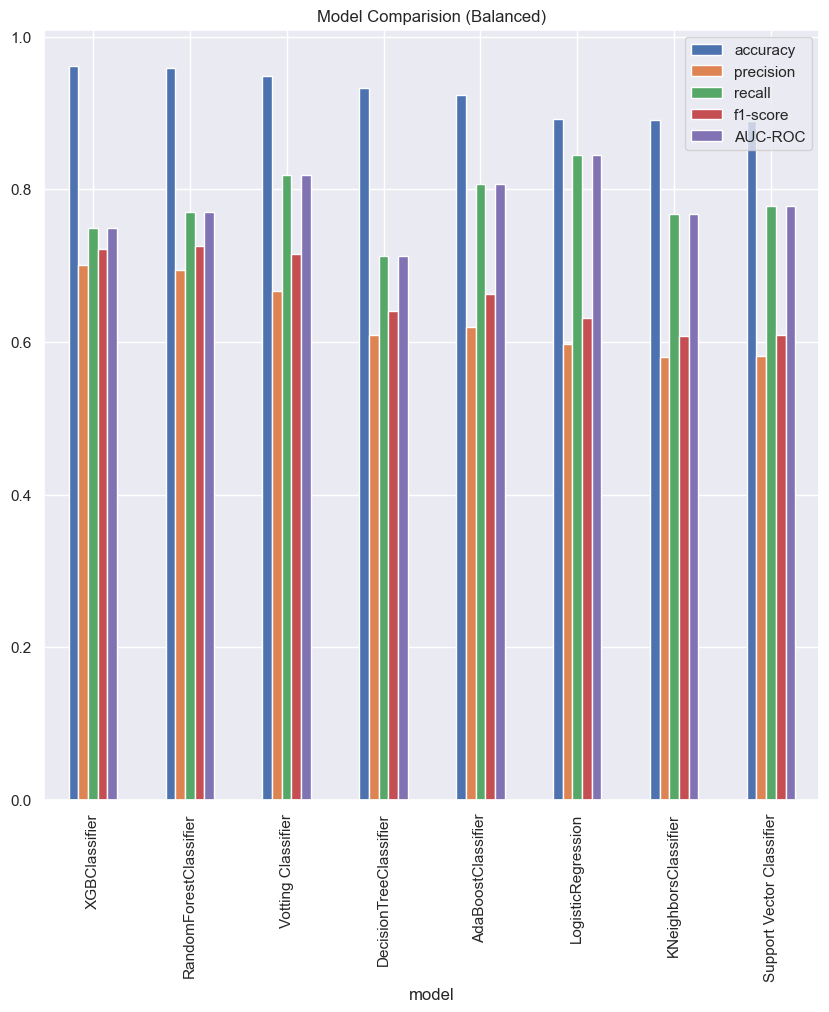

In [97]:
model_eval_df_balanced.set_index('model').sort_values(by=['accuracy','precision','recall','f1-score','AUC-ROC'],ascending=False).plot(kind='bar',figsize=[10,10])
plt.title('Model Comparision (Balanced)')
plt.show()

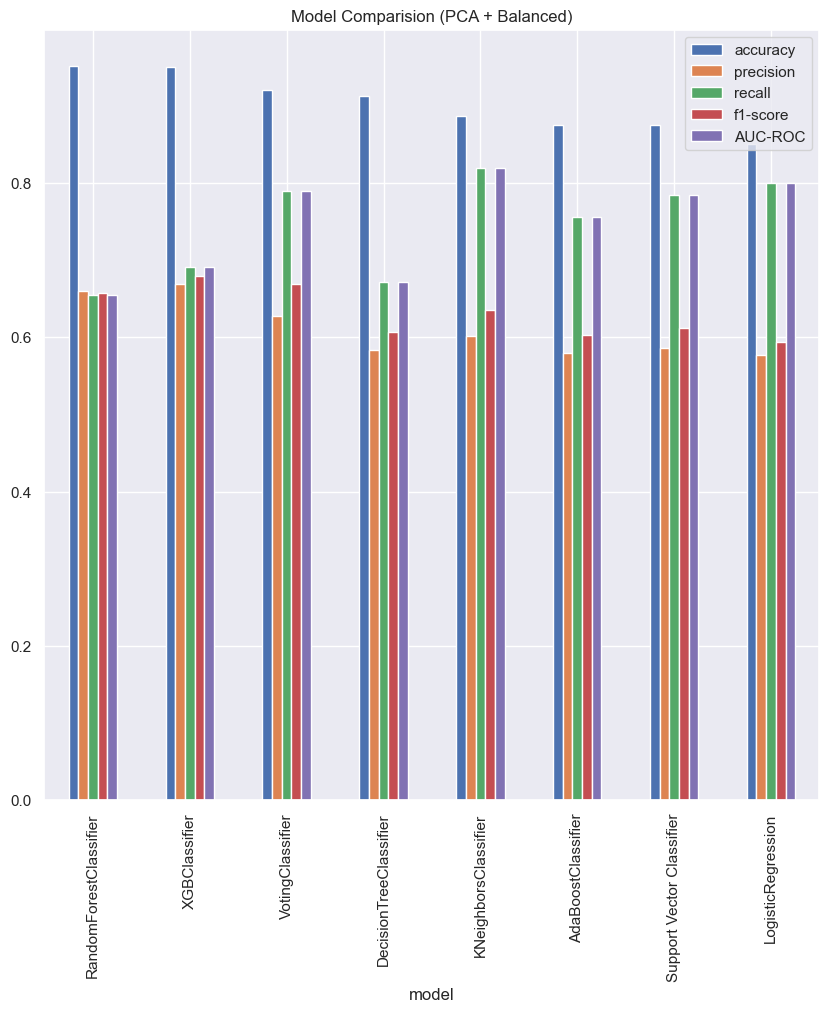

In [98]:
ax3 = model_eval_df_balanced_pca.set_index('model').sort_values(by=['accuracy','precision','recall','f1-score','AUC-ROC'],ascending=False).plot(kind='bar',figsize=[10,10])
plt.title('Model Comparision (PCA + Balanced)')
# for container in ax3.containers:
#     ax3.bar_label(container)
plt.show()

## Building The Model Only Imporatant Parameters Only (Using feature importance technique)

In [99]:
final_imp_features_all_model

Col_index                                        Features_rf  \
0         89                _Net_Income_to_Stockholder's_Equity   
1         39                              _Borrowing_dependency   
2         42             _Net_profit_before_tax/Paid-in_capital   
3         92  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4         56                                 _Cash/Total_Assets   
5          8       _Non-industry_income_and_expenditure/revenue   
6         15                           _Net_Value_Per_Share_(B)   

   Features_values_rf                                        Features_dt  \
0            0.031649                _Net_Income_to_Stockholder's_Equity   
1            0.027386                              _Borrowing_dependency   
2            0.022851             _Net_profit_before_tax/Paid-in_capital   
3            0.021975  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4            0.020840                                 _Cash/Total_Assets   
5            0.018221       _Non-industry_income_and_expenditure/revenue   
6            0.017591                           _Net_Value_Per_Share_(B)   

   Features_values_dt                                       Features_xgb  \
0            0.146927                _Net_Income_to_Stockholder's_Equity   
1            0.039938                              _Borrowing_dependency   
2            0.016992             _Net_profit_before_tax/Paid-in_capital   
3            0.030627  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4            0.027320                                 _Cash/Total_Assets   
5            0.015482       _Non-industry_income_and_expenditure/revenue   
6            0.017524                           _Net_Value_Per_Share_(B)   

   Features_values_xgb                                   Features_adboost  \
0             0.155352                _Net_Income_to_Stockholder's_Equity   
1             0.036897                              _Borrowing_dependency   
2             0.021313             _Net_profit_before_tax/Paid-in_capital   
3             0.011881  _Interest_Coverage_Ratio_(Interest_expense_to_...   
4             0.015346                                 _Cash/Total_Assets   
5             0.016946       _Non-industry_income_and_expenditure/revenue   
6             0.009316                           _Net_Value_Per_Share_(B)   

   Features_values_adboost  
0                     0.06  
1                     0.08  
2                     0.02  
3                     0.04  
4                     0.04  
5                     0.02  
6                     0.02

In [100]:
x_imp = x.loc[:,["_Net_Income_to_Stockholder's_Equity",'_Borrowing_dependency','_Net_profit_before_tax/Paid-in_capital','_Cash/Total_Assets','_Non-industry_income_and_expenditure/revenue','_Net_Value_Per_Share_(B)']]
x_imp.head()

_Net_Income_to_Stockholder's_Equity  _Borrowing_dependency  \
0                             0.827890               0.390284   
1                             0.839969               0.376760   
2                             0.836774               0.379093   
3                             0.834697               0.379743   
4                             0.839973               0.375025   

   _Net_profit_before_tax/Paid-in_capital  _Cash/Total_Assets  \
0                                0.137757            0.004094   
1                                0.168962            0.014948   
2                                0.148036            0.000991   
3                                0.147561            0.018851   
4                                0.167461            0.014161   

   _Non-industry_income_and_expenditure/revenue  _Net_Value_Per_Share_(B)  
0                                      0.302646                  0.147950  
1                                      0.303556                  0.182251  
2                                      0.302035                  0.177911  
3                                      0.303350                  0.154187  
4                                      0.303475                  0.167502

In [101]:
x_imp.shape

(6819, 6)

In [102]:
# from sklearn.preprocessing import StandardScaler
# scale_imp = StandardScaler

In [103]:
from sklearn.model_selection import train_test_split
x_imp_train,x_imp_test,y_imp_train,y_imp_test = train_test_split(x_imp,y,test_size=0.2,random_state=42)

In [104]:
from imblearn.over_sampling import SMOTE
# Before sampling 
count_yuimp = Counter(y_imp_train)
print('Before sampling',count_yuimp) # yuimp --> y value unbalnced before sampling with important columns
smt_imp = SMOTE(random_state=42)

x_train_simp,y_train_simp = smt_imp .fit_resample(x_imp_train,y_imp_train)

count_ybimp = Counter(y_train_simp)
print('After sampling',count_ybimp) # ybimp --> y value balnced after sampling with important columns

Before sampling Counter({0: 5286, 1: 169})
After sampling Counter({0: 5286, 1: 5286})


In [105]:
from xgboost import XGBClassifier
xgbimp = XGBClassifier()
xgbimp.fit(x_train_simp, y_train_simp)
test_eval_balanced_pca(xgbimp, x_imp_test, y_imp_test, x_train_simp, y_train_simp,algo='XGBClassifier Imp Parameters')

************************************************** Train_set_prediction ************************************************** 

Accuracy Score
0.9972569050321605
Confusion Matrix
[[5258   28]
 [   1 5285]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5286
           1       0.99      1.00      1.00      5286

    accuracy                           1.00     10572
   macro avg       1.00      1.00      1.00     10572
weighted avg       1.00      1.00      1.00     10572
 

AUC-ROC
0.9972569050321604
**************************************************  Test_set_prediction ************************************************** 

Accuracy Score
0.9296187683284457 

Confusion Matrix
[[1236   77]
 [  19   32]] 

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1313
           1       0.29      0.63      0.40        51

    accuracy            

In [106]:
# Cross validation
print(cross_val(xgbimp,x_train_simp, y_train_simp))

[0.96691871 0.9584121  0.96688742 0.96310312 0.96783349 0.96310312
 0.96310312 0.95742668 0.9640492  0.97161779]

Mean_score = 0.9642454748521425

Max_score = 0.9716177861873226
-------------------


# Conclusion 

- 1 First, I tried without balancing the set that will give poor results in AUC-ROC score,precision,recall,and f1-score .
- 2 From result I found that balancing the data will give better results in AUC-ROC score,precision,recall,and f1-score .
- 3 From all 8 algorithms I found that XGBoost classifier will give highest results among all 7 algorithms.
- 4 Then I found PCA  along with SMOTE this will give better results also in that random forest give highest performance metrics then second one is XGBoost classifier.
- 5 Finally, I extracted  6 features using features important technique using DT, RF, XGB.
- 6 Then build model on top of 6 features I found  93% of accuracy. Only 6 features give 93% of accuracy this means anyone features variation that will affect the dependent variable(“Bankruptcy”).
